<a href="https://colab.research.google.com/github/psamratgithub/Avacado-Price-Prediction-ML2-Pridarshi_Samrat24062023/blob/main/Indian_Penal_Code(IPC)_Section_Information17022024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
filepath = "/content/ipc_sections.csv"
import pandas as pd
df = pd.read_csv(filepath)
type(df)

pandas.core.frame.DataFrame

In [ ]:
# Load the dataset
#file_path = '/kaggle/input/indian-penal-code-ipc-sections-information/ipc_sections.csv'
#df = pd.read_csv(file_path)

# Extract relevant columns for input features and target variable
X = df[['Offense', 'Punishment']].values  # Input features
y = df['Description'].values  # Target variable

# Print the first few rows of X and y to verify the data
print("Input Features (X):")
print(X[:5])

print("\nTarget Variable (y):")
print(y[:5])

Input Features (X):
[['Wearing the dress or carrying any token used by a soldier, sailor or airman with intent that it may be believed that he is such a soldier, sailor or airman'
  '3 Months or Fine or Both']
 ['Receiving property taken by war or depredation mentioned in sections 125 And 126'
  '7 Years + Fine + forfeiture of property']
 ['Public servant voluntarily allowing prisoner of State or war in his custody to escape'
  'Imprisonment for Life or 10 Years + Fine']
 ['Public servant negligently suffering prisoner of State or war in his custody to escape'
  'Simple Imprisonment 3 Years + Fine']
 ['Aiding escape of, rescuing or harbouring, such prisoner, or offering Any resistance to the recapture of such prisoner'
  'Imprisonment for Life or 10 Years + Fine']]

Target Variable (y):
['Description of IPC Section 140\nAccording to section 140 of Indian penal code, Whoever, not being a soldier, sailor or airman in the Military, Naval or Air service of the Government of India, wears an

In [ ]:
df.tail(10)

,Description,Offense,Punishment,Section
434,Description of IPC Section 502\nAccording to s...,Sale of printed or engraved substance containi...,Simple Imprisonment for 2 Years or Fine or Both,IPC_502
435,Description of IPC Section 503\nAccording to s...,NaN,NaN,IPC_503
436,Description of IPC Section 504\nAccording to s...,Insult intended to provoke breach of the peace,2 Years or Fine or Both,IPC_504
437,Description of IPC Section 505\nAccording to s...,"False statement, rumour, etc., circulated with...",3 Years or Fine or Both,IPC_505
438,Description of IPC Section 506\nAccording to s...,Criminal intimidation,2 Years or Fine or Both,IPC_506
439,Description of IPC Section 507\nAccording to s...,Criminal intimidation by Anonymous communicati...,As in Section 506 + 2 Years,IPC_507
440,Description of IPC Section 508\nAccording to s...,Act caused by inducing a person to believe tha...,1 Year or Fine or Both,IPC_508
441,Description of IPC Section 509\nAccording to s...,Uttering any word or making any gesture intend...,Simple imprisonment for 3 years + Fine,IPC_509
442,Description of IPC Section 510\nAccording to s...,"Appearing in a public Place, etc., in a State ...",Simple Imprisonment for 24 hours or Fine or Both,IPC_510
443,Description of IPC Section 511\nAccording to s...,Attempting to commit offences punishable with ...,Imprisonment for Life or Imprisonment not exce...,IPC_511


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  444 non-null    object
 1   Offense      387 non-null    object
 2   Punishment   386 non-null    object
 3   Section      444 non-null    object
dtypes: object(4)
memory usage: 14.0+ KB


In [ ]:
df['Offense']

0      Wearing the dress or carrying any token used b...
1      Receiving property taken by war or depredation...
2      Public servant voluntarily allowing prisoner o...
3      Public servant negligently suffering prisoner ...
4      Aiding escape of, rescuing or harbouring, such...
                             ...                        
439    Criminal intimidation by Anonymous communicati...
440    Act caused by inducing a person to believe tha...
441    Uttering any word or making any gesture intend...
442    Appearing in a public Place, etc., in a State ...
443    Attempting to commit offences punishable with ...
Name: Offense, Length: 444, dtype: object

In [ ]:
df['Punishment']

0                               3 Months or Fine or Both
1                7 Years + Fine + forfeiture of property
2               Imprisonment for Life or 10 Years + Fine
3                     Simple Imprisonment 3 Years + Fine
4               Imprisonment for Life or 10 Years + Fine
                             ...                        
439                          As in Section 506 + 2 Years
440                               1 Year or Fine or Both
441               Simple imprisonment for 3 years + Fine
442     Simple Imprisonment for 24 hours or Fine or Both
443    Imprisonment for Life or Imprisonment not exce...
Name: Punishment, Length: 444, dtype: object

In [ ]:
for t in df['Description']:
  print(t)

Description of IPC Section 140
According to section 140 of Indian penal code, Whoever, not being a soldier, sailor or airman in the Military, Naval or Air service of the Government of India, wears any garb or carries any token resembling any garb or token used by such a soldier, sailor or airman with the intention that it may be believed that he is such a soldier, sailor or airman, shall be punished with imprisonment of either description for a term which may extend to three months, or with fine which may extend to five hundred rupees, or with both.


IPC 140 in Simple Words
If someone who is not a military member wears a uniform or carries something resembling a military uniform to deceive others into believing they are a soldier, sailor, or airman, they can be punished with up to three months in jail, a fine of up to five hundred rupees, or both.
Description of IPC Section 127
According to section 127 of Indian penal code, Whoever receives any property knowing the same to have been t

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# Check the data types of 'Offense' and 'Punishment'
print("Data Types:")
print("Offense:", X[:, 0].dtype)
print("Punishment:", X[:, 1].dtype)

# Convert 'Offense' and 'Punishment' to strings if they are not already
X[:, 0] = X[:, 0].astype(str)
X[:, 1] = X[:, 1].astype(str)

# Combine 'Offense' and 'Punishment' into a single text feature
X_text = X[:, 0] + ' ' + X[:, 1]

# Use CountVectorizer to convert text data to numerical format
vectorizer = CountVectorizer()
X_numerical = vectorizer.fit_transform(X_text)

# Use LabelEncoder to convert the target variable to numerical format
label_encoder = LabelEncoder()
y_numerical = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numerical, y_numerical, test_size=0.2, random_state=42)

# Print the shape of the numerical features and target variable
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Data Types:
Offense: object
Punishment: object
Shape of X_train: (355, 992)
Shape of X_test: (89, 992)
Shape of y_train: (355,)
Shape of y_test: (89,)


In [ ]:
df[['Offense','Punishment']]

,Offense,Punishment
0,Wearing the dress or carrying any token used b...,3 Months or Fine or Both
1,Receiving property taken by war or depredation...,7 Years + Fine + forfeiture of property
2,Public servant voluntarily allowing prisoner o...,Imprisonment for Life or 10 Years + Fine
3,Public servant negligently suffering prisoner ...,Simple Imprisonment 3 Years + Fine
4,"Aiding escape of, rescuing or harbouring, such...",Imprisonment for Life or 10 Years + Fine
...,...,...
439,Criminal intimidation by Anonymous communicati...,As in Section 506 + 2 Years
440,Act caused by inducing a person to believe tha...,1 Year or Fine or Both
441,Uttering any word or making any gesture intend...,Simple imprisonment for 3 years + Fine
442,"Appearing in a public Place, etc., in a State ...",Simple Imprisonment for 24 hours or Fine or Both


In [ ]:
df[df.isna().any(axis=1)]

,Description,Offense,Punishment,Section
49,Description of IPC Section 171A\nAccording to ...,"""Candidate"", ""Electoral right"" defined",NaN,IPC_171A
50,Description of IPC Section 171B\nAccording to ...,NaN,NaN,IPC_171B
51,Description of IPC Section 171C\nAccording to ...,NaN,NaN,IPC_171C
52,Description of IPC Section 171D\nAccording to ...,NaN,NaN,IPC_171D
88,Description of IPC Section 226\nAccording to s...,NaN,NaN,IPC_226
89,Description of IPC Section 191\nAccording to s...,NaN,NaN,IPC_191
90,Description of IPC Section 192\nAccording to s...,NaN,NaN,IPC_192
117,Description of IPC Section 216B\nAccording to ...,NaN,NaN,IPC_216B
130,Description of IPC Section 230\nAccording to s...,NaN,NaN,IPC_230
169,Description of IPC Section 268\nAccording to s...,NaN,NaN,IPC_268


In [ ]:
df1 = df.dropna()

In [ ]:
df1['Imprisonment'] = df1["Punishment"].apply(lambda row: 1 if "Imprisonment" in row else 0)
df1.head()

<ipython-input-13-1fae6cc0ed1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Imprisonment'] = df1["Punishment"].apply(lambda row: 1 if "Imprisonment" in row else 0)


,Description,Offense,Punishment,Section,Imprisonment
0,Description of IPC Section 140\nAccording to s...,Wearing the dress or carrying any token used b...,3 Months or Fine or Both,IPC_140,0
1,Description of IPC Section 127\nAccording to s...,Receiving property taken by war or depredation...,7 Years + Fine + forfeiture of property,IPC_127,0
2,Description of IPC Section 128\nAccording to s...,Public servant voluntarily allowing prisoner o...,Imprisonment for Life or 10 Years + Fine,IPC_128,1
3,Description of IPC Section 129\nAccording to s...,Public servant negligently suffering prisoner ...,Simple Imprisonment 3 Years + Fine,IPC_129,1
4,Description of IPC Section 130\nAccording to s...,"Aiding escape of, rescuing or harbouring, such...",Imprisonment for Life or 10 Years + Fine,IPC_130,1


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(np.unique(y_numerical)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                63552     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 442)               14586     
                                                                 
Total params: 80218 (313.35 KB)
Trainable params: 80218 (313.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import LabelEncoder  # Add this import
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Extract relevant columns for input features and target variable
X = df[['Offense', 'Punishment']].astype(str).values  # Convert to string
y = df['Description'].values  # Target variable

# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Number of unique classes in your dataset
output_neurons = len(np.unique(y))
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine 'Offense' and 'Punishment' into a single text feature
X_text_train = X_train[:, 0] + ' ' + X_train[:, 1]
X_text_test = X_test[:, 0] + ' ' + X_test[:, 1]

# Use CountVectorizer to convert text data to numerical format
vectorizer = CountVectorizer()
X_train_numerical = vectorizer.fit_transform(X_text_train)
X_test_numerical = vectorizer.transform(X_text_test)

# Compute sample weights for balancing classes
sample_weights = compute_sample_weight('balanced', y_train)

# Define the neural network model with adjustments
model = Sequential()
model.add(Dense(128, input_dim=X_train_numerical.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Set the number of output neurons to match the unique classes
model.add(Dense(output_neurons, activation='softmax'))

# Compile the model with sample weights
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with sample weights
history_weighted = model.fit(X_train_numerical.toarray(), y_train, epochs=1000, batch_size=100, validation_split=0.2, sample_weight=sample_weights)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_numerical.toarray(), y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/1000
1/3 [=========>....................] - ETA: 1s - loss: 6.1094 - accuracy: 0.0000e+00

3/3 [==============================] - 1s 82ms/step - loss: 6.1036 - accuracy: 0.0035 - val_loss: 6.1025 - val_accuracy: 0.0000e+00
Epoch 2/1000
1/3 [=========>....................] - ETA: 0s - loss: 6.0880 - accuracy: 0.0000e+00

3/3 [==============================] - 0s 16ms/step - loss: 6.0844 - accuracy: 0.0035 - val_loss: 6.1078 - val_accuracy: 0.0000e+00
Epoch 3/1000
1/3 [=========>....................] - ETA: 0s - loss: 6.0767 - accuracy: 0.0000e+00

3/3 [==============================] - 0s 17ms/step - loss: 6.0675 - accuracy: 0.0070 - val_loss: 6.1139 - val_accuracy: 0.0000e+00
Epoch 4/1000
1/3 [=========>....................] - ETA: 0s - loss: 6.0310 - accuracy: 0.0000e+00

3/3 [==============================] - 0s 16ms/step - loss: 6.0478 - accuracy: 0.0000e+00 - val_loss: 6.1212 - val_accuracy: 0.0000e+00
Epoch 5/1000
1/3 [=========>....................] - ETA: 0s - loss: 6.0542 - accuracy: 0.0100

3/3 [==============================] - 0s 20ms/step - loss: 6.0409 - accuracy: 0.0070 - val_loss: 6.1302 - val_accuracy: 0.0000e+00
Epoch 6/1000
1/3 [=========>....................] - ETA: 0s - loss: 6.0211 - accuracy: 0.0100

3/3 [==============================] - 0s 16ms/step - loss: 6.0381 - accuracy: 0.0035 - val_loss: 6.1409 - val_accuracy: 0.0000e+00
Epoch 7/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.9979 - accuracy: 0.0200

3/3 [==============================] - 0s 15ms/step - loss: 6.0071 - accuracy: 0.0106 - val_loss: 6.1543 - val_accuracy: 0.0000e+00
Epoch 8/1000
1/3 [=========>....................] - ETA: 0s - loss: 6.0151 - accuracy: 0.0100

3/3 [==============================] - 0s 15ms/step - loss: 5.9909 - accuracy: 0.0211 - val_loss: 6.1707 - val_accuracy: 0.0000e+00
Epoch 9/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.9413 - accuracy: 0.0200

3/3 [==============================] - 0s 19ms/step - loss: 5.9620 - accuracy: 0.0176 - val_loss: 6.1913 - val_accuracy: 0.0000e+00
Epoch 10/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.9550 - accuracy: 0.0200

3/3 [==============================] - 0s 17ms/step - loss: 5.9306 - accuracy: 0.0423 - val_loss: 6.2165 - val_accuracy: 0.0000e+00
Epoch 11/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.9247 - accuracy: 0.0400

3/3 [==============================] - 0s 16ms/step - loss: 5.9058 - accuracy: 0.0317 - val_loss: 6.2488 - val_accuracy: 0.0000e+00
Epoch 12/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.8676 - accuracy: 0.0100

3/3 [==============================] - 0s 17ms/step - loss: 5.8704 - accuracy: 0.0176 - val_loss: 6.2900 - val_accuracy: 0.0000e+00
Epoch 13/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.8866 - accuracy: 0.0100

3/3 [==============================] - 0s 17ms/step - loss: 5.8503 - accuracy: 0.0141 - val_loss: 6.3426 - val_accuracy: 0.0000e+00
Epoch 14/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.8012 - accuracy: 0.0300

3/3 [==============================] - 0s 17ms/step - loss: 5.7887 - accuracy: 0.0211 - val_loss: 6.4103 - val_accuracy: 0.0000e+00
Epoch 15/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.7701 - accuracy: 0.0300

3/3 [==============================] - 0s 17ms/step - loss: 5.7527 - accuracy: 0.0282 - val_loss: 6.4967 - val_accuracy: 0.0000e+00
Epoch 16/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.6796 - accuracy: 0.0400

3/3 [==============================] - 0s 17ms/step - loss: 5.6666 - accuracy: 0.0211 - val_loss: 6.6056 - val_accuracy: 0.0000e+00
Epoch 17/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.5909 - accuracy: 0.0400

3/3 [==============================] - 0s 17ms/step - loss: 5.6360 - accuracy: 0.0211 - val_loss: 6.7391 - val_accuracy: 0.0000e+00
Epoch 18/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.6396 - accuracy: 0.0100

3/3 [==============================] - 0s 17ms/step - loss: 5.6133 - accuracy: 0.0070 - val_loss: 6.8930 - val_accuracy: 0.0000e+00
Epoch 19/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.5821 - accuracy: 0.0100

3/3 [==============================] - 0s 16ms/step - loss: 5.5592 - accuracy: 0.0141 - val_loss: 7.0616 - val_accuracy: 0.0000e+00
Epoch 20/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.5288 - accuracy: 0.0100

3/3 [==============================] - 0s 16ms/step - loss: 5.4777 - accuracy: 0.0176 - val_loss: 7.2383 - val_accuracy: 0.0000e+00
Epoch 21/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.4634 - accuracy: 0.0100

3/3 [==============================] - 0s 16ms/step - loss: 5.3965 - accuracy: 0.0246 - val_loss: 7.4212 - val_accuracy: 0.0000e+00
Epoch 22/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.3077 - accuracy: 0.0400

3/3 [==============================] - 0s 17ms/step - loss: 5.3501 - accuracy: 0.0352 - val_loss: 7.6029 - val_accuracy: 0.0000e+00
Epoch 23/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.3531 - accuracy: 0.0200

3/3 [==============================] - 0s 18ms/step - loss: 5.3156 - accuracy: 0.0246 - val_loss: 7.7800 - val_accuracy: 0.0000e+00
Epoch 24/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.3126 - accuracy: 0.0300

3/3 [==============================] - 0s 18ms/step - loss: 5.2362 - accuracy: 0.0423 - val_loss: 7.9432 - val_accuracy: 0.0000e+00
Epoch 25/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.2285 - accuracy: 0.0600

3/3 [==============================] - 0s 17ms/step - loss: 5.2114 - accuracy: 0.0387 - val_loss: 8.0969 - val_accuracy: 0.0000e+00
Epoch 26/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.2200 - accuracy: 0.0700

3/3 [==============================] - 0s 18ms/step - loss: 5.2122 - accuracy: 0.0493 - val_loss: 8.2278 - val_accuracy: 0.0000e+00
Epoch 27/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.2437 - accuracy: 0.0300

3/3 [==============================] - 0s 20ms/step - loss: 5.1850 - accuracy: 0.0387 - val_loss: 8.3369 - val_accuracy: 0.0000e+00
Epoch 28/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.1061 - accuracy: 0.0500

3/3 [==============================] - 0s 17ms/step - loss: 5.0931 - accuracy: 0.0493 - val_loss: 8.4411 - val_accuracy: 0.0000e+00
Epoch 29/1000
1/3 [=========>....................] - ETA: 0s - loss: 5.1382 - accuracy: 0.0400

3/3 [==============================] - 0s 16ms/step - loss: 5.0740 - accuracy: 0.0493 - val_loss: 8.5301 - val_accuracy: 0.0000e+00
Epoch 30/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.9465 - accuracy: 0.0800

3/3 [==============================] - 0s 17ms/step - loss: 4.9909 - accuracy: 0.0704 - val_loss: 8.6162 - val_accuracy: 0.0000e+00
Epoch 31/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.9698 - accuracy: 0.1100

3/3 [==============================] - 0s 17ms/step - loss: 4.9865 - accuracy: 0.0880 - val_loss: 8.7104 - val_accuracy: 0.0000e+00
Epoch 32/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.9995 - accuracy: 0.0900

3/3 [==============================] - 0s 18ms/step - loss: 4.9895 - accuracy: 0.0669 - val_loss: 8.7965 - val_accuracy: 0.0000e+00
Epoch 33/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.8131 - accuracy: 0.0800

3/3 [==============================] - 0s 17ms/step - loss: 4.8907 - accuracy: 0.0528 - val_loss: 8.8841 - val_accuracy: 0.0000e+00
Epoch 34/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.8307 - accuracy: 0.1000

3/3 [==============================] - 0s 18ms/step - loss: 4.8076 - accuracy: 0.1127 - val_loss: 8.9807 - val_accuracy: 0.0000e+00
Epoch 35/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.6218 - accuracy: 0.1200

3/3 [==============================] - 0s 18ms/step - loss: 4.7121 - accuracy: 0.1162 - val_loss: 9.1090 - val_accuracy: 0.0000e+00
Epoch 36/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.6651 - accuracy: 0.1100

3/3 [==============================] - 0s 18ms/step - loss: 4.7015 - accuracy: 0.0986 - val_loss: 9.2443 - val_accuracy: 0.0000e+00
Epoch 37/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.5936 - accuracy: 0.0800

3/3 [==============================] - 0s 17ms/step - loss: 4.6735 - accuracy: 0.0880 - val_loss: 9.3662 - val_accuracy: 0.0000e+00
Epoch 38/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.6011 - accuracy: 0.1200

3/3 [==============================] - 0s 17ms/step - loss: 4.5848 - accuracy: 0.1373 - val_loss: 9.4980 - val_accuracy: 0.0000e+00
Epoch 39/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.6560 - accuracy: 0.1500

3/3 [==============================] - 0s 17ms/step - loss: 4.6157 - accuracy: 0.1127 - val_loss: 9.6214 - val_accuracy: 0.0000e+00
Epoch 40/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.5842 - accuracy: 0.1200

3/3 [==============================] - 0s 16ms/step - loss: 4.6053 - accuracy: 0.1373 - val_loss: 9.7381 - val_accuracy: 0.0000e+00
Epoch 41/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.5758 - accuracy: 0.1300

3/3 [==============================] - 0s 18ms/step - loss: 4.5241 - accuracy: 0.1338 - val_loss: 9.8346 - val_accuracy: 0.0000e+00
Epoch 42/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.3052 - accuracy: 0.2000

3/3 [==============================] - 0s 17ms/step - loss: 4.3918 - accuracy: 0.1373 - val_loss: 9.9544 - val_accuracy: 0.0000e+00
Epoch 43/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.2408 - accuracy: 0.2100

3/3 [==============================] - 0s 18ms/step - loss: 4.3041 - accuracy: 0.1866 - val_loss: 10.0928 - val_accuracy: 0.0000e+00
Epoch 44/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.4871 - accuracy: 0.1100

3/3 [==============================] - 0s 17ms/step - loss: 4.4064 - accuracy: 0.1232 - val_loss: 10.2168 - val_accuracy: 0.0000e+00
Epoch 45/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.2259 - accuracy: 0.1900

3/3 [==============================] - 0s 18ms/step - loss: 4.2490 - accuracy: 0.1796 - val_loss: 10.3450 - val_accuracy: 0.0000e+00
Epoch 46/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.1466 - accuracy: 0.2000

3/3 [==============================] - 0s 17ms/step - loss: 4.1689 - accuracy: 0.1831 - val_loss: 10.4760 - val_accuracy: 0.0000e+00
Epoch 47/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.9751 - accuracy: 0.2400

3/3 [==============================] - 0s 17ms/step - loss: 4.1592 - accuracy: 0.1761 - val_loss: 10.5968 - val_accuracy: 0.0000e+00
Epoch 48/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.9711 - accuracy: 0.2600

3/3 [==============================] - 0s 17ms/step - loss: 4.1556 - accuracy: 0.1937 - val_loss: 10.7101 - val_accuracy: 0.0000e+00
Epoch 49/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.0196 - accuracy: 0.2200

3/3 [==============================] - 0s 17ms/step - loss: 4.0411 - accuracy: 0.2183 - val_loss: 10.8292 - val_accuracy: 0.0000e+00
Epoch 50/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.8537 - accuracy: 0.2400

3/3 [==============================] - 0s 22ms/step - loss: 3.9961 - accuracy: 0.2394 - val_loss: 10.9632 - val_accuracy: 0.0000e+00
Epoch 51/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.0398 - accuracy: 0.2100

3/3 [==============================] - 0s 17ms/step - loss: 4.0239 - accuracy: 0.2183 - val_loss: 11.0889 - val_accuracy: 0.0000e+00
Epoch 52/1000
1/3 [=========>....................] - ETA: 0s - loss: 4.0608 - accuracy: 0.2500

3/3 [==============================] - 0s 16ms/step - loss: 3.9116 - accuracy: 0.2289 - val_loss: 11.2287 - val_accuracy: 0.0000e+00
Epoch 53/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.9518 - accuracy: 0.1600

3/3 [==============================] - 0s 16ms/step - loss: 4.0128 - accuracy: 0.1690 - val_loss: 11.3416 - val_accuracy: 0.0000e+00
Epoch 54/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.7524 - accuracy: 0.1800

3/3 [==============================] - 0s 16ms/step - loss: 3.8264 - accuracy: 0.2007 - val_loss: 11.4577 - val_accuracy: 0.0000e+00
Epoch 55/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.8410 - accuracy: 0.2400

3/3 [==============================] - 0s 17ms/step - loss: 3.8301 - accuracy: 0.2113 - val_loss: 11.5526 - val_accuracy: 0.0000e+00
Epoch 56/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.7373 - accuracy: 0.2500

3/3 [==============================] - 0s 16ms/step - loss: 3.7249 - accuracy: 0.2465 - val_loss: 11.6482 - val_accuracy: 0.0000e+00
Epoch 57/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.5958 - accuracy: 0.2200

3/3 [==============================] - 0s 17ms/step - loss: 3.6786 - accuracy: 0.2465 - val_loss: 11.7499 - val_accuracy: 0.0000e+00
Epoch 58/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.6473 - accuracy: 0.3200

3/3 [==============================] - 0s 17ms/step - loss: 3.6328 - accuracy: 0.2817 - val_loss: 11.8450 - val_accuracy: 0.0000e+00
Epoch 59/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.4789 - accuracy: 0.2500

3/3 [==============================] - 0s 18ms/step - loss: 3.6724 - accuracy: 0.2254 - val_loss: 11.9385 - val_accuracy: 0.0000e+00
Epoch 60/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.6231 - accuracy: 0.2800

3/3 [==============================] - 0s 32ms/step - loss: 3.5429 - accuracy: 0.2535 - val_loss: 12.0400 - val_accuracy: 0.0000e+00
Epoch 61/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.4713 - accuracy: 0.2600

3/3 [==============================] - 0s 25ms/step - loss: 3.5770 - accuracy: 0.2606 - val_loss: 12.1233 - val_accuracy: 0.0000e+00
Epoch 62/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.5444 - accuracy: 0.2000

3/3 [==============================] - 0s 37ms/step - loss: 3.6346 - accuracy: 0.1901 - val_loss: 12.1780 - val_accuracy: 0.0000e+00
Epoch 63/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.4361 - accuracy: 0.2700

3/3 [==============================] - 0s 32ms/step - loss: 3.3881 - accuracy: 0.2958 - val_loss: 12.2470 - val_accuracy: 0.0000e+00
Epoch 64/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.1697 - accuracy: 0.3200

3/3 [==============================] - 0s 25ms/step - loss: 3.2903 - accuracy: 0.3134 - val_loss: 12.3394 - val_accuracy: 0.0000e+00
Epoch 65/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.3913 - accuracy: 0.2400

3/3 [==============================] - 0s 21ms/step - loss: 3.3405 - accuracy: 0.2782 - val_loss: 12.4324 - val_accuracy: 0.0000e+00
Epoch 66/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.3942 - accuracy: 0.2700

3/3 [==============================] - 0s 23ms/step - loss: 3.2481 - accuracy: 0.2993 - val_loss: 12.5326 - val_accuracy: 0.0000e+00
Epoch 67/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.2765 - accuracy: 0.3100

3/3 [==============================] - 0s 23ms/step - loss: 3.3166 - accuracy: 0.2817 - val_loss: 12.6403 - val_accuracy: 0.0000e+00
Epoch 68/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.1954 - accuracy: 0.3000

3/3 [==============================] - 0s 32ms/step - loss: 3.1333 - accuracy: 0.3627 - val_loss: 12.7513 - val_accuracy: 0.0000e+00
Epoch 69/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.0779 - accuracy: 0.3900

3/3 [==============================] - 0s 22ms/step - loss: 3.2965 - accuracy: 0.3063 - val_loss: 12.8604 - val_accuracy: 0.0000e+00
Epoch 70/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.3598 - accuracy: 0.1900

3/3 [==============================] - 0s 31ms/step - loss: 3.2423 - accuracy: 0.2641 - val_loss: 12.9509 - val_accuracy: 0.0000e+00
Epoch 71/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.2979 - accuracy: 0.3000

3/3 [==============================] - 0s 22ms/step - loss: 3.1699 - accuracy: 0.3028 - val_loss: 13.0247 - val_accuracy: 0.0000e+00
Epoch 72/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.0389 - accuracy: 0.3800

3/3 [==============================] - 0s 24ms/step - loss: 3.0365 - accuracy: 0.3627 - val_loss: 13.1148 - val_accuracy: 0.0000e+00
Epoch 73/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.2124 - accuracy: 0.3200

3/3 [==============================] - 0s 33ms/step - loss: 3.1679 - accuracy: 0.3204 - val_loss: 13.1833 - val_accuracy: 0.0000e+00
Epoch 74/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.1190 - accuracy: 0.3200

3/3 [==============================] - 0s 25ms/step - loss: 3.0302 - accuracy: 0.3380 - val_loss: 13.2531 - val_accuracy: 0.0000e+00
Epoch 75/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.1700 - accuracy: 0.3100

3/3 [==============================] - 0s 26ms/step - loss: 3.0300 - accuracy: 0.3415 - val_loss: 13.3171 - val_accuracy: 0.0000e+00
Epoch 76/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.0637 - accuracy: 0.3100

3/3 [==============================] - 0s 25ms/step - loss: 3.0482 - accuracy: 0.3451 - val_loss: 13.3872 - val_accuracy: 0.0000e+00
Epoch 77/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.7293 - accuracy: 0.3700

3/3 [==============================] - 0s 28ms/step - loss: 2.9116 - accuracy: 0.3451 - val_loss: 13.4529 - val_accuracy: 0.0000e+00
Epoch 78/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.1455 - accuracy: 0.2700

3/3 [==============================] - 0s 25ms/step - loss: 2.9183 - accuracy: 0.3345 - val_loss: 13.5094 - val_accuracy: 0.0000e+00
Epoch 79/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.8576 - accuracy: 0.4300

3/3 [==============================] - 0s 17ms/step - loss: 2.8672 - accuracy: 0.3979 - val_loss: 13.5623 - val_accuracy: 0.0000e+00
Epoch 80/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.9230 - accuracy: 0.3100

3/3 [==============================] - 0s 17ms/step - loss: 2.9101 - accuracy: 0.3451 - val_loss: 13.6126 - val_accuracy: 0.0000e+00
Epoch 81/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.7974 - accuracy: 0.3900

3/3 [==============================] - 0s 18ms/step - loss: 2.8168 - accuracy: 0.3803 - val_loss: 13.6716 - val_accuracy: 0.0000e+00
Epoch 82/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.8846 - accuracy: 0.3300

3/3 [==============================] - 0s 21ms/step - loss: 2.8476 - accuracy: 0.3662 - val_loss: 13.7250 - val_accuracy: 0.0000e+00
Epoch 83/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.6330 - accuracy: 0.4100

3/3 [==============================] - 0s 18ms/step - loss: 2.7151 - accuracy: 0.4225 - val_loss: 13.7917 - val_accuracy: 0.0000e+00
Epoch 84/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.6482 - accuracy: 0.4200

3/3 [==============================] - 0s 16ms/step - loss: 2.6856 - accuracy: 0.4155 - val_loss: 13.8768 - val_accuracy: 0.0000e+00
Epoch 85/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.6361 - accuracy: 0.4000

3/3 [==============================] - 0s 17ms/step - loss: 2.6944 - accuracy: 0.3838 - val_loss: 13.9619 - val_accuracy: 0.0000e+00
Epoch 86/1000
1/3 [=========>....................] - ETA: 0s - loss: 3.0577 - accuracy: 0.2100

3/3 [==============================] - 0s 21ms/step - loss: 2.8313 - accuracy: 0.3345 - val_loss: 14.0067 - val_accuracy: 0.0000e+00
Epoch 87/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.6851 - accuracy: 0.4000

3/3 [==============================] - 0s 17ms/step - loss: 2.5769 - accuracy: 0.4049 - val_loss: 14.0676 - val_accuracy: 0.0000e+00
Epoch 88/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.6148 - accuracy: 0.3300

3/3 [==============================] - 0s 18ms/step - loss: 2.7376 - accuracy: 0.3451 - val_loss: 14.1396 - val_accuracy: 0.0000e+00
Epoch 89/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.6553 - accuracy: 0.3600

3/3 [==============================] - 0s 18ms/step - loss: 2.6420 - accuracy: 0.3768 - val_loss: 14.2157 - val_accuracy: 0.0000e+00
Epoch 90/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.5733 - accuracy: 0.4500

3/3 [==============================] - 0s 17ms/step - loss: 2.6868 - accuracy: 0.3697 - val_loss: 14.2831 - val_accuracy: 0.0000e+00
Epoch 91/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.5627 - accuracy: 0.3900

3/3 [==============================] - 0s 17ms/step - loss: 2.5673 - accuracy: 0.4049 - val_loss: 14.3448 - val_accuracy: 0.0000e+00
Epoch 92/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.6579 - accuracy: 0.3800

3/3 [==============================] - 0s 18ms/step - loss: 2.4987 - accuracy: 0.4261 - val_loss: 14.4173 - val_accuracy: 0.0000e+00
Epoch 93/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.5602 - accuracy: 0.4200

3/3 [==============================] - 0s 18ms/step - loss: 2.6143 - accuracy: 0.4085 - val_loss: 14.4737 - val_accuracy: 0.0000e+00
Epoch 94/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.5084 - accuracy: 0.4200

3/3 [==============================] - 0s 17ms/step - loss: 2.5083 - accuracy: 0.4120 - val_loss: 14.5337 - val_accuracy: 0.0000e+00
Epoch 95/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.4957 - accuracy: 0.4600

3/3 [==============================] - 0s 16ms/step - loss: 2.4974 - accuracy: 0.4507 - val_loss: 14.5792 - val_accuracy: 0.0000e+00
Epoch 96/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.4211 - accuracy: 0.4700

3/3 [==============================] - 0s 17ms/step - loss: 2.4941 - accuracy: 0.4261 - val_loss: 14.6240 - val_accuracy: 0.0000e+00
Epoch 97/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.5613 - accuracy: 0.3700

3/3 [==============================] - 0s 17ms/step - loss: 2.4548 - accuracy: 0.3979 - val_loss: 14.6707 - val_accuracy: 0.0000e+00
Epoch 98/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.4299 - accuracy: 0.4200

3/3 [==============================] - 0s 17ms/step - loss: 2.4888 - accuracy: 0.4155 - val_loss: 14.7051 - val_accuracy: 0.0000e+00
Epoch 99/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.5476 - accuracy: 0.3700

3/3 [==============================] - 0s 16ms/step - loss: 2.5024 - accuracy: 0.3979 - val_loss: 14.7221 - val_accuracy: 0.0000e+00
Epoch 100/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3635 - accuracy: 0.5000

3/3 [==============================] - 0s 17ms/step - loss: 2.4295 - accuracy: 0.4472 - val_loss: 14.7249 - val_accuracy: 0.0000e+00
Epoch 101/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.5050 - accuracy: 0.4100

3/3 [==============================] - 0s 19ms/step - loss: 2.4484 - accuracy: 0.4437 - val_loss: 14.7350 - val_accuracy: 0.0000e+00
Epoch 102/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.5200 - accuracy: 0.3900

3/3 [==============================] - 0s 16ms/step - loss: 2.4268 - accuracy: 0.4366 - val_loss: 14.7453 - val_accuracy: 0.0000e+00
Epoch 103/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.4483 - accuracy: 0.3800

3/3 [==============================] - 0s 16ms/step - loss: 2.3424 - accuracy: 0.4120 - val_loss: 14.7616 - val_accuracy: 0.0000e+00
Epoch 104/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2424 - accuracy: 0.4700

3/3 [==============================] - 0s 16ms/step - loss: 2.3530 - accuracy: 0.4366 - val_loss: 14.7997 - val_accuracy: 0.0000e+00
Epoch 105/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.5520 - accuracy: 0.3600

3/3 [==============================] - 0s 17ms/step - loss: 2.3565 - accuracy: 0.4296 - val_loss: 14.8421 - val_accuracy: 0.0000e+00
Epoch 106/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2148 - accuracy: 0.4800

3/3 [==============================] - 0s 17ms/step - loss: 2.2541 - accuracy: 0.4824 - val_loss: 14.9101 - val_accuracy: 0.0000e+00
Epoch 107/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3131 - accuracy: 0.4400

3/3 [==============================] - 0s 18ms/step - loss: 2.3239 - accuracy: 0.4190 - val_loss: 14.9787 - val_accuracy: 0.0000e+00
Epoch 108/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1689 - accuracy: 0.4100

3/3 [==============================] - 0s 30ms/step - loss: 2.2204 - accuracy: 0.4542 - val_loss: 15.0670 - val_accuracy: 0.0000e+00
Epoch 109/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3362 - accuracy: 0.4000

3/3 [==============================] - 0s 17ms/step - loss: 2.3706 - accuracy: 0.3908 - val_loss: 15.1305 - val_accuracy: 0.0000e+00
Epoch 110/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8779 - accuracy: 0.5900

3/3 [==============================] - 0s 18ms/step - loss: 2.1677 - accuracy: 0.5176 - val_loss: 15.1803 - val_accuracy: 0.0000e+00
Epoch 111/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2546 - accuracy: 0.4100

3/3 [==============================] - 0s 21ms/step - loss: 2.2094 - accuracy: 0.4648 - val_loss: 15.2243 - val_accuracy: 0.0000e+00
Epoch 112/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3010 - accuracy: 0.5000

3/3 [==============================] - 0s 17ms/step - loss: 2.0931 - accuracy: 0.5282 - val_loss: 15.2814 - val_accuracy: 0.0000e+00
Epoch 113/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3172 - accuracy: 0.4400

3/3 [==============================] - 0s 17ms/step - loss: 2.1615 - accuracy: 0.5070 - val_loss: 15.3600 - val_accuracy: 0.0000e+00
Epoch 114/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0218 - accuracy: 0.5100

3/3 [==============================] - 0s 18ms/step - loss: 2.1220 - accuracy: 0.4754 - val_loss: 15.4416 - val_accuracy: 0.0000e+00
Epoch 115/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3795 - accuracy: 0.4300

3/3 [==============================] - 0s 17ms/step - loss: 2.2341 - accuracy: 0.4613 - val_loss: 15.4970 - val_accuracy: 0.0000e+00
Epoch 116/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9408 - accuracy: 0.5400

3/3 [==============================] - 0s 17ms/step - loss: 2.0815 - accuracy: 0.5387 - val_loss: 15.5316 - val_accuracy: 0.0000e+00
Epoch 117/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.3175 - accuracy: 0.4100

3/3 [==============================] - 0s 16ms/step - loss: 2.1531 - accuracy: 0.4613 - val_loss: 15.5503 - val_accuracy: 0.0000e+00
Epoch 118/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0551 - accuracy: 0.4800

3/3 [==============================] - 0s 17ms/step - loss: 2.0993 - accuracy: 0.5246 - val_loss: 15.5667 - val_accuracy: 0.0000e+00
Epoch 119/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1955 - accuracy: 0.4800

3/3 [==============================] - 0s 18ms/step - loss: 2.1659 - accuracy: 0.5000 - val_loss: 15.5871 - val_accuracy: 0.0000e+00
Epoch 120/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1241 - accuracy: 0.5100

3/3 [==============================] - 0s 18ms/step - loss: 2.0825 - accuracy: 0.5035 - val_loss: 15.6092 - val_accuracy: 0.0000e+00
Epoch 121/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8402 - accuracy: 0.5200

3/3 [==============================] - 0s 17ms/step - loss: 1.9845 - accuracy: 0.5000 - val_loss: 15.6487 - val_accuracy: 0.0000e+00
Epoch 122/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1246 - accuracy: 0.4500

3/3 [==============================] - 0s 18ms/step - loss: 2.0981 - accuracy: 0.4789 - val_loss: 15.6740 - val_accuracy: 0.0000e+00
Epoch 123/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2640 - accuracy: 0.4500

3/3 [==============================] - 0s 19ms/step - loss: 2.1674 - accuracy: 0.4754 - val_loss: 15.6768 - val_accuracy: 0.0000e+00
Epoch 124/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9596 - accuracy: 0.4900

3/3 [==============================] - 0s 18ms/step - loss: 2.0990 - accuracy: 0.4542 - val_loss: 15.6661 - val_accuracy: 0.0000e+00
Epoch 125/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.2865 - accuracy: 0.4400

3/3 [==============================] - 0s 16ms/step - loss: 2.1424 - accuracy: 0.4613 - val_loss: 15.6633 - val_accuracy: 0.0000e+00
Epoch 126/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1105 - accuracy: 0.4800

3/3 [==============================] - 0s 17ms/step - loss: 2.0025 - accuracy: 0.5000 - val_loss: 15.6742 - val_accuracy: 0.0000e+00
Epoch 127/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7658 - accuracy: 0.6000

3/3 [==============================] - 0s 17ms/step - loss: 1.9535 - accuracy: 0.5282 - val_loss: 15.7072 - val_accuracy: 0.0000e+00
Epoch 128/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1212 - accuracy: 0.4900

3/3 [==============================] - 0s 19ms/step - loss: 2.1061 - accuracy: 0.4683 - val_loss: 15.7140 - val_accuracy: 0.0000e+00
Epoch 129/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9953 - accuracy: 0.4900

3/3 [==============================] - 0s 20ms/step - loss: 2.0376 - accuracy: 0.5211 - val_loss: 15.7273 - val_accuracy: 0.0000e+00
Epoch 130/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.1470 - accuracy: 0.5100

3/3 [==============================] - 0s 18ms/step - loss: 2.0801 - accuracy: 0.4894 - val_loss: 15.7269 - val_accuracy: 0.0000e+00
Epoch 131/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0494 - accuracy: 0.4000

3/3 [==============================] - 0s 18ms/step - loss: 2.0843 - accuracy: 0.4507 - val_loss: 15.7069 - val_accuracy: 0.0000e+00
Epoch 132/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0455 - accuracy: 0.4800

3/3 [==============================] - 0s 18ms/step - loss: 2.0755 - accuracy: 0.4789 - val_loss: 15.6926 - val_accuracy: 0.0000e+00
Epoch 133/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9674 - accuracy: 0.4700

3/3 [==============================] - 0s 18ms/step - loss: 1.9381 - accuracy: 0.4894 - val_loss: 15.6944 - val_accuracy: 0.0000e+00
Epoch 134/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7580 - accuracy: 0.5600

3/3 [==============================] - 0s 18ms/step - loss: 1.8600 - accuracy: 0.5387 - val_loss: 15.7316 - val_accuracy: 0.0000e+00
Epoch 135/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8852 - accuracy: 0.5400

3/3 [==============================] - 0s 17ms/step - loss: 1.9324 - accuracy: 0.5106 - val_loss: 15.7738 - val_accuracy: 0.0000e+00
Epoch 136/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9129 - accuracy: 0.4800

3/3 [==============================] - 0s 18ms/step - loss: 1.9769 - accuracy: 0.4965 - val_loss: 15.8006 - val_accuracy: 0.0000e+00
Epoch 137/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9523 - accuracy: 0.5600

3/3 [==============================] - 0s 18ms/step - loss: 1.8029 - accuracy: 0.5634 - val_loss: 15.8334 - val_accuracy: 0.0000e+00
Epoch 138/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8841 - accuracy: 0.5000

3/3 [==============================] - 0s 17ms/step - loss: 2.0532 - accuracy: 0.4894 - val_loss: 15.8675 - val_accuracy: 0.0000e+00
Epoch 139/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0115 - accuracy: 0.5400

3/3 [==============================] - 0s 18ms/step - loss: 1.9234 - accuracy: 0.5387 - val_loss: 15.8884 - val_accuracy: 0.0000e+00
Epoch 140/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6910 - accuracy: 0.5800

3/3 [==============================] - 0s 18ms/step - loss: 1.9502 - accuracy: 0.5070 - val_loss: 15.9132 - val_accuracy: 0.0000e+00
Epoch 141/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0354 - accuracy: 0.4300

3/3 [==============================] - 0s 18ms/step - loss: 1.8241 - accuracy: 0.5493 - val_loss: 15.9365 - val_accuracy: 0.0000e+00
Epoch 142/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9859 - accuracy: 0.5100

3/3 [==============================] - 0s 17ms/step - loss: 1.8967 - accuracy: 0.5070 - val_loss: 15.9783 - val_accuracy: 0.0000e+00
Epoch 143/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7760 - accuracy: 0.5300

3/3 [==============================] - 0s 17ms/step - loss: 1.9167 - accuracy: 0.4754 - val_loss: 16.0071 - val_accuracy: 0.0000e+00
Epoch 144/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8571 - accuracy: 0.5700

3/3 [==============================] - 0s 17ms/step - loss: 1.9075 - accuracy: 0.5141 - val_loss: 16.0111 - val_accuracy: 0.0000e+00
Epoch 145/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5049 - accuracy: 0.6100

3/3 [==============================] - 0s 18ms/step - loss: 1.7562 - accuracy: 0.5810 - val_loss: 16.0227 - val_accuracy: 0.0000e+00
Epoch 146/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8406 - accuracy: 0.5400

3/3 [==============================] - 0s 18ms/step - loss: 1.8940 - accuracy: 0.5352 - val_loss: 16.0371 - val_accuracy: 0.0000e+00
Epoch 147/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6490 - accuracy: 0.5800

3/3 [==============================] - 0s 17ms/step - loss: 1.7756 - accuracy: 0.5423 - val_loss: 16.0502 - val_accuracy: 0.0000e+00
Epoch 148/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8406 - accuracy: 0.5800

3/3 [==============================] - 0s 16ms/step - loss: 1.8585 - accuracy: 0.5634 - val_loss: 16.0869 - val_accuracy: 0.0000e+00
Epoch 149/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5884 - accuracy: 0.6000

3/3 [==============================] - 0s 19ms/step - loss: 1.7287 - accuracy: 0.5493 - val_loss: 16.1152 - val_accuracy: 0.0000e+00
Epoch 150/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9964 - accuracy: 0.5400

3/3 [==============================] - 0s 18ms/step - loss: 1.8887 - accuracy: 0.5317 - val_loss: 16.1494 - val_accuracy: 0.0000e+00
Epoch 151/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8248 - accuracy: 0.5500

3/3 [==============================] - 0s 21ms/step - loss: 1.7997 - accuracy: 0.5739 - val_loss: 16.1911 - val_accuracy: 0.0000e+00
Epoch 152/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8822 - accuracy: 0.5400

3/3 [==============================] - 0s 19ms/step - loss: 1.7917 - accuracy: 0.5352 - val_loss: 16.2273 - val_accuracy: 0.0000e+00
Epoch 153/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8765 - accuracy: 0.5200

3/3 [==============================] - 0s 18ms/step - loss: 1.7798 - accuracy: 0.5599 - val_loss: 16.2720 - val_accuracy: 0.0000e+00
Epoch 154/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5546 - accuracy: 0.5900

3/3 [==============================] - 0s 21ms/step - loss: 1.6336 - accuracy: 0.5986 - val_loss: 16.3123 - val_accuracy: 0.0000e+00
Epoch 155/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5670 - accuracy: 0.6100

3/3 [==============================] - 0s 18ms/step - loss: 1.6397 - accuracy: 0.5634 - val_loss: 16.3570 - val_accuracy: 0.0000e+00
Epoch 156/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8262 - accuracy: 0.5400

3/3 [==============================] - 0s 19ms/step - loss: 1.7114 - accuracy: 0.5704 - val_loss: 16.4013 - val_accuracy: 0.0000e+00
Epoch 157/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6176 - accuracy: 0.5800

3/3 [==============================] - 0s 17ms/step - loss: 1.6286 - accuracy: 0.5986 - val_loss: 16.4555 - val_accuracy: 0.0000e+00
Epoch 158/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7489 - accuracy: 0.5600

3/3 [==============================] - 0s 18ms/step - loss: 1.7087 - accuracy: 0.5810 - val_loss: 16.4955 - val_accuracy: 0.0000e+00
Epoch 159/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8907 - accuracy: 0.5400

3/3 [==============================] - 0s 17ms/step - loss: 1.7240 - accuracy: 0.5775 - val_loss: 16.5348 - val_accuracy: 0.0000e+00
Epoch 160/1000
1/3 [=========>....................] - ETA: 0s - loss: 2.0466 - accuracy: 0.4600

3/3 [==============================] - 0s 19ms/step - loss: 1.7926 - accuracy: 0.5141 - val_loss: 16.5510 - val_accuracy: 0.0000e+00
Epoch 161/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7306 - accuracy: 0.5100

3/3 [==============================] - 0s 18ms/step - loss: 1.7934 - accuracy: 0.5352 - val_loss: 16.5554 - val_accuracy: 0.0000e+00
Epoch 162/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7187 - accuracy: 0.5700

3/3 [==============================] - 0s 17ms/step - loss: 1.7019 - accuracy: 0.5563 - val_loss: 16.5427 - val_accuracy: 0.0000e+00
Epoch 163/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7094 - accuracy: 0.5600

3/3 [==============================] - 0s 18ms/step - loss: 1.6668 - accuracy: 0.5951 - val_loss: 16.5481 - val_accuracy: 0.0000e+00
Epoch 164/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9522 - accuracy: 0.4900

3/3 [==============================] - 0s 19ms/step - loss: 1.7351 - accuracy: 0.5599 - val_loss: 16.5537 - val_accuracy: 0.0000e+00
Epoch 165/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5931 - accuracy: 0.5800

3/3 [==============================] - 0s 17ms/step - loss: 1.6858 - accuracy: 0.5563 - val_loss: 16.5629 - val_accuracy: 0.0000e+00
Epoch 166/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8534 - accuracy: 0.4900

3/3 [==============================] - 0s 18ms/step - loss: 1.7892 - accuracy: 0.5211 - val_loss: 16.5631 - val_accuracy: 0.0000e+00
Epoch 167/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6359 - accuracy: 0.5900

3/3 [==============================] - 0s 18ms/step - loss: 1.7426 - accuracy: 0.5528 - val_loss: 16.5538 - val_accuracy: 0.0000e+00
Epoch 168/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.9678 - accuracy: 0.5100

3/3 [==============================] - 0s 18ms/step - loss: 1.6068 - accuracy: 0.5845 - val_loss: 16.5454 - val_accuracy: 0.0000e+00
Epoch 169/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7159 - accuracy: 0.5500

3/3 [==============================] - 0s 18ms/step - loss: 1.6300 - accuracy: 0.5669 - val_loss: 16.5514 - val_accuracy: 0.0000e+00
Epoch 170/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5541 - accuracy: 0.6100

3/3 [==============================] - 0s 18ms/step - loss: 1.5623 - accuracy: 0.6127 - val_loss: 16.5773 - val_accuracy: 0.0000e+00
Epoch 171/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7936 - accuracy: 0.5600

3/3 [==============================] - 0s 18ms/step - loss: 1.7825 - accuracy: 0.5599 - val_loss: 16.5872 - val_accuracy: 0.0000e+00
Epoch 172/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4180 - accuracy: 0.6100

3/3 [==============================] - 0s 21ms/step - loss: 1.5622 - accuracy: 0.5775 - val_loss: 16.6219 - val_accuracy: 0.0000e+00
Epoch 173/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7986 - accuracy: 0.5000

3/3 [==============================] - 0s 17ms/step - loss: 1.7505 - accuracy: 0.5387 - val_loss: 16.6307 - val_accuracy: 0.0000e+00
Epoch 174/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.8694 - accuracy: 0.4400

3/3 [==============================] - 0s 19ms/step - loss: 1.6475 - accuracy: 0.5387 - val_loss: 16.6294 - val_accuracy: 0.0000e+00
Epoch 175/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6587 - accuracy: 0.5500

3/3 [==============================] - 0s 18ms/step - loss: 1.7146 - accuracy: 0.5493 - val_loss: 16.6338 - val_accuracy: 0.0000e+00
Epoch 176/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6917 - accuracy: 0.5600

3/3 [==============================] - 0s 18ms/step - loss: 1.5919 - accuracy: 0.5880 - val_loss: 16.6384 - val_accuracy: 0.0000e+00
Epoch 177/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4610 - accuracy: 0.5700

3/3 [==============================] - 0s 20ms/step - loss: 1.5115 - accuracy: 0.6092 - val_loss: 16.6594 - val_accuracy: 0.0000e+00
Epoch 178/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5444 - accuracy: 0.5900

3/3 [==============================] - 0s 17ms/step - loss: 1.6719 - accuracy: 0.5704 - val_loss: 16.6806 - val_accuracy: 0.0000e+00
Epoch 179/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7446 - accuracy: 0.5700

3/3 [==============================] - 0s 16ms/step - loss: 1.5971 - accuracy: 0.5880 - val_loss: 16.6902 - val_accuracy: 0.0000e+00
Epoch 180/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6405 - accuracy: 0.6100

3/3 [==============================] - 0s 16ms/step - loss: 1.5854 - accuracy: 0.5986 - val_loss: 16.7274 - val_accuracy: 0.0000e+00
Epoch 181/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6329 - accuracy: 0.5400

3/3 [==============================] - 0s 16ms/step - loss: 1.5251 - accuracy: 0.5986 - val_loss: 16.7773 - val_accuracy: 0.0000e+00
Epoch 182/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7338 - accuracy: 0.5400

3/3 [==============================] - 0s 17ms/step - loss: 1.5067 - accuracy: 0.6303 - val_loss: 16.8355 - val_accuracy: 0.0000e+00
Epoch 183/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7528 - accuracy: 0.5300

3/3 [==============================] - 0s 17ms/step - loss: 1.5738 - accuracy: 0.5739 - val_loss: 16.8873 - val_accuracy: 0.0000e+00
Epoch 184/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5204 - accuracy: 0.6500

3/3 [==============================] - 0s 16ms/step - loss: 1.4662 - accuracy: 0.6303 - val_loss: 16.9424 - val_accuracy: 0.0000e+00
Epoch 185/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5412 - accuracy: 0.6000

3/3 [==============================] - 0s 16ms/step - loss: 1.6152 - accuracy: 0.5669 - val_loss: 16.9912 - val_accuracy: 0.0000e+00
Epoch 186/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6341 - accuracy: 0.5800

3/3 [==============================] - 0s 18ms/step - loss: 1.5353 - accuracy: 0.5986 - val_loss: 17.0239 - val_accuracy: 0.0000e+00
Epoch 187/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4152 - accuracy: 0.6300

3/3 [==============================] - 0s 16ms/step - loss: 1.6067 - accuracy: 0.5669 - val_loss: 17.0439 - val_accuracy: 0.0000e+00
Epoch 188/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3636 - accuracy: 0.6600

3/3 [==============================] - 0s 20ms/step - loss: 1.3350 - accuracy: 0.6690 - val_loss: 17.0615 - val_accuracy: 0.0000e+00
Epoch 189/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4334 - accuracy: 0.6400

3/3 [==============================] - 0s 18ms/step - loss: 1.5070 - accuracy: 0.5986 - val_loss: 17.0912 - val_accuracy: 0.0000e+00
Epoch 190/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5479 - accuracy: 0.5900

3/3 [==============================] - 0s 17ms/step - loss: 1.4775 - accuracy: 0.6232 - val_loss: 17.1165 - val_accuracy: 0.0000e+00
Epoch 191/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2832 - accuracy: 0.6700

3/3 [==============================] - 0s 16ms/step - loss: 1.4427 - accuracy: 0.6479 - val_loss: 17.1403 - val_accuracy: 0.0000e+00
Epoch 192/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6826 - accuracy: 0.5100

3/3 [==============================] - 0s 16ms/step - loss: 1.6122 - accuracy: 0.5528 - val_loss: 17.1479 - val_accuracy: 0.0000e+00
Epoch 193/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3528 - accuracy: 0.6200

3/3 [==============================] - 0s 18ms/step - loss: 1.5903 - accuracy: 0.5528 - val_loss: 17.1428 - val_accuracy: 0.0000e+00
Epoch 194/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5240 - accuracy: 0.5700

3/3 [==============================] - 0s 21ms/step - loss: 1.4179 - accuracy: 0.6338 - val_loss: 17.1472 - val_accuracy: 0.0000e+00
Epoch 195/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5779 - accuracy: 0.5600

3/3 [==============================] - 0s 18ms/step - loss: 1.5094 - accuracy: 0.5775 - val_loss: 17.1525 - val_accuracy: 0.0000e+00
Epoch 196/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5476 - accuracy: 0.5900

3/3 [==============================] - 0s 17ms/step - loss: 1.6109 - accuracy: 0.5810 - val_loss: 17.1509 - val_accuracy: 0.0000e+00
Epoch 197/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6790 - accuracy: 0.6100

3/3 [==============================] - 0s 17ms/step - loss: 1.5766 - accuracy: 0.6021 - val_loss: 17.1309 - val_accuracy: 0.0000e+00
Epoch 198/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5345 - accuracy: 0.5800

3/3 [==============================] - 0s 19ms/step - loss: 1.4957 - accuracy: 0.6092 - val_loss: 17.0986 - val_accuracy: 0.0000e+00
Epoch 199/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3692 - accuracy: 0.6300

3/3 [==============================] - 0s 20ms/step - loss: 1.5203 - accuracy: 0.6268 - val_loss: 17.0819 - val_accuracy: 0.0000e+00
Epoch 200/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.7447 - accuracy: 0.5800

3/3 [==============================] - 0s 18ms/step - loss: 1.5626 - accuracy: 0.6092 - val_loss: 17.0830 - val_accuracy: 0.0000e+00
Epoch 201/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6698 - accuracy: 0.5300

3/3 [==============================] - 0s 19ms/step - loss: 1.4631 - accuracy: 0.6232 - val_loss: 17.0997 - val_accuracy: 0.0000e+00
Epoch 202/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5016 - accuracy: 0.5800

3/3 [==============================] - 0s 19ms/step - loss: 1.3680 - accuracy: 0.6373 - val_loss: 17.1447 - val_accuracy: 0.0000e+00
Epoch 203/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5519 - accuracy: 0.5200

3/3 [==============================] - 0s 18ms/step - loss: 1.5308 - accuracy: 0.5845 - val_loss: 17.1858 - val_accuracy: 0.0000e+00
Epoch 204/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3689 - accuracy: 0.6700

3/3 [==============================] - 0s 17ms/step - loss: 1.4595 - accuracy: 0.6373 - val_loss: 17.2131 - val_accuracy: 0.0000e+00
Epoch 205/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5138 - accuracy: 0.6100

3/3 [==============================] - 0s 17ms/step - loss: 1.4608 - accuracy: 0.5915 - val_loss: 17.2285 - val_accuracy: 0.0000e+00
Epoch 206/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4489 - accuracy: 0.5900

3/3 [==============================] - 0s 17ms/step - loss: 1.4510 - accuracy: 0.5880 - val_loss: 17.2440 - val_accuracy: 0.0000e+00
Epoch 207/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5482 - accuracy: 0.5700

3/3 [==============================] - 0s 18ms/step - loss: 1.5264 - accuracy: 0.5810 - val_loss: 17.2595 - val_accuracy: 0.0000e+00
Epoch 208/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3014 - accuracy: 0.6400

3/3 [==============================] - 0s 17ms/step - loss: 1.5017 - accuracy: 0.5951 - val_loss: 17.2718 - val_accuracy: 0.0000e+00
Epoch 209/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5279 - accuracy: 0.6200

3/3 [==============================] - 0s 16ms/step - loss: 1.5340 - accuracy: 0.5915 - val_loss: 17.2708 - val_accuracy: 0.0000e+00
Epoch 210/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5465 - accuracy: 0.5700

3/3 [==============================] - 0s 16ms/step - loss: 1.4441 - accuracy: 0.6162 - val_loss: 17.2735 - val_accuracy: 0.0000e+00
Epoch 211/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4616 - accuracy: 0.6000

3/3 [==============================] - 0s 19ms/step - loss: 1.4869 - accuracy: 0.5845 - val_loss: 17.2837 - val_accuracy: 0.0000e+00
Epoch 212/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4661 - accuracy: 0.5800

3/3 [==============================] - 0s 19ms/step - loss: 1.4690 - accuracy: 0.6056 - val_loss: 17.2921 - val_accuracy: 0.0000e+00
Epoch 213/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5636 - accuracy: 0.5600

3/3 [==============================] - 0s 19ms/step - loss: 1.4843 - accuracy: 0.5915 - val_loss: 17.2928 - val_accuracy: 0.0000e+00
Epoch 214/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4701 - accuracy: 0.5700

3/3 [==============================] - 0s 19ms/step - loss: 1.4799 - accuracy: 0.6056 - val_loss: 17.2941 - val_accuracy: 0.0000e+00
Epoch 215/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3834 - accuracy: 0.6300

3/3 [==============================] - 0s 23ms/step - loss: 1.3874 - accuracy: 0.6373 - val_loss: 17.3062 - val_accuracy: 0.0000e+00
Epoch 216/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4014 - accuracy: 0.6300

3/3 [==============================] - 0s 19ms/step - loss: 1.5063 - accuracy: 0.6056 - val_loss: 17.3039 - val_accuracy: 0.0000e+00
Epoch 217/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2778 - accuracy: 0.7300

3/3 [==============================] - 0s 17ms/step - loss: 1.3782 - accuracy: 0.6761 - val_loss: 17.3145 - val_accuracy: 0.0000e+00
Epoch 218/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6161 - accuracy: 0.5800

3/3 [==============================] - 0s 19ms/step - loss: 1.4508 - accuracy: 0.5951 - val_loss: 17.3472 - val_accuracy: 0.0000e+00
Epoch 219/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6623 - accuracy: 0.5300

3/3 [==============================] - 0s 19ms/step - loss: 1.5219 - accuracy: 0.5704 - val_loss: 17.3750 - val_accuracy: 0.0000e+00
Epoch 220/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3944 - accuracy: 0.6100

3/3 [==============================] - 0s 19ms/step - loss: 1.4704 - accuracy: 0.5951 - val_loss: 17.3967 - val_accuracy: 0.0000e+00
Epoch 221/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0330 - accuracy: 0.7700

3/3 [==============================] - 0s 19ms/step - loss: 1.3699 - accuracy: 0.6585 - val_loss: 17.4261 - val_accuracy: 0.0000e+00
Epoch 222/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6216 - accuracy: 0.5800

3/3 [==============================] - 0s 18ms/step - loss: 1.4423 - accuracy: 0.6268 - val_loss: 17.4667 - val_accuracy: 0.0000e+00
Epoch 223/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3871 - accuracy: 0.6400

3/3 [==============================] - 0s 18ms/step - loss: 1.5469 - accuracy: 0.5915 - val_loss: 17.5006 - val_accuracy: 0.0000e+00
Epoch 224/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1348 - accuracy: 0.6500

3/3 [==============================] - 0s 19ms/step - loss: 1.3507 - accuracy: 0.6021 - val_loss: 17.5337 - val_accuracy: 0.0000e+00
Epoch 225/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6558 - accuracy: 0.5600

3/3 [==============================] - 0s 20ms/step - loss: 1.3729 - accuracy: 0.6408 - val_loss: 17.5698 - val_accuracy: 0.0000e+00
Epoch 226/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3704 - accuracy: 0.6600

3/3 [==============================] - 0s 19ms/step - loss: 1.4746 - accuracy: 0.6056 - val_loss: 17.6036 - val_accuracy: 0.0000e+00
Epoch 227/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4150 - accuracy: 0.6200

3/3 [==============================] - 0s 19ms/step - loss: 1.3561 - accuracy: 0.6092 - val_loss: 17.6307 - val_accuracy: 0.0000e+00
Epoch 228/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3725 - accuracy: 0.6500

3/3 [==============================] - 0s 18ms/step - loss: 1.3765 - accuracy: 0.6444 - val_loss: 17.6553 - val_accuracy: 0.0000e+00
Epoch 229/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3116 - accuracy: 0.6600

3/3 [==============================] - 0s 18ms/step - loss: 1.4786 - accuracy: 0.5880 - val_loss: 17.6755 - val_accuracy: 0.0000e+00
Epoch 230/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3560 - accuracy: 0.6400

3/3 [==============================] - 0s 19ms/step - loss: 1.3546 - accuracy: 0.6197 - val_loss: 17.6795 - val_accuracy: 0.0000e+00
Epoch 231/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4143 - accuracy: 0.6700

3/3 [==============================] - 0s 19ms/step - loss: 1.3833 - accuracy: 0.6514 - val_loss: 17.6888 - val_accuracy: 0.0000e+00
Epoch 232/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2979 - accuracy: 0.7000

3/3 [==============================] - 0s 19ms/step - loss: 1.3389 - accuracy: 0.6690 - val_loss: 17.6967 - val_accuracy: 0.0000e+00
Epoch 233/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3774 - accuracy: 0.6400

3/3 [==============================] - 0s 19ms/step - loss: 1.2945 - accuracy: 0.6690 - val_loss: 17.7051 - val_accuracy: 0.0000e+00
Epoch 234/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3649 - accuracy: 0.6600

3/3 [==============================] - 0s 18ms/step - loss: 1.2881 - accuracy: 0.6408 - val_loss: 17.7331 - val_accuracy: 0.0000e+00
Epoch 235/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3154 - accuracy: 0.6600

3/3 [==============================] - 0s 22ms/step - loss: 1.4076 - accuracy: 0.6338 - val_loss: 17.7499 - val_accuracy: 0.0000e+00
Epoch 236/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2883 - accuracy: 0.6900

3/3 [==============================] - 0s 19ms/step - loss: 1.3570 - accuracy: 0.6479 - val_loss: 17.7628 - val_accuracy: 0.0000e+00
Epoch 237/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4652 - accuracy: 0.5600

3/3 [==============================] - 0s 18ms/step - loss: 1.4517 - accuracy: 0.5915 - val_loss: 17.7551 - val_accuracy: 0.0000e+00
Epoch 238/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2258 - accuracy: 0.6300

3/3 [==============================] - 0s 21ms/step - loss: 1.3781 - accuracy: 0.6373 - val_loss: 17.7568 - val_accuracy: 0.0000e+00
Epoch 239/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4184 - accuracy: 0.6200

3/3 [==============================] - 0s 18ms/step - loss: 1.3082 - accuracy: 0.6338 - val_loss: 17.7647 - val_accuracy: 0.0000e+00
Epoch 240/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1407 - accuracy: 0.7300

3/3 [==============================] - 0s 19ms/step - loss: 1.2459 - accuracy: 0.7007 - val_loss: 17.7843 - val_accuracy: 0.0000e+00
Epoch 241/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3148 - accuracy: 0.6200

3/3 [==============================] - 0s 19ms/step - loss: 1.4023 - accuracy: 0.6232 - val_loss: 17.8042 - val_accuracy: 0.0000e+00
Epoch 242/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4805 - accuracy: 0.6300

3/3 [==============================] - 0s 19ms/step - loss: 1.3284 - accuracy: 0.6549 - val_loss: 17.8134 - val_accuracy: 0.0000e+00
Epoch 243/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4259 - accuracy: 0.5900

3/3 [==============================] - 0s 18ms/step - loss: 1.3253 - accuracy: 0.6479 - val_loss: 17.8213 - val_accuracy: 0.0000e+00
Epoch 244/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3364 - accuracy: 0.6100

3/3 [==============================] - 0s 24ms/step - loss: 1.2931 - accuracy: 0.6620 - val_loss: 17.8315 - val_accuracy: 0.0000e+00
Epoch 245/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1945 - accuracy: 0.7000

3/3 [==============================] - 0s 18ms/step - loss: 1.2981 - accuracy: 0.6479 - val_loss: 17.8439 - val_accuracy: 0.0000e+00
Epoch 246/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3349 - accuracy: 0.6600

3/3 [==============================] - 0s 19ms/step - loss: 1.3612 - accuracy: 0.6585 - val_loss: 17.8632 - val_accuracy: 0.0000e+00
Epoch 247/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6054 - accuracy: 0.5700

3/3 [==============================] - 0s 20ms/step - loss: 1.4442 - accuracy: 0.6197 - val_loss: 17.8759 - val_accuracy: 0.0000e+00
Epoch 248/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3435 - accuracy: 0.6500

3/3 [==============================] - 0s 21ms/step - loss: 1.2023 - accuracy: 0.6725 - val_loss: 17.8977 - val_accuracy: 0.0000e+00
Epoch 249/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3553 - accuracy: 0.6500

3/3 [==============================] - 0s 20ms/step - loss: 1.4122 - accuracy: 0.6162 - val_loss: 17.9147 - val_accuracy: 0.0000e+00
Epoch 250/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2140 - accuracy: 0.6800

3/3 [==============================] - 0s 29ms/step - loss: 1.2183 - accuracy: 0.6761 - val_loss: 17.9208 - val_accuracy: 0.0000e+00
Epoch 251/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3390 - accuracy: 0.6700

3/3 [==============================] - 0s 19ms/step - loss: 1.3707 - accuracy: 0.6338 - val_loss: 17.9344 - val_accuracy: 0.0000e+00
Epoch 252/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2611 - accuracy: 0.6800

3/3 [==============================] - 0s 18ms/step - loss: 1.2907 - accuracy: 0.6408 - val_loss: 17.9338 - val_accuracy: 0.0000e+00
Epoch 253/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2978 - accuracy: 0.6500

3/3 [==============================] - 0s 19ms/step - loss: 1.3153 - accuracy: 0.6197 - val_loss: 17.9274 - val_accuracy: 0.0000e+00
Epoch 254/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2031 - accuracy: 0.6600

3/3 [==============================] - 0s 21ms/step - loss: 1.3193 - accuracy: 0.6479 - val_loss: 17.9195 - val_accuracy: 0.0000e+00
Epoch 255/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3448 - accuracy: 0.6300

3/3 [==============================] - 0s 24ms/step - loss: 1.2976 - accuracy: 0.6444 - val_loss: 17.9084 - val_accuracy: 0.0000e+00
Epoch 256/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5572 - accuracy: 0.5800

3/3 [==============================] - 0s 20ms/step - loss: 1.2923 - accuracy: 0.6444 - val_loss: 17.9203 - val_accuracy: 0.0000e+00
Epoch 257/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3133 - accuracy: 0.6400

3/3 [==============================] - 0s 20ms/step - loss: 1.2763 - accuracy: 0.6444 - val_loss: 17.9449 - val_accuracy: 0.0000e+00
Epoch 258/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3418 - accuracy: 0.6200

3/3 [==============================] - 0s 20ms/step - loss: 1.2655 - accuracy: 0.6479 - val_loss: 17.9689 - val_accuracy: 0.0000e+00
Epoch 259/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5829 - accuracy: 0.5700

3/3 [==============================] - 0s 19ms/step - loss: 1.3322 - accuracy: 0.6585 - val_loss: 17.9859 - val_accuracy: 0.0000e+00
Epoch 260/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4189 - accuracy: 0.6300

3/3 [==============================] - 0s 18ms/step - loss: 1.3891 - accuracy: 0.6268 - val_loss: 17.9904 - val_accuracy: 0.0000e+00
Epoch 261/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.6884 - accuracy: 0.5700

3/3 [==============================] - 0s 20ms/step - loss: 1.3885 - accuracy: 0.6127 - val_loss: 17.9912 - val_accuracy: 0.0000e+00
Epoch 262/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1082 - accuracy: 0.7000

3/3 [==============================] - 0s 19ms/step - loss: 1.2355 - accuracy: 0.6725 - val_loss: 17.9913 - val_accuracy: 0.0000e+00
Epoch 263/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2758 - accuracy: 0.6400

3/3 [==============================] - 0s 20ms/step - loss: 1.2596 - accuracy: 0.6620 - val_loss: 18.0033 - val_accuracy: 0.0000e+00
Epoch 264/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3927 - accuracy: 0.6100

3/3 [==============================] - 0s 19ms/step - loss: 1.4169 - accuracy: 0.6268 - val_loss: 18.0135 - val_accuracy: 0.0000e+00
Epoch 265/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.5281 - accuracy: 0.6000

3/3 [==============================] - 0s 19ms/step - loss: 1.2769 - accuracy: 0.6549 - val_loss: 18.0133 - val_accuracy: 0.0000e+00
Epoch 266/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3247 - accuracy: 0.6400

3/3 [==============================] - 0s 21ms/step - loss: 1.2712 - accuracy: 0.6690 - val_loss: 18.0189 - val_accuracy: 0.0000e+00
Epoch 267/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2172 - accuracy: 0.6700

3/3 [==============================] - 0s 18ms/step - loss: 1.2024 - accuracy: 0.6690 - val_loss: 18.0301 - val_accuracy: 0.0000e+00
Epoch 268/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0606 - accuracy: 0.7700

3/3 [==============================] - 0s 19ms/step - loss: 1.2435 - accuracy: 0.6866 - val_loss: 18.0616 - val_accuracy: 0.0000e+00
Epoch 269/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2252 - accuracy: 0.6900

3/3 [==============================] - 0s 19ms/step - loss: 1.1631 - accuracy: 0.7042 - val_loss: 18.1080 - val_accuracy: 0.0000e+00
Epoch 270/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2989 - accuracy: 0.6900

3/3 [==============================] - 0s 19ms/step - loss: 1.3151 - accuracy: 0.6549 - val_loss: 18.1585 - val_accuracy: 0.0000e+00
Epoch 271/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4534 - accuracy: 0.5800

3/3 [==============================] - 0s 18ms/step - loss: 1.3045 - accuracy: 0.6268 - val_loss: 18.2093 - val_accuracy: 0.0000e+00
Epoch 272/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0896 - accuracy: 0.7100

3/3 [==============================] - 0s 18ms/step - loss: 1.2780 - accuracy: 0.6585 - val_loss: 18.2461 - val_accuracy: 0.0000e+00
Epoch 273/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1702 - accuracy: 0.6600

3/3 [==============================] - 0s 19ms/step - loss: 1.2720 - accuracy: 0.6268 - val_loss: 18.2838 - val_accuracy: 0.0000e+00
Epoch 274/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2248 - accuracy: 0.6600

3/3 [==============================] - 0s 18ms/step - loss: 1.1776 - accuracy: 0.6796 - val_loss: 18.3165 - val_accuracy: 0.0000e+00
Epoch 275/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2265 - accuracy: 0.7000

3/3 [==============================] - 0s 24ms/step - loss: 1.3253 - accuracy: 0.6232 - val_loss: 18.3575 - val_accuracy: 0.0000e+00
Epoch 276/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1696 - accuracy: 0.6800

3/3 [==============================] - 0s 19ms/step - loss: 1.2287 - accuracy: 0.6796 - val_loss: 18.3877 - val_accuracy: 0.0000e+00
Epoch 277/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4556 - accuracy: 0.6000

3/3 [==============================] - 0s 19ms/step - loss: 1.3396 - accuracy: 0.6303 - val_loss: 18.3981 - val_accuracy: 0.0000e+00
Epoch 278/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1692 - accuracy: 0.7200

3/3 [==============================] - 0s 20ms/step - loss: 1.2329 - accuracy: 0.6761 - val_loss: 18.4047 - val_accuracy: 0.0000e+00
Epoch 279/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2933 - accuracy: 0.6100

3/3 [==============================] - 0s 19ms/step - loss: 1.3310 - accuracy: 0.6268 - val_loss: 18.4032 - val_accuracy: 0.0000e+00
Epoch 280/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4217 - accuracy: 0.6200

3/3 [==============================] - 0s 20ms/step - loss: 1.2092 - accuracy: 0.6972 - val_loss: 18.4115 - val_accuracy: 0.0000e+00
Epoch 281/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9835 - accuracy: 0.7200

3/3 [==============================] - 0s 18ms/step - loss: 1.1493 - accuracy: 0.7007 - val_loss: 18.4337 - val_accuracy: 0.0000e+00
Epoch 282/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0849 - accuracy: 0.6700

3/3 [==============================] - 0s 19ms/step - loss: 1.3162 - accuracy: 0.6373 - val_loss: 18.4621 - val_accuracy: 0.0000e+00
Epoch 283/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2278 - accuracy: 0.6800

3/3 [==============================] - 0s 21ms/step - loss: 1.2782 - accuracy: 0.6655 - val_loss: 18.4886 - val_accuracy: 0.0000e+00
Epoch 284/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3811 - accuracy: 0.6400

3/3 [==============================] - 0s 30ms/step - loss: 1.2110 - accuracy: 0.6761 - val_loss: 18.5081 - val_accuracy: 0.0000e+00
Epoch 285/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2239 - accuracy: 0.6000

3/3 [==============================] - 0s 26ms/step - loss: 1.3160 - accuracy: 0.6268 - val_loss: 18.5274 - val_accuracy: 0.0000e+00
Epoch 286/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0829 - accuracy: 0.7100

3/3 [==============================] - 0s 28ms/step - loss: 1.3058 - accuracy: 0.6408 - val_loss: 18.5355 - val_accuracy: 0.0000e+00
Epoch 287/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2367 - accuracy: 0.6500

3/3 [==============================] - 0s 24ms/step - loss: 1.2856 - accuracy: 0.6479 - val_loss: 18.5363 - val_accuracy: 0.0000e+00
Epoch 288/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2518 - accuracy: 0.6500

3/3 [==============================] - 0s 26ms/step - loss: 1.3104 - accuracy: 0.6444 - val_loss: 18.5415 - val_accuracy: 0.0000e+00
Epoch 289/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2420 - accuracy: 0.6600

3/3 [==============================] - 0s 27ms/step - loss: 1.2807 - accuracy: 0.6549 - val_loss: 18.5431 - val_accuracy: 0.0000e+00
Epoch 290/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0936 - accuracy: 0.7400

3/3 [==============================] - 0s 23ms/step - loss: 1.1895 - accuracy: 0.6972 - val_loss: 18.5499 - val_accuracy: 0.0000e+00
Epoch 291/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3408 - accuracy: 0.6600

3/3 [==============================] - 0s 27ms/step - loss: 1.2669 - accuracy: 0.6901 - val_loss: 18.5550 - val_accuracy: 0.0000e+00
Epoch 292/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4548 - accuracy: 0.5900

3/3 [==============================] - 0s 28ms/step - loss: 1.2940 - accuracy: 0.6338 - val_loss: 18.5589 - val_accuracy: 0.0000e+00
Epoch 293/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2665 - accuracy: 0.6600

3/3 [==============================] - 0s 32ms/step - loss: 1.1826 - accuracy: 0.6901 - val_loss: 18.5592 - val_accuracy: 0.0000e+00
Epoch 294/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3023 - accuracy: 0.6600

3/3 [==============================] - 0s 27ms/step - loss: 1.2437 - accuracy: 0.6655 - val_loss: 18.5652 - val_accuracy: 0.0000e+00
Epoch 295/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1236 - accuracy: 0.6700

3/3 [==============================] - 0s 27ms/step - loss: 1.1349 - accuracy: 0.6725 - val_loss: 18.5771 - val_accuracy: 0.0000e+00
Epoch 296/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1374 - accuracy: 0.6600

3/3 [==============================] - 0s 20ms/step - loss: 1.1903 - accuracy: 0.6796 - val_loss: 18.5938 - val_accuracy: 0.0000e+00
Epoch 297/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1045 - accuracy: 0.6900

3/3 [==============================] - 0s 25ms/step - loss: 1.2078 - accuracy: 0.6831 - val_loss: 18.6034 - val_accuracy: 0.0000e+00
Epoch 298/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1192 - accuracy: 0.7200

3/3 [==============================] - 0s 28ms/step - loss: 1.2019 - accuracy: 0.6866 - val_loss: 18.6074 - val_accuracy: 0.0000e+00
Epoch 299/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2290 - accuracy: 0.6600

3/3 [==============================] - 0s 24ms/step - loss: 1.1500 - accuracy: 0.6972 - val_loss: 18.6252 - val_accuracy: 0.0000e+00
Epoch 300/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2044 - accuracy: 0.6800

3/3 [==============================] - 0s 33ms/step - loss: 1.2556 - accuracy: 0.6338 - val_loss: 18.6585 - val_accuracy: 0.0000e+00
Epoch 301/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2730 - accuracy: 0.6700

3/3 [==============================] - 0s 24ms/step - loss: 1.1692 - accuracy: 0.6761 - val_loss: 18.6898 - val_accuracy: 0.0000e+00
Epoch 302/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1782 - accuracy: 0.6800

3/3 [==============================] - 0s 28ms/step - loss: 1.2182 - accuracy: 0.6620 - val_loss: 18.7278 - val_accuracy: 0.0000e+00
Epoch 303/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9788 - accuracy: 0.7400

3/3 [==============================] - 0s 26ms/step - loss: 1.1785 - accuracy: 0.6761 - val_loss: 18.7587 - val_accuracy: 0.0000e+00
Epoch 304/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1136 - accuracy: 0.7000

3/3 [==============================] - 0s 27ms/step - loss: 1.3273 - accuracy: 0.6373 - val_loss: 18.7597 - val_accuracy: 0.0000e+00
Epoch 305/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2420 - accuracy: 0.6500

3/3 [==============================] - 0s 26ms/step - loss: 1.1471 - accuracy: 0.7148 - val_loss: 18.7564 - val_accuracy: 0.0000e+00
Epoch 306/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0484 - accuracy: 0.7400

3/3 [==============================] - 0s 26ms/step - loss: 1.1793 - accuracy: 0.6655 - val_loss: 18.7662 - val_accuracy: 0.0000e+00
Epoch 307/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1096 - accuracy: 0.7100

3/3 [==============================] - 0s 27ms/step - loss: 1.2312 - accuracy: 0.6514 - val_loss: 18.7778 - val_accuracy: 0.0000e+00
Epoch 308/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1137 - accuracy: 0.7100

3/3 [==============================] - 0s 35ms/step - loss: 1.2025 - accuracy: 0.6690 - val_loss: 18.7864 - val_accuracy: 0.0000e+00
Epoch 309/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2309 - accuracy: 0.6500

3/3 [==============================] - 0s 30ms/step - loss: 1.1850 - accuracy: 0.6690 - val_loss: 18.7900 - val_accuracy: 0.0000e+00
Epoch 310/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2781 - accuracy: 0.6700

3/3 [==============================] - 0s 25ms/step - loss: 1.2759 - accuracy: 0.6408 - val_loss: 18.7774 - val_accuracy: 0.0000e+00
Epoch 311/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2812 - accuracy: 0.6700

3/3 [==============================] - 0s 20ms/step - loss: 1.1778 - accuracy: 0.6866 - val_loss: 18.7568 - val_accuracy: 0.0000e+00
Epoch 312/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4097 - accuracy: 0.6100

3/3 [==============================] - 0s 18ms/step - loss: 1.2534 - accuracy: 0.6514 - val_loss: 18.7226 - val_accuracy: 0.0000e+00
Epoch 313/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3953 - accuracy: 0.5900

3/3 [==============================] - 0s 20ms/step - loss: 1.2852 - accuracy: 0.6338 - val_loss: 18.6774 - val_accuracy: 0.0000e+00
Epoch 314/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2502 - accuracy: 0.6700

3/3 [==============================] - 0s 20ms/step - loss: 1.2083 - accuracy: 0.6901 - val_loss: 18.6461 - val_accuracy: 0.0000e+00
Epoch 315/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1534 - accuracy: 0.7000

3/3 [==============================] - 0s 20ms/step - loss: 1.2105 - accuracy: 0.6514 - val_loss: 18.6382 - val_accuracy: 0.0000e+00
Epoch 316/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2254 - accuracy: 0.6500

3/3 [==============================] - 0s 22ms/step - loss: 1.1680 - accuracy: 0.6972 - val_loss: 18.6450 - val_accuracy: 0.0000e+00
Epoch 317/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2674 - accuracy: 0.6500

3/3 [==============================] - 0s 18ms/step - loss: 1.1759 - accuracy: 0.6761 - val_loss: 18.6570 - val_accuracy: 0.0000e+00
Epoch 318/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4202 - accuracy: 0.6100

3/3 [==============================] - 0s 18ms/step - loss: 1.2500 - accuracy: 0.6549 - val_loss: 18.6561 - val_accuracy: 0.0000e+00
Epoch 319/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0279 - accuracy: 0.7400

3/3 [==============================] - 0s 30ms/step - loss: 1.1243 - accuracy: 0.7007 - val_loss: 18.6604 - val_accuracy: 0.0000e+00
Epoch 320/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2015 - accuracy: 0.6500

3/3 [==============================] - 0s 21ms/step - loss: 1.2113 - accuracy: 0.6444 - val_loss: 18.6836 - val_accuracy: 0.0000e+00
Epoch 321/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2407 - accuracy: 0.6800

3/3 [==============================] - 0s 20ms/step - loss: 1.1652 - accuracy: 0.7077 - val_loss: 18.7202 - val_accuracy: 0.0000e+00
Epoch 322/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2952 - accuracy: 0.6800

3/3 [==============================] - 0s 18ms/step - loss: 1.2756 - accuracy: 0.6585 - val_loss: 18.7427 - val_accuracy: 0.0000e+00
Epoch 323/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1586 - accuracy: 0.7000

3/3 [==============================] - 0s 19ms/step - loss: 1.1886 - accuracy: 0.6901 - val_loss: 18.7481 - val_accuracy: 0.0000e+00
Epoch 324/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0490 - accuracy: 0.7300

3/3 [==============================] - 0s 18ms/step - loss: 1.2174 - accuracy: 0.6655 - val_loss: 18.7477 - val_accuracy: 0.0000e+00
Epoch 325/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9765 - accuracy: 0.7200

3/3 [==============================] - 0s 21ms/step - loss: 1.1674 - accuracy: 0.6444 - val_loss: 18.7361 - val_accuracy: 0.0000e+00
Epoch 326/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1169 - accuracy: 0.7400

3/3 [==============================] - 0s 19ms/step - loss: 1.1412 - accuracy: 0.6866 - val_loss: 18.7329 - val_accuracy: 0.0000e+00
Epoch 327/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2649 - accuracy: 0.6600

3/3 [==============================] - 0s 18ms/step - loss: 1.1344 - accuracy: 0.6831 - val_loss: 18.7361 - val_accuracy: 0.0000e+00
Epoch 328/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3043 - accuracy: 0.6100

3/3 [==============================] - 0s 23ms/step - loss: 1.1967 - accuracy: 0.6761 - val_loss: 18.7515 - val_accuracy: 0.0000e+00
Epoch 329/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1068 - accuracy: 0.7000

3/3 [==============================] - 0s 19ms/step - loss: 1.1613 - accuracy: 0.6866 - val_loss: 18.7740 - val_accuracy: 0.0000e+00
Epoch 330/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1776 - accuracy: 0.6600

3/3 [==============================] - 0s 20ms/step - loss: 1.2030 - accuracy: 0.6690 - val_loss: 18.7909 - val_accuracy: 0.0000e+00
Epoch 331/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1030 - accuracy: 0.6800

3/3 [==============================] - 0s 20ms/step - loss: 1.1525 - accuracy: 0.6866 - val_loss: 18.8166 - val_accuracy: 0.0000e+00
Epoch 332/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2655 - accuracy: 0.6500

3/3 [==============================] - 0s 21ms/step - loss: 1.2423 - accuracy: 0.6585 - val_loss: 18.8525 - val_accuracy: 0.0000e+00
Epoch 333/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3720 - accuracy: 0.6500

3/3 [==============================] - 0s 20ms/step - loss: 1.1444 - accuracy: 0.6796 - val_loss: 18.8925 - val_accuracy: 0.0000e+00
Epoch 334/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2720 - accuracy: 0.6600

3/3 [==============================] - 0s 20ms/step - loss: 1.2114 - accuracy: 0.6655 - val_loss: 18.9278 - val_accuracy: 0.0000e+00
Epoch 335/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1562 - accuracy: 0.6900

3/3 [==============================] - 0s 20ms/step - loss: 1.1200 - accuracy: 0.6937 - val_loss: 18.9613 - val_accuracy: 0.0000e+00
Epoch 336/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9541 - accuracy: 0.7700

3/3 [==============================] - 0s 19ms/step - loss: 1.0245 - accuracy: 0.7606 - val_loss: 19.0066 - val_accuracy: 0.0000e+00
Epoch 337/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2420 - accuracy: 0.6800

3/3 [==============================] - 0s 20ms/step - loss: 1.1225 - accuracy: 0.7042 - val_loss: 19.0495 - val_accuracy: 0.0000e+00
Epoch 338/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1572 - accuracy: 0.6900

3/3 [==============================] - 0s 20ms/step - loss: 1.2649 - accuracy: 0.6514 - val_loss: 19.0780 - val_accuracy: 0.0000e+00
Epoch 339/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1283 - accuracy: 0.6900

3/3 [==============================] - 0s 19ms/step - loss: 1.1976 - accuracy: 0.6655 - val_loss: 19.1001 - val_accuracy: 0.0000e+00
Epoch 340/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0764 - accuracy: 0.7500

3/3 [==============================] - 0s 19ms/step - loss: 1.1168 - accuracy: 0.7359 - val_loss: 19.1316 - val_accuracy: 0.0000e+00
Epoch 341/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3851 - accuracy: 0.6100

3/3 [==============================] - 0s 20ms/step - loss: 1.1037 - accuracy: 0.6937 - val_loss: 19.1490 - val_accuracy: 0.0000e+00
Epoch 342/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0329 - accuracy: 0.7400

3/3 [==============================] - 0s 19ms/step - loss: 1.0918 - accuracy: 0.7042 - val_loss: 19.1716 - val_accuracy: 0.0000e+00
Epoch 343/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2019 - accuracy: 0.6600

3/3 [==============================] - 0s 23ms/step - loss: 1.0603 - accuracy: 0.7042 - val_loss: 19.1950 - val_accuracy: 0.0000e+00
Epoch 344/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0402 - accuracy: 0.7300

3/3 [==============================] - 0s 19ms/step - loss: 1.0920 - accuracy: 0.7324 - val_loss: 19.2226 - val_accuracy: 0.0000e+00
Epoch 345/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0556 - accuracy: 0.6900

3/3 [==============================] - 0s 19ms/step - loss: 1.0545 - accuracy: 0.6972 - val_loss: 19.2473 - val_accuracy: 0.0000e+00
Epoch 346/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2376 - accuracy: 0.6500

3/3 [==============================] - 0s 19ms/step - loss: 1.1418 - accuracy: 0.6937 - val_loss: 19.2668 - val_accuracy: 0.0000e+00
Epoch 347/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3707 - accuracy: 0.6300

3/3 [==============================] - 0s 20ms/step - loss: 1.1386 - accuracy: 0.6761 - val_loss: 19.2779 - val_accuracy: 0.0000e+00
Epoch 348/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3210 - accuracy: 0.6800

3/3 [==============================] - 0s 24ms/step - loss: 1.1191 - accuracy: 0.6972 - val_loss: 19.2842 - val_accuracy: 0.0000e+00
Epoch 349/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1763 - accuracy: 0.6700

3/3 [==============================] - 0s 20ms/step - loss: 1.1001 - accuracy: 0.6937 - val_loss: 19.2998 - val_accuracy: 0.0000e+00
Epoch 350/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0240 - accuracy: 0.7100

3/3 [==============================] - 0s 20ms/step - loss: 1.2250 - accuracy: 0.6479 - val_loss: 19.3269 - val_accuracy: 0.0000e+00
Epoch 351/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2750 - accuracy: 0.6600

3/3 [==============================] - 0s 20ms/step - loss: 1.1967 - accuracy: 0.6690 - val_loss: 19.3462 - val_accuracy: 0.0000e+00
Epoch 352/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.4173 - accuracy: 0.6400

3/3 [==============================] - 0s 28ms/step - loss: 1.1355 - accuracy: 0.6972 - val_loss: 19.3618 - val_accuracy: 0.0000e+00
Epoch 353/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1270 - accuracy: 0.6500

3/3 [==============================] - 0s 20ms/step - loss: 1.1428 - accuracy: 0.6725 - val_loss: 19.3746 - val_accuracy: 0.0000e+00
Epoch 354/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2537 - accuracy: 0.7200

3/3 [==============================] - 0s 20ms/step - loss: 1.1772 - accuracy: 0.6901 - val_loss: 19.3810 - val_accuracy: 0.0000e+00
Epoch 355/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1504 - accuracy: 0.7000

3/3 [==============================] - 0s 19ms/step - loss: 1.0652 - accuracy: 0.7042 - val_loss: 19.3892 - val_accuracy: 0.0000e+00
Epoch 356/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9520 - accuracy: 0.7400

3/3 [==============================] - 0s 19ms/step - loss: 1.0948 - accuracy: 0.7218 - val_loss: 19.3927 - val_accuracy: 0.0000e+00
Epoch 357/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0484 - accuracy: 0.7300

3/3 [==============================] - 0s 20ms/step - loss: 1.1457 - accuracy: 0.6972 - val_loss: 19.3990 - val_accuracy: 0.0000e+00
Epoch 358/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0433 - accuracy: 0.7100

3/3 [==============================] - 0s 19ms/step - loss: 1.1436 - accuracy: 0.6725 - val_loss: 19.4031 - val_accuracy: 0.0000e+00
Epoch 359/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0650 - accuracy: 0.7100

3/3 [==============================] - 0s 21ms/step - loss: 1.1251 - accuracy: 0.6655 - val_loss: 19.4106 - val_accuracy: 0.0000e+00
Epoch 360/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0500 - accuracy: 0.7100

3/3 [==============================] - 0s 19ms/step - loss: 1.1238 - accuracy: 0.6937 - val_loss: 19.3954 - val_accuracy: 0.0000e+00
Epoch 361/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1488 - accuracy: 0.7100

3/3 [==============================] - 0s 19ms/step - loss: 1.1303 - accuracy: 0.7148 - val_loss: 19.3779 - val_accuracy: 0.0000e+00
Epoch 362/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2258 - accuracy: 0.6400

3/3 [==============================] - 0s 19ms/step - loss: 1.1388 - accuracy: 0.6972 - val_loss: 19.3489 - val_accuracy: 0.0000e+00
Epoch 363/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1200 - accuracy: 0.7100

3/3 [==============================] - 0s 22ms/step - loss: 1.1128 - accuracy: 0.7077 - val_loss: 19.3248 - val_accuracy: 0.0000e+00
Epoch 364/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1571 - accuracy: 0.6900

3/3 [==============================] - 0s 20ms/step - loss: 1.0766 - accuracy: 0.7113 - val_loss: 19.3070 - val_accuracy: 0.0000e+00
Epoch 365/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9558 - accuracy: 0.7100

3/3 [==============================] - 0s 24ms/step - loss: 1.1204 - accuracy: 0.6444 - val_loss: 19.3147 - val_accuracy: 0.0000e+00
Epoch 366/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1005 - accuracy: 0.7000

3/3 [==============================] - 0s 21ms/step - loss: 1.0878 - accuracy: 0.7077 - val_loss: 19.3321 - val_accuracy: 0.0000e+00
Epoch 367/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8183 - accuracy: 0.8200

3/3 [==============================] - 0s 23ms/step - loss: 1.0738 - accuracy: 0.7289 - val_loss: 19.3639 - val_accuracy: 0.0000e+00
Epoch 368/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1028 - accuracy: 0.6800

3/3 [==============================] - 0s 20ms/step - loss: 1.1330 - accuracy: 0.6655 - val_loss: 19.3925 - val_accuracy: 0.0000e+00
Epoch 369/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9857 - accuracy: 0.7200

3/3 [==============================] - 0s 20ms/step - loss: 1.1710 - accuracy: 0.6761 - val_loss: 19.4192 - val_accuracy: 0.0000e+00
Epoch 370/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2046 - accuracy: 0.6600

3/3 [==============================] - 0s 20ms/step - loss: 1.1881 - accuracy: 0.6585 - val_loss: 19.4386 - val_accuracy: 0.0000e+00
Epoch 371/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1086 - accuracy: 0.7100

3/3 [==============================] - 0s 19ms/step - loss: 1.0470 - accuracy: 0.6972 - val_loss: 19.4642 - val_accuracy: 0.0000e+00
Epoch 372/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0626 - accuracy: 0.7100

3/3 [==============================] - 0s 20ms/step - loss: 1.0169 - accuracy: 0.7218 - val_loss: 19.4927 - val_accuracy: 0.0000e+00
Epoch 373/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8582 - accuracy: 0.7600

3/3 [==============================] - 0s 20ms/step - loss: 1.0280 - accuracy: 0.7324 - val_loss: 19.5223 - val_accuracy: 0.0000e+00
Epoch 374/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1833 - accuracy: 0.7000

3/3 [==============================] - 0s 22ms/step - loss: 1.1740 - accuracy: 0.6796 - val_loss: 19.5567 - val_accuracy: 0.0000e+00
Epoch 375/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1077 - accuracy: 0.7100

3/3 [==============================] - 0s 19ms/step - loss: 1.0681 - accuracy: 0.7077 - val_loss: 19.5930 - val_accuracy: 0.0000e+00
Epoch 376/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1629 - accuracy: 0.6500

3/3 [==============================] - 0s 19ms/step - loss: 1.0979 - accuracy: 0.7007 - val_loss: 19.6303 - val_accuracy: 0.0000e+00
Epoch 377/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0968 - accuracy: 0.6700

3/3 [==============================] - 0s 21ms/step - loss: 1.1085 - accuracy: 0.6831 - val_loss: 19.6493 - val_accuracy: 0.0000e+00
Epoch 378/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0222 - accuracy: 0.7000

3/3 [==============================] - 0s 20ms/step - loss: 1.1086 - accuracy: 0.7113 - val_loss: 19.6565 - val_accuracy: 0.0000e+00
Epoch 379/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0791 - accuracy: 0.7100

3/3 [==============================] - 0s 21ms/step - loss: 0.9651 - accuracy: 0.7535 - val_loss: 19.6694 - val_accuracy: 0.0000e+00
Epoch 380/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1059 - accuracy: 0.6900

3/3 [==============================] - 0s 19ms/step - loss: 1.1890 - accuracy: 0.6479 - val_loss: 19.6761 - val_accuracy: 0.0000e+00
Epoch 381/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1864 - accuracy: 0.6600

3/3 [==============================] - 0s 24ms/step - loss: 1.2395 - accuracy: 0.6408 - val_loss: 19.6684 - val_accuracy: 0.0000e+00
Epoch 382/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9102 - accuracy: 0.7800

3/3 [==============================] - 0s 23ms/step - loss: 1.0335 - accuracy: 0.7324 - val_loss: 19.6785 - val_accuracy: 0.0000e+00
Epoch 383/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2785 - accuracy: 0.6300

3/3 [==============================] - 0s 21ms/step - loss: 1.1528 - accuracy: 0.6725 - val_loss: 19.6815 - val_accuracy: 0.0000e+00
Epoch 384/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0421 - accuracy: 0.7300

3/3 [==============================] - 0s 21ms/step - loss: 1.0870 - accuracy: 0.6866 - val_loss: 19.6949 - val_accuracy: 0.0000e+00
Epoch 385/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0497 - accuracy: 0.7000

3/3 [==============================] - 0s 20ms/step - loss: 1.0199 - accuracy: 0.7148 - val_loss: 19.7004 - val_accuracy: 0.0000e+00
Epoch 386/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0473 - accuracy: 0.7200

3/3 [==============================] - 0s 20ms/step - loss: 1.1258 - accuracy: 0.6901 - val_loss: 19.7029 - val_accuracy: 0.0000e+00
Epoch 387/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1332 - accuracy: 0.6900

3/3 [==============================] - 0s 24ms/step - loss: 1.0935 - accuracy: 0.7218 - val_loss: 19.7052 - val_accuracy: 0.0000e+00
Epoch 388/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1473 - accuracy: 0.6600

3/3 [==============================] - 0s 21ms/step - loss: 1.0431 - accuracy: 0.6972 - val_loss: 19.7181 - val_accuracy: 0.0000e+00
Epoch 389/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2086 - accuracy: 0.6600

3/3 [==============================] - 0s 22ms/step - loss: 1.1281 - accuracy: 0.6549 - val_loss: 19.7141 - val_accuracy: 0.0000e+00
Epoch 390/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0943 - accuracy: 0.7200

3/3 [==============================] - 0s 21ms/step - loss: 1.0290 - accuracy: 0.7289 - val_loss: 19.7113 - val_accuracy: 0.0000e+00
Epoch 391/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2221 - accuracy: 0.6500

3/3 [==============================] - 0s 19ms/step - loss: 1.1497 - accuracy: 0.6761 - val_loss: 19.7153 - val_accuracy: 0.0000e+00
Epoch 392/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0892 - accuracy: 0.7000

3/3 [==============================] - 0s 21ms/step - loss: 1.1421 - accuracy: 0.7042 - val_loss: 19.7064 - val_accuracy: 0.0000e+00
Epoch 393/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2275 - accuracy: 0.6400

3/3 [==============================] - 0s 22ms/step - loss: 1.1095 - accuracy: 0.6831 - val_loss: 19.6876 - val_accuracy: 0.0000e+00
Epoch 394/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0349 - accuracy: 0.7400

3/3 [==============================] - 0s 21ms/step - loss: 1.0874 - accuracy: 0.6972 - val_loss: 19.6903 - val_accuracy: 0.0000e+00
Epoch 395/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0062 - accuracy: 0.7300

3/3 [==============================] - 0s 20ms/step - loss: 1.1356 - accuracy: 0.6866 - val_loss: 19.6945 - val_accuracy: 0.0000e+00
Epoch 396/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9646 - accuracy: 0.7600

3/3 [==============================] - 0s 20ms/step - loss: 1.0018 - accuracy: 0.7394 - val_loss: 19.7114 - val_accuracy: 0.0000e+00
Epoch 397/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8384 - accuracy: 0.7300

3/3 [==============================] - 0s 21ms/step - loss: 1.1508 - accuracy: 0.6761 - val_loss: 19.7335 - val_accuracy: 0.0000e+00
Epoch 398/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0325 - accuracy: 0.7000

3/3 [==============================] - 0s 21ms/step - loss: 1.1344 - accuracy: 0.6796 - val_loss: 19.7383 - val_accuracy: 0.0000e+00
Epoch 399/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8229 - accuracy: 0.7700

3/3 [==============================] - 0s 22ms/step - loss: 1.0466 - accuracy: 0.7218 - val_loss: 19.7338 - val_accuracy: 0.0000e+00
Epoch 400/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.3616 - accuracy: 0.6200

3/3 [==============================] - 0s 20ms/step - loss: 1.1206 - accuracy: 0.7042 - val_loss: 19.7166 - val_accuracy: 0.0000e+00
Epoch 401/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9319 - accuracy: 0.7900

3/3 [==============================] - 0s 21ms/step - loss: 1.0142 - accuracy: 0.7359 - val_loss: 19.7060 - val_accuracy: 0.0000e+00
Epoch 402/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9102 - accuracy: 0.7500

3/3 [==============================] - 0s 20ms/step - loss: 1.1161 - accuracy: 0.6831 - val_loss: 19.7025 - val_accuracy: 0.0000e+00
Epoch 403/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9823 - accuracy: 0.7200

3/3 [==============================] - 0s 21ms/step - loss: 1.1271 - accuracy: 0.6690 - val_loss: 19.6962 - val_accuracy: 0.0000e+00
Epoch 404/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0007 - accuracy: 0.7600

3/3 [==============================] - 0s 21ms/step - loss: 0.9937 - accuracy: 0.7324 - val_loss: 19.6945 - val_accuracy: 0.0000e+00
Epoch 405/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9232 - accuracy: 0.7200

3/3 [==============================] - 0s 20ms/step - loss: 1.0124 - accuracy: 0.6937 - val_loss: 19.6974 - val_accuracy: 0.0000e+00
Epoch 406/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0611 - accuracy: 0.6900

3/3 [==============================] - 0s 24ms/step - loss: 1.0312 - accuracy: 0.7218 - val_loss: 19.7015 - val_accuracy: 0.0000e+00
Epoch 407/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9280 - accuracy: 0.7100

3/3 [==============================] - 0s 20ms/step - loss: 1.1413 - accuracy: 0.6866 - val_loss: 19.7224 - val_accuracy: 0.0000e+00
Epoch 408/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0629 - accuracy: 0.7300

3/3 [==============================] - 0s 21ms/step - loss: 1.0189 - accuracy: 0.7324 - val_loss: 19.7591 - val_accuracy: 0.0000e+00
Epoch 409/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0422 - accuracy: 0.6800

3/3 [==============================] - 0s 21ms/step - loss: 1.0744 - accuracy: 0.6972 - val_loss: 19.7904 - val_accuracy: 0.0000e+00
Epoch 410/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0618 - accuracy: 0.7300

3/3 [==============================] - 0s 20ms/step - loss: 1.1036 - accuracy: 0.6901 - val_loss: 19.8175 - val_accuracy: 0.0000e+00
Epoch 411/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1427 - accuracy: 0.6600

3/3 [==============================] - 0s 21ms/step - loss: 1.1178 - accuracy: 0.6901 - val_loss: 19.8434 - val_accuracy: 0.0000e+00
Epoch 412/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2031 - accuracy: 0.6900

3/3 [==============================] - 0s 20ms/step - loss: 1.0413 - accuracy: 0.7148 - val_loss: 19.8680 - val_accuracy: 0.0000e+00
Epoch 413/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9642 - accuracy: 0.7000

3/3 [==============================] - 0s 21ms/step - loss: 1.0442 - accuracy: 0.6901 - val_loss: 19.8934 - val_accuracy: 0.0000e+00
Epoch 414/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9107 - accuracy: 0.7700

3/3 [==============================] - 0s 21ms/step - loss: 1.0674 - accuracy: 0.6761 - val_loss: 19.9162 - val_accuracy: 0.0000e+00
Epoch 415/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0726 - accuracy: 0.6900

3/3 [==============================] - 0s 21ms/step - loss: 1.0482 - accuracy: 0.6901 - val_loss: 19.9321 - val_accuracy: 0.0000e+00
Epoch 416/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1811 - accuracy: 0.6600

3/3 [==============================] - 0s 22ms/step - loss: 0.9962 - accuracy: 0.7324 - val_loss: 19.9489 - val_accuracy: 0.0000e+00
Epoch 417/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0975 - accuracy: 0.6700

3/3 [==============================] - 0s 21ms/step - loss: 1.0876 - accuracy: 0.6901 - val_loss: 19.9581 - val_accuracy: 0.0000e+00
Epoch 418/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1537 - accuracy: 0.6500

3/3 [==============================] - 0s 21ms/step - loss: 1.0736 - accuracy: 0.6901 - val_loss: 19.9467 - val_accuracy: 0.0000e+00
Epoch 419/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2161 - accuracy: 0.6700

3/3 [==============================] - 0s 21ms/step - loss: 1.0984 - accuracy: 0.6972 - val_loss: 19.9299 - val_accuracy: 0.0000e+00
Epoch 420/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8927 - accuracy: 0.7400

3/3 [==============================] - 0s 22ms/step - loss: 0.9657 - accuracy: 0.7183 - val_loss: 19.9260 - val_accuracy: 0.0000e+00
Epoch 421/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0899 - accuracy: 0.7200

3/3 [==============================] - 0s 20ms/step - loss: 1.0230 - accuracy: 0.7254 - val_loss: 19.9185 - val_accuracy: 0.0000e+00
Epoch 422/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0090 - accuracy: 0.7400

3/3 [==============================] - 0s 21ms/step - loss: 1.0285 - accuracy: 0.7289 - val_loss: 19.9206 - val_accuracy: 0.0000e+00
Epoch 423/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0545 - accuracy: 0.7400

3/3 [==============================] - 0s 22ms/step - loss: 0.9872 - accuracy: 0.7500 - val_loss: 19.9233 - val_accuracy: 0.0000e+00
Epoch 424/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9433 - accuracy: 0.7700

3/3 [==============================] - 0s 20ms/step - loss: 1.0294 - accuracy: 0.7077 - val_loss: 19.9463 - val_accuracy: 0.0000e+00
Epoch 425/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0974 - accuracy: 0.7100

3/3 [==============================] - 0s 25ms/step - loss: 1.0783 - accuracy: 0.7183 - val_loss: 19.9790 - val_accuracy: 0.0000e+00
Epoch 426/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9599 - accuracy: 0.7300

3/3 [==============================] - 0s 22ms/step - loss: 1.0498 - accuracy: 0.7183 - val_loss: 20.0009 - val_accuracy: 0.0000e+00
Epoch 427/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0310 - accuracy: 0.7100

3/3 [==============================] - 0s 21ms/step - loss: 1.1376 - accuracy: 0.6796 - val_loss: 20.0132 - val_accuracy: 0.0000e+00
Epoch 428/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0071 - accuracy: 0.7500

3/3 [==============================] - 0s 22ms/step - loss: 0.9443 - accuracy: 0.7606 - val_loss: 20.0250 - val_accuracy: 0.0000e+00
Epoch 429/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0747 - accuracy: 0.6800

3/3 [==============================] - 0s 20ms/step - loss: 1.0482 - accuracy: 0.7077 - val_loss: 20.0387 - val_accuracy: 0.0000e+00
Epoch 430/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9724 - accuracy: 0.7500

3/3 [==============================] - 0s 25ms/step - loss: 0.9644 - accuracy: 0.7570 - val_loss: 20.0613 - val_accuracy: 0.0000e+00
Epoch 431/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9609 - accuracy: 0.7100

3/3 [==============================] - 0s 21ms/step - loss: 1.0740 - accuracy: 0.7077 - val_loss: 20.0814 - val_accuracy: 0.0000e+00
Epoch 432/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9460 - accuracy: 0.7600

3/3 [==============================] - 0s 20ms/step - loss: 1.1007 - accuracy: 0.6901 - val_loss: 20.0933 - val_accuracy: 0.0000e+00
Epoch 433/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0662 - accuracy: 0.7000

3/3 [==============================] - 0s 21ms/step - loss: 1.1029 - accuracy: 0.6761 - val_loss: 20.1007 - val_accuracy: 0.0000e+00
Epoch 434/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0323 - accuracy: 0.7600

3/3 [==============================] - 0s 22ms/step - loss: 1.0436 - accuracy: 0.7394 - val_loss: 20.1252 - val_accuracy: 0.0000e+00
Epoch 435/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0799 - accuracy: 0.6900

3/3 [==============================] - 0s 19ms/step - loss: 0.9838 - accuracy: 0.7113 - val_loss: 20.1528 - val_accuracy: 0.0000e+00
Epoch 436/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0551 - accuracy: 0.7200

3/3 [==============================] - 0s 22ms/step - loss: 0.9922 - accuracy: 0.7218 - val_loss: 20.1864 - val_accuracy: 0.0000e+00
Epoch 437/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0099 - accuracy: 0.7300

3/3 [==============================] - 0s 22ms/step - loss: 1.0675 - accuracy: 0.6761 - val_loss: 20.2105 - val_accuracy: 0.0000e+00
Epoch 438/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0223 - accuracy: 0.7100

3/3 [==============================] - 0s 22ms/step - loss: 1.0092 - accuracy: 0.7183 - val_loss: 20.2298 - val_accuracy: 0.0000e+00
Epoch 439/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0219 - accuracy: 0.7000

3/3 [==============================] - 0s 23ms/step - loss: 1.0562 - accuracy: 0.6937 - val_loss: 20.2366 - val_accuracy: 0.0000e+00
Epoch 440/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0111 - accuracy: 0.7200

3/3 [==============================] - 0s 22ms/step - loss: 1.0339 - accuracy: 0.7218 - val_loss: 20.2351 - val_accuracy: 0.0000e+00
Epoch 441/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8534 - accuracy: 0.7800

3/3 [==============================] - 0s 21ms/step - loss: 1.0656 - accuracy: 0.7148 - val_loss: 20.2326 - val_accuracy: 0.0000e+00
Epoch 442/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0369 - accuracy: 0.7100

3/3 [==============================] - 0s 19ms/step - loss: 0.9998 - accuracy: 0.7359 - val_loss: 20.2267 - val_accuracy: 0.0000e+00
Epoch 443/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1916 - accuracy: 0.6400

3/3 [==============================] - 0s 20ms/step - loss: 1.0366 - accuracy: 0.6937 - val_loss: 20.2300 - val_accuracy: 0.0000e+00
Epoch 444/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0990 - accuracy: 0.7100

3/3 [==============================] - 0s 24ms/step - loss: 1.0544 - accuracy: 0.7007 - val_loss: 20.2197 - val_accuracy: 0.0000e+00
Epoch 445/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1095 - accuracy: 0.6900

3/3 [==============================] - 0s 21ms/step - loss: 1.1495 - accuracy: 0.6585 - val_loss: 20.2097 - val_accuracy: 0.0000e+00
Epoch 446/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1410 - accuracy: 0.6800

3/3 [==============================] - 0s 21ms/step - loss: 1.0483 - accuracy: 0.7359 - val_loss: 20.1932 - val_accuracy: 0.0000e+00
Epoch 447/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8483 - accuracy: 0.7700

3/3 [==============================] - 0s 25ms/step - loss: 0.9759 - accuracy: 0.7289 - val_loss: 20.1919 - val_accuracy: 0.0000e+00
Epoch 448/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0563 - accuracy: 0.7000

3/3 [==============================] - 0s 21ms/step - loss: 0.9861 - accuracy: 0.7394 - val_loss: 20.1939 - val_accuracy: 0.0000e+00
Epoch 449/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9733 - accuracy: 0.7500

3/3 [==============================] - 0s 22ms/step - loss: 1.0024 - accuracy: 0.7570 - val_loss: 20.2034 - val_accuracy: 0.0000e+00
Epoch 450/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9406 - accuracy: 0.7000

3/3 [==============================] - 0s 21ms/step - loss: 0.9696 - accuracy: 0.7289 - val_loss: 20.2195 - val_accuracy: 0.0000e+00
Epoch 451/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8699 - accuracy: 0.7500

3/3 [==============================] - 0s 29ms/step - loss: 0.9967 - accuracy: 0.7077 - val_loss: 20.2389 - val_accuracy: 0.0000e+00
Epoch 452/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8871 - accuracy: 0.7500

3/3 [==============================] - 0s 22ms/step - loss: 0.9803 - accuracy: 0.7394 - val_loss: 20.2565 - val_accuracy: 0.0000e+00
Epoch 453/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9892 - accuracy: 0.6900

3/3 [==============================] - 0s 21ms/step - loss: 0.9845 - accuracy: 0.7148 - val_loss: 20.2660 - val_accuracy: 0.0000e+00
Epoch 454/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9306 - accuracy: 0.7400

3/3 [==============================] - 0s 20ms/step - loss: 1.0760 - accuracy: 0.6972 - val_loss: 20.2606 - val_accuracy: 0.0000e+00
Epoch 455/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1061 - accuracy: 0.6900

3/3 [==============================] - 0s 23ms/step - loss: 0.9833 - accuracy: 0.7359 - val_loss: 20.2680 - val_accuracy: 0.0000e+00
Epoch 456/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0147 - accuracy: 0.7200

3/3 [==============================] - 0s 19ms/step - loss: 1.0804 - accuracy: 0.6937 - val_loss: 20.2772 - val_accuracy: 0.0000e+00
Epoch 457/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1558 - accuracy: 0.6800

3/3 [==============================] - 0s 24ms/step - loss: 0.9922 - accuracy: 0.7359 - val_loss: 20.2828 - val_accuracy: 0.0000e+00
Epoch 458/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0018 - accuracy: 0.6900

3/3 [==============================] - 0s 21ms/step - loss: 1.0480 - accuracy: 0.6937 - val_loss: 20.2784 - val_accuracy: 0.0000e+00
Epoch 459/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2560 - accuracy: 0.6500

3/3 [==============================] - 0s 21ms/step - loss: 1.0278 - accuracy: 0.7183 - val_loss: 20.2795 - val_accuracy: 0.0000e+00
Epoch 460/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9967 - accuracy: 0.7300

3/3 [==============================] - 0s 28ms/step - loss: 1.0499 - accuracy: 0.7077 - val_loss: 20.2810 - val_accuracy: 0.0000e+00
Epoch 461/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9345 - accuracy: 0.7900

3/3 [==============================] - 0s 21ms/step - loss: 1.0266 - accuracy: 0.7254 - val_loss: 20.2881 - val_accuracy: 0.0000e+00
Epoch 462/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0195 - accuracy: 0.7100

3/3 [==============================] - 0s 24ms/step - loss: 1.0735 - accuracy: 0.6937 - val_loss: 20.2894 - val_accuracy: 0.0000e+00
Epoch 463/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0318 - accuracy: 0.7100

3/3 [==============================] - 0s 20ms/step - loss: 0.9895 - accuracy: 0.7394 - val_loss: 20.2953 - val_accuracy: 0.0000e+00
Epoch 464/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8948 - accuracy: 0.7400

3/3 [==============================] - 0s 19ms/step - loss: 0.9944 - accuracy: 0.7218 - val_loss: 20.3145 - val_accuracy: 0.0000e+00
Epoch 465/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0024 - accuracy: 0.7400

3/3 [==============================] - 0s 19ms/step - loss: 0.9431 - accuracy: 0.7359 - val_loss: 20.3313 - val_accuracy: 0.0000e+00
Epoch 466/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0760 - accuracy: 0.7000

3/3 [==============================] - 0s 20ms/step - loss: 1.0674 - accuracy: 0.7077 - val_loss: 20.3506 - val_accuracy: 0.0000e+00
Epoch 467/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5905 - accuracy: 0.8400

3/3 [==============================] - 0s 20ms/step - loss: 0.9443 - accuracy: 0.7324 - val_loss: 20.3795 - val_accuracy: 0.0000e+00
Epoch 468/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1246 - accuracy: 0.7100

3/3 [==============================] - 0s 21ms/step - loss: 1.1227 - accuracy: 0.6972 - val_loss: 20.3934 - val_accuracy: 0.0000e+00
Epoch 469/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7077 - accuracy: 0.8200

3/3 [==============================] - 0s 20ms/step - loss: 0.9429 - accuracy: 0.7465 - val_loss: 20.4043 - val_accuracy: 0.0000e+00
Epoch 470/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1793 - accuracy: 0.6900

3/3 [==============================] - 0s 20ms/step - loss: 0.9891 - accuracy: 0.7148 - val_loss: 20.4198 - val_accuracy: 0.0000e+00
Epoch 471/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9226 - accuracy: 0.7600

3/3 [==============================] - 0s 21ms/step - loss: 0.9953 - accuracy: 0.7394 - val_loss: 20.4261 - val_accuracy: 0.0000e+00
Epoch 472/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1108 - accuracy: 0.7000

3/3 [==============================] - 0s 20ms/step - loss: 0.9402 - accuracy: 0.7324 - val_loss: 20.4329 - val_accuracy: 0.0000e+00
Epoch 473/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9436 - accuracy: 0.7500

3/3 [==============================] - 0s 20ms/step - loss: 1.0218 - accuracy: 0.7254 - val_loss: 20.4459 - val_accuracy: 0.0000e+00
Epoch 474/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9013 - accuracy: 0.7000

3/3 [==============================] - 0s 20ms/step - loss: 0.9371 - accuracy: 0.7394 - val_loss: 20.4758 - val_accuracy: 0.0000e+00
Epoch 475/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8524 - accuracy: 0.7300

3/3 [==============================] - 0s 20ms/step - loss: 0.9881 - accuracy: 0.7218 - val_loss: 20.4972 - val_accuracy: 0.0000e+00
Epoch 476/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9249 - accuracy: 0.7200

3/3 [==============================] - 0s 20ms/step - loss: 1.0767 - accuracy: 0.6972 - val_loss: 20.5089 - val_accuracy: 0.0000e+00
Epoch 477/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0814 - accuracy: 0.6600

3/3 [==============================] - 0s 21ms/step - loss: 1.0379 - accuracy: 0.7042 - val_loss: 20.5195 - val_accuracy: 0.0000e+00
Epoch 478/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9933 - accuracy: 0.7800

3/3 [==============================] - 0s 23ms/step - loss: 1.0622 - accuracy: 0.7218 - val_loss: 20.5270 - val_accuracy: 0.0000e+00
Epoch 479/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0913 - accuracy: 0.6700

3/3 [==============================] - 0s 21ms/step - loss: 1.0055 - accuracy: 0.7113 - val_loss: 20.5256 - val_accuracy: 0.0000e+00
Epoch 480/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0918 - accuracy: 0.6900

3/3 [==============================] - 0s 22ms/step - loss: 0.9155 - accuracy: 0.7500 - val_loss: 20.5268 - val_accuracy: 0.0000e+00
Epoch 481/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0556 - accuracy: 0.7100

3/3 [==============================] - 0s 23ms/step - loss: 0.9529 - accuracy: 0.7289 - val_loss: 20.5456 - val_accuracy: 0.0000e+00
Epoch 482/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1324 - accuracy: 0.7200

3/3 [==============================] - 0s 26ms/step - loss: 1.0478 - accuracy: 0.7113 - val_loss: 20.5655 - val_accuracy: 0.0000e+00
Epoch 483/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0339 - accuracy: 0.7000

3/3 [==============================] - 0s 22ms/step - loss: 0.9239 - accuracy: 0.7254 - val_loss: 20.5891 - val_accuracy: 0.0000e+00
Epoch 484/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0116 - accuracy: 0.7200

3/3 [==============================] - 0s 21ms/step - loss: 1.0154 - accuracy: 0.7113 - val_loss: 20.6173 - val_accuracy: 0.0000e+00
Epoch 485/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7912 - accuracy: 0.7900

3/3 [==============================] - 0s 22ms/step - loss: 0.9412 - accuracy: 0.7465 - val_loss: 20.6653 - val_accuracy: 0.0000e+00
Epoch 486/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8715 - accuracy: 0.7600

3/3 [==============================] - 0s 23ms/step - loss: 0.9224 - accuracy: 0.7394 - val_loss: 20.6999 - val_accuracy: 0.0000e+00
Epoch 487/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1054 - accuracy: 0.6800

3/3 [==============================] - 0s 20ms/step - loss: 1.0776 - accuracy: 0.6972 - val_loss: 20.7133 - val_accuracy: 0.0000e+00
Epoch 488/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8627 - accuracy: 0.7600

3/3 [==============================] - 0s 22ms/step - loss: 0.9359 - accuracy: 0.7500 - val_loss: 20.7460 - val_accuracy: 0.0000e+00
Epoch 489/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0177 - accuracy: 0.7100

3/3 [==============================] - 0s 21ms/step - loss: 1.0197 - accuracy: 0.7183 - val_loss: 20.7769 - val_accuracy: 0.0000e+00
Epoch 490/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9292 - accuracy: 0.7400

3/3 [==============================] - 0s 21ms/step - loss: 1.0445 - accuracy: 0.7007 - val_loss: 20.7996 - val_accuracy: 0.0000e+00
Epoch 491/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0547 - accuracy: 0.6700

3/3 [==============================] - 0s 21ms/step - loss: 0.9582 - accuracy: 0.7113 - val_loss: 20.8073 - val_accuracy: 0.0000e+00
Epoch 492/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9826 - accuracy: 0.7100

3/3 [==============================] - 0s 22ms/step - loss: 0.9473 - accuracy: 0.7394 - val_loss: 20.8170 - val_accuracy: 0.0000e+00
Epoch 493/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6606 - accuracy: 0.8100

3/3 [==============================] - 0s 23ms/step - loss: 0.9573 - accuracy: 0.7570 - val_loss: 20.8261 - val_accuracy: 0.0000e+00
Epoch 494/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0591 - accuracy: 0.6700

3/3 [==============================] - 0s 21ms/step - loss: 1.0195 - accuracy: 0.7007 - val_loss: 20.8296 - val_accuracy: 0.0000e+00
Epoch 495/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8681 - accuracy: 0.7600

3/3 [==============================] - 0s 23ms/step - loss: 1.0402 - accuracy: 0.7254 - val_loss: 20.8277 - val_accuracy: 0.0000e+00
Epoch 496/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1264 - accuracy: 0.6700

3/3 [==============================] - 0s 21ms/step - loss: 1.0955 - accuracy: 0.6866 - val_loss: 20.8202 - val_accuracy: 0.0000e+00
Epoch 497/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9600 - accuracy: 0.7600

3/3 [==============================] - 0s 21ms/step - loss: 0.9972 - accuracy: 0.7289 - val_loss: 20.8118 - val_accuracy: 0.0000e+00
Epoch 498/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1002 - accuracy: 0.7000

3/3 [==============================] - 0s 29ms/step - loss: 1.0351 - accuracy: 0.7148 - val_loss: 20.7913 - val_accuracy: 0.0000e+00
Epoch 499/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7886 - accuracy: 0.7900

3/3 [==============================] - 0s 30ms/step - loss: 0.8938 - accuracy: 0.7641 - val_loss: 20.7916 - val_accuracy: 0.0000e+00
Epoch 500/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0962 - accuracy: 0.7100

3/3 [==============================] - 0s 32ms/step - loss: 0.9633 - accuracy: 0.7289 - val_loss: 20.8081 - val_accuracy: 0.0000e+00
Epoch 501/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2233 - accuracy: 0.6700

3/3 [==============================] - 0s 31ms/step - loss: 0.9842 - accuracy: 0.7113 - val_loss: 20.8316 - val_accuracy: 0.0000e+00
Epoch 502/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1112 - accuracy: 0.7100

3/3 [==============================] - 0s 35ms/step - loss: 1.0484 - accuracy: 0.7113 - val_loss: 20.8476 - val_accuracy: 0.0000e+00
Epoch 503/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9685 - accuracy: 0.6800

3/3 [==============================] - 0s 29ms/step - loss: 1.0655 - accuracy: 0.6796 - val_loss: 20.8511 - val_accuracy: 0.0000e+00
Epoch 504/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0822 - accuracy: 0.7000

3/3 [==============================] - 0s 25ms/step - loss: 1.0477 - accuracy: 0.7077 - val_loss: 20.8507 - val_accuracy: 0.0000e+00
Epoch 505/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1007 - accuracy: 0.7000

3/3 [==============================] - 0s 23ms/step - loss: 1.0283 - accuracy: 0.6972 - val_loss: 20.8376 - val_accuracy: 0.0000e+00
Epoch 506/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7521 - accuracy: 0.8200

3/3 [==============================] - 0s 21ms/step - loss: 0.9532 - accuracy: 0.7465 - val_loss: 20.8401 - val_accuracy: 0.0000e+00
Epoch 507/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1261 - accuracy: 0.6600

3/3 [==============================] - 0s 25ms/step - loss: 1.0461 - accuracy: 0.6937 - val_loss: 20.8354 - val_accuracy: 0.0000e+00
Epoch 508/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8916 - accuracy: 0.7700

3/3 [==============================] - 0s 25ms/step - loss: 0.9453 - accuracy: 0.7324 - val_loss: 20.8408 - val_accuracy: 0.0000e+00
Epoch 509/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9831 - accuracy: 0.7500

3/3 [==============================] - 0s 32ms/step - loss: 0.9620 - accuracy: 0.7324 - val_loss: 20.8510 - val_accuracy: 0.0000e+00
Epoch 510/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8644 - accuracy: 0.7400

3/3 [==============================] - 0s 28ms/step - loss: 0.9370 - accuracy: 0.7324 - val_loss: 20.8682 - val_accuracy: 0.0000e+00
Epoch 511/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9702 - accuracy: 0.7000

3/3 [==============================] - 0s 40ms/step - loss: 0.9817 - accuracy: 0.7148 - val_loss: 20.8776 - val_accuracy: 0.0000e+00
Epoch 512/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9632 - accuracy: 0.7200

3/3 [==============================] - 0s 32ms/step - loss: 1.0340 - accuracy: 0.7007 - val_loss: 20.8663 - val_accuracy: 0.0000e+00
Epoch 513/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0927 - accuracy: 0.7000

3/3 [==============================] - 0s 36ms/step - loss: 1.0362 - accuracy: 0.7077 - val_loss: 20.8602 - val_accuracy: 0.0000e+00
Epoch 514/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9994 - accuracy: 0.7200

3/3 [==============================] - 0s 28ms/step - loss: 1.0178 - accuracy: 0.7183 - val_loss: 20.8611 - val_accuracy: 0.0000e+00
Epoch 515/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0318 - accuracy: 0.7000

3/3 [==============================] - 0s 33ms/step - loss: 0.9724 - accuracy: 0.7324 - val_loss: 20.8581 - val_accuracy: 0.0000e+00
Epoch 516/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7759 - accuracy: 0.7700

3/3 [==============================] - 0s 36ms/step - loss: 0.9495 - accuracy: 0.7289 - val_loss: 20.8525 - val_accuracy: 0.0000e+00
Epoch 517/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9453 - accuracy: 0.7600

3/3 [==============================] - 0s 32ms/step - loss: 0.9937 - accuracy: 0.7359 - val_loss: 20.8338 - val_accuracy: 0.0000e+00
Epoch 518/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9850 - accuracy: 0.7300

3/3 [==============================] - 0s 28ms/step - loss: 0.9872 - accuracy: 0.7218 - val_loss: 20.8255 - val_accuracy: 0.0000e+00
Epoch 519/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9289 - accuracy: 0.7400

3/3 [==============================] - 0s 29ms/step - loss: 0.9444 - accuracy: 0.7570 - val_loss: 20.8319 - val_accuracy: 0.0000e+00
Epoch 520/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9471 - accuracy: 0.7200

3/3 [==============================] - 0s 38ms/step - loss: 0.9711 - accuracy: 0.7183 - val_loss: 20.8301 - val_accuracy: 0.0000e+00
Epoch 521/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8608 - accuracy: 0.7700

3/3 [==============================] - 0s 31ms/step - loss: 0.9457 - accuracy: 0.7465 - val_loss: 20.8326 - val_accuracy: 0.0000e+00
Epoch 522/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9410 - accuracy: 0.6700

3/3 [==============================] - 0s 40ms/step - loss: 0.9441 - accuracy: 0.7113 - val_loss: 20.8364 - val_accuracy: 0.0000e+00
Epoch 523/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2930 - accuracy: 0.6900

3/3 [==============================] - 0s 22ms/step - loss: 1.0593 - accuracy: 0.7430 - val_loss: 20.8434 - val_accuracy: 0.0000e+00
Epoch 524/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8602 - accuracy: 0.7200

3/3 [==============================] - 0s 22ms/step - loss: 0.9320 - accuracy: 0.7148 - val_loss: 20.8556 - val_accuracy: 0.0000e+00
Epoch 525/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2247 - accuracy: 0.6700

3/3 [==============================] - 0s 21ms/step - loss: 1.0176 - accuracy: 0.7254 - val_loss: 20.8735 - val_accuracy: 0.0000e+00
Epoch 526/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7140 - accuracy: 0.8400

3/3 [==============================] - 0s 23ms/step - loss: 0.9048 - accuracy: 0.7676 - val_loss: 20.8931 - val_accuracy: 0.0000e+00
Epoch 527/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9892 - accuracy: 0.7200

3/3 [==============================] - 0s 21ms/step - loss: 1.1094 - accuracy: 0.7113 - val_loss: 20.8934 - val_accuracy: 0.0000e+00
Epoch 528/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0213 - accuracy: 0.7100

3/3 [==============================] - 0s 22ms/step - loss: 0.9577 - accuracy: 0.7430 - val_loss: 20.8876 - val_accuracy: 0.0000e+00
Epoch 529/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8903 - accuracy: 0.7500

3/3 [==============================] - 0s 22ms/step - loss: 0.9771 - accuracy: 0.7113 - val_loss: 20.8855 - val_accuracy: 0.0000e+00
Epoch 530/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9512 - accuracy: 0.7700

3/3 [==============================] - 0s 26ms/step - loss: 0.8733 - accuracy: 0.7676 - val_loss: 20.8987 - val_accuracy: 0.0000e+00
Epoch 531/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9432 - accuracy: 0.7400

3/3 [==============================] - 0s 23ms/step - loss: 1.0144 - accuracy: 0.7148 - val_loss: 20.9229 - val_accuracy: 0.0000e+00
Epoch 532/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0096 - accuracy: 0.7200

3/3 [==============================] - 0s 24ms/step - loss: 0.9960 - accuracy: 0.7394 - val_loss: 20.9442 - val_accuracy: 0.0000e+00
Epoch 533/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9593 - accuracy: 0.7200

3/3 [==============================] - 0s 22ms/step - loss: 0.8978 - accuracy: 0.7606 - val_loss: 20.9733 - val_accuracy: 0.0000e+00
Epoch 534/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8647 - accuracy: 0.8000

3/3 [==============================] - 0s 22ms/step - loss: 0.9175 - accuracy: 0.7570 - val_loss: 21.0072 - val_accuracy: 0.0000e+00
Epoch 535/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0573 - accuracy: 0.7100

3/3 [==============================] - 0s 21ms/step - loss: 0.9488 - accuracy: 0.7430 - val_loss: 21.0410 - val_accuracy: 0.0000e+00
Epoch 536/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9379 - accuracy: 0.7500

3/3 [==============================] - 0s 23ms/step - loss: 0.9932 - accuracy: 0.7394 - val_loss: 21.0614 - val_accuracy: 0.0000e+00
Epoch 537/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8934 - accuracy: 0.7700

3/3 [==============================] - 0s 24ms/step - loss: 0.9194 - accuracy: 0.7606 - val_loss: 21.0856 - val_accuracy: 0.0000e+00
Epoch 538/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1462 - accuracy: 0.6700

3/3 [==============================] - 0s 22ms/step - loss: 1.0090 - accuracy: 0.7183 - val_loss: 21.0976 - val_accuracy: 0.0000e+00
Epoch 539/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9022 - accuracy: 0.7800

3/3 [==============================] - 0s 31ms/step - loss: 0.9205 - accuracy: 0.7570 - val_loss: 21.1082 - val_accuracy: 0.0000e+00
Epoch 540/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8640 - accuracy: 0.7700

3/3 [==============================] - 0s 22ms/step - loss: 0.9923 - accuracy: 0.7359 - val_loss: 21.1107 - val_accuracy: 0.0000e+00
Epoch 541/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8616 - accuracy: 0.7600

3/3 [==============================] - 0s 22ms/step - loss: 1.0389 - accuracy: 0.7254 - val_loss: 21.1106 - val_accuracy: 0.0000e+00
Epoch 542/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0697 - accuracy: 0.7200

3/3 [==============================] - 0s 23ms/step - loss: 1.0034 - accuracy: 0.7148 - val_loss: 21.0888 - val_accuracy: 0.0000e+00
Epoch 543/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0152 - accuracy: 0.7400

3/3 [==============================] - 0s 22ms/step - loss: 0.9811 - accuracy: 0.7394 - val_loss: 21.0823 - val_accuracy: 0.0000e+00
Epoch 544/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8914 - accuracy: 0.7300

3/3 [==============================] - 0s 23ms/step - loss: 0.9554 - accuracy: 0.7324 - val_loss: 21.0698 - val_accuracy: 0.0000e+00
Epoch 545/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2059 - accuracy: 0.6600

3/3 [==============================] - 0s 23ms/step - loss: 1.0335 - accuracy: 0.7183 - val_loss: 21.0453 - val_accuracy: 0.0000e+00
Epoch 546/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9654 - accuracy: 0.7300

3/3 [==============================] - 0s 23ms/step - loss: 1.0171 - accuracy: 0.7113 - val_loss: 21.0274 - val_accuracy: 0.0000e+00
Epoch 547/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9417 - accuracy: 0.7400

3/3 [==============================] - 0s 23ms/step - loss: 0.9140 - accuracy: 0.7465 - val_loss: 21.0234 - val_accuracy: 0.0000e+00
Epoch 548/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0280 - accuracy: 0.7000

3/3 [==============================] - 0s 22ms/step - loss: 1.0548 - accuracy: 0.6937 - val_loss: 21.0223 - val_accuracy: 0.0000e+00
Epoch 549/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0141 - accuracy: 0.7300

3/3 [==============================] - 0s 24ms/step - loss: 0.9214 - accuracy: 0.7394 - val_loss: 21.0259 - val_accuracy: 0.0000e+00
Epoch 550/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9622 - accuracy: 0.7300

3/3 [==============================] - 0s 21ms/step - loss: 0.9842 - accuracy: 0.7324 - val_loss: 21.0196 - val_accuracy: 0.0000e+00
Epoch 551/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9090 - accuracy: 0.7600

3/3 [==============================] - 0s 21ms/step - loss: 0.9464 - accuracy: 0.7218 - val_loss: 21.0279 - val_accuracy: 0.0000e+00
Epoch 552/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9854 - accuracy: 0.7400

3/3 [==============================] - 0s 21ms/step - loss: 0.9746 - accuracy: 0.7218 - val_loss: 21.0310 - val_accuracy: 0.0000e+00
Epoch 553/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8281 - accuracy: 0.7400

3/3 [==============================] - 0s 21ms/step - loss: 0.9691 - accuracy: 0.7042 - val_loss: 21.0430 - val_accuracy: 0.0000e+00
Epoch 554/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8341 - accuracy: 0.7600

3/3 [==============================] - 0s 22ms/step - loss: 0.9874 - accuracy: 0.6972 - val_loss: 21.0525 - val_accuracy: 0.0000e+00
Epoch 555/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0934 - accuracy: 0.6800

3/3 [==============================] - 0s 21ms/step - loss: 0.9635 - accuracy: 0.7183 - val_loss: 21.0542 - val_accuracy: 0.0000e+00
Epoch 556/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0605 - accuracy: 0.7000

3/3 [==============================] - 0s 21ms/step - loss: 0.9717 - accuracy: 0.7324 - val_loss: 21.0639 - val_accuracy: 0.0000e+00
Epoch 557/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0593 - accuracy: 0.7100

3/3 [==============================] - 0s 23ms/step - loss: 0.8800 - accuracy: 0.7606 - val_loss: 21.0729 - val_accuracy: 0.0000e+00
Epoch 558/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9773 - accuracy: 0.7200

3/3 [==============================] - 0s 22ms/step - loss: 0.9653 - accuracy: 0.7394 - val_loss: 21.1040 - val_accuracy: 0.0000e+00
Epoch 559/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7512 - accuracy: 0.7800

3/3 [==============================] - 0s 23ms/step - loss: 0.8955 - accuracy: 0.7535 - val_loss: 21.1429 - val_accuracy: 0.0000e+00
Epoch 560/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8958 - accuracy: 0.7100

3/3 [==============================] - 0s 20ms/step - loss: 0.9682 - accuracy: 0.7148 - val_loss: 21.1813 - val_accuracy: 0.0000e+00
Epoch 561/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8974 - accuracy: 0.7400

3/3 [==============================] - 0s 21ms/step - loss: 0.8711 - accuracy: 0.7500 - val_loss: 21.2076 - val_accuracy: 0.0000e+00
Epoch 562/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0639 - accuracy: 0.7000

3/3 [==============================] - 0s 21ms/step - loss: 0.9348 - accuracy: 0.7394 - val_loss: 21.2323 - val_accuracy: 0.0000e+00
Epoch 563/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8966 - accuracy: 0.7500

3/3 [==============================] - 0s 21ms/step - loss: 0.9120 - accuracy: 0.7535 - val_loss: 21.2615 - val_accuracy: 0.0000e+00
Epoch 564/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0330 - accuracy: 0.7100

3/3 [==============================] - 0s 21ms/step - loss: 0.8834 - accuracy: 0.7570 - val_loss: 21.2952 - val_accuracy: 0.0000e+00
Epoch 565/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8794 - accuracy: 0.7700

3/3 [==============================] - 0s 22ms/step - loss: 0.9892 - accuracy: 0.7289 - val_loss: 21.3303 - val_accuracy: 0.0000e+00
Epoch 566/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2076 - accuracy: 0.6300

3/3 [==============================] - 0s 25ms/step - loss: 0.9243 - accuracy: 0.7430 - val_loss: 21.3443 - val_accuracy: 0.0000e+00
Epoch 567/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7851 - accuracy: 0.7600

3/3 [==============================] - 0s 23ms/step - loss: 0.9648 - accuracy: 0.7254 - val_loss: 21.3518 - val_accuracy: 0.0000e+00
Epoch 568/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1391 - accuracy: 0.6900

3/3 [==============================] - 0s 26ms/step - loss: 1.0342 - accuracy: 0.7218 - val_loss: 21.3411 - val_accuracy: 0.0000e+00
Epoch 569/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1166 - accuracy: 0.7200

3/3 [==============================] - 0s 23ms/step - loss: 1.0022 - accuracy: 0.7289 - val_loss: 21.3199 - val_accuracy: 0.0000e+00
Epoch 570/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7522 - accuracy: 0.7800

3/3 [==============================] - 0s 22ms/step - loss: 0.9749 - accuracy: 0.7183 - val_loss: 21.3021 - val_accuracy: 0.0000e+00
Epoch 571/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9973 - accuracy: 0.7100

3/3 [==============================] - 0s 23ms/step - loss: 0.9735 - accuracy: 0.7289 - val_loss: 21.2886 - val_accuracy: 0.0000e+00
Epoch 572/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0636 - accuracy: 0.7000

3/3 [==============================] - 0s 20ms/step - loss: 1.0126 - accuracy: 0.7042 - val_loss: 21.2872 - val_accuracy: 0.0000e+00
Epoch 573/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0201 - accuracy: 0.7300

3/3 [==============================] - 0s 21ms/step - loss: 1.0329 - accuracy: 0.7148 - val_loss: 21.2873 - val_accuracy: 0.0000e+00
Epoch 574/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0234 - accuracy: 0.7000

3/3 [==============================] - 0s 22ms/step - loss: 0.9146 - accuracy: 0.7324 - val_loss: 21.2894 - val_accuracy: 0.0000e+00
Epoch 575/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1926 - accuracy: 0.6800

3/3 [==============================] - 0s 23ms/step - loss: 0.9907 - accuracy: 0.7254 - val_loss: 21.2959 - val_accuracy: 0.0000e+00
Epoch 576/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8884 - accuracy: 0.7400

3/3 [==============================] - 0s 22ms/step - loss: 0.9903 - accuracy: 0.7113 - val_loss: 21.3003 - val_accuracy: 0.0000e+00
Epoch 577/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1394 - accuracy: 0.6800

3/3 [==============================] - 0s 23ms/step - loss: 1.0460 - accuracy: 0.7183 - val_loss: 21.2928 - val_accuracy: 0.0000e+00
Epoch 578/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7754 - accuracy: 0.7600

3/3 [==============================] - 0s 22ms/step - loss: 0.9460 - accuracy: 0.7254 - val_loss: 21.2793 - val_accuracy: 0.0000e+00
Epoch 579/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7812 - accuracy: 0.8100

3/3 [==============================] - 0s 22ms/step - loss: 1.0041 - accuracy: 0.7359 - val_loss: 21.2788 - val_accuracy: 0.0000e+00
Epoch 580/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8970 - accuracy: 0.7800

3/3 [==============================] - 0s 23ms/step - loss: 0.9281 - accuracy: 0.7641 - val_loss: 21.2733 - val_accuracy: 0.0000e+00
Epoch 581/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7659 - accuracy: 0.7400

3/3 [==============================] - 0s 23ms/step - loss: 0.9241 - accuracy: 0.7254 - val_loss: 21.2750 - val_accuracy: 0.0000e+00
Epoch 582/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8999 - accuracy: 0.7500

3/3 [==============================] - 0s 23ms/step - loss: 0.9690 - accuracy: 0.7359 - val_loss: 21.2727 - val_accuracy: 0.0000e+00
Epoch 583/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9967 - accuracy: 0.7100

3/3 [==============================] - 0s 31ms/step - loss: 0.8814 - accuracy: 0.7641 - val_loss: 21.2763 - val_accuracy: 0.0000e+00
Epoch 584/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0046 - accuracy: 0.7200

3/3 [==============================] - 0s 32ms/step - loss: 0.9446 - accuracy: 0.7324 - val_loss: 21.2824 - val_accuracy: 0.0000e+00
Epoch 585/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9652 - accuracy: 0.7700

3/3 [==============================] - 0s 22ms/step - loss: 0.9594 - accuracy: 0.7218 - val_loss: 21.2828 - val_accuracy: 0.0000e+00
Epoch 586/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7800 - accuracy: 0.7800

3/3 [==============================] - 0s 21ms/step - loss: 0.9087 - accuracy: 0.7289 - val_loss: 21.2947 - val_accuracy: 0.0000e+00
Epoch 587/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0943 - accuracy: 0.6900

3/3 [==============================] - 0s 23ms/step - loss: 0.9185 - accuracy: 0.7500 - val_loss: 21.3103 - val_accuracy: 0.0000e+00
Epoch 588/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9876 - accuracy: 0.7200

3/3 [==============================] - 0s 21ms/step - loss: 0.9810 - accuracy: 0.7183 - val_loss: 21.3500 - val_accuracy: 0.0000e+00
Epoch 589/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8279 - accuracy: 0.7800

3/3 [==============================] - 0s 24ms/step - loss: 0.9536 - accuracy: 0.7394 - val_loss: 21.3918 - val_accuracy: 0.0000e+00
Epoch 590/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7710 - accuracy: 0.7700

3/3 [==============================] - 0s 21ms/step - loss: 1.0330 - accuracy: 0.7042 - val_loss: 21.4259 - val_accuracy: 0.0000e+00
Epoch 591/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8685 - accuracy: 0.7200

3/3 [==============================] - 0s 21ms/step - loss: 0.9905 - accuracy: 0.7113 - val_loss: 21.4452 - val_accuracy: 0.0000e+00
Epoch 592/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9604 - accuracy: 0.7300

3/3 [==============================] - 0s 23ms/step - loss: 0.8857 - accuracy: 0.7570 - val_loss: 21.4686 - val_accuracy: 0.0000e+00
Epoch 593/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9323 - accuracy: 0.7400

3/3 [==============================] - 0s 22ms/step - loss: 0.9607 - accuracy: 0.7606 - val_loss: 21.4901 - val_accuracy: 0.0000e+00
Epoch 594/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0103 - accuracy: 0.7100

3/3 [==============================] - 0s 23ms/step - loss: 0.9530 - accuracy: 0.7324 - val_loss: 21.5078 - val_accuracy: 0.0000e+00
Epoch 595/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0744 - accuracy: 0.7100

3/3 [==============================] - 0s 21ms/step - loss: 1.0049 - accuracy: 0.7077 - val_loss: 21.5032 - val_accuracy: 0.0000e+00
Epoch 596/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5916 - accuracy: 0.8400

3/3 [==============================] - 0s 23ms/step - loss: 0.9525 - accuracy: 0.7359 - val_loss: 21.5013 - val_accuracy: 0.0000e+00
Epoch 597/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0008 - accuracy: 0.6700

3/3 [==============================] - 0s 23ms/step - loss: 0.9631 - accuracy: 0.7183 - val_loss: 21.4970 - val_accuracy: 0.0000e+00
Epoch 598/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0000 - accuracy: 0.7200

3/3 [==============================] - 0s 21ms/step - loss: 0.9910 - accuracy: 0.7218 - val_loss: 21.4960 - val_accuracy: 0.0000e+00
Epoch 599/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0469 - accuracy: 0.7200

3/3 [==============================] - 0s 22ms/step - loss: 0.9510 - accuracy: 0.7430 - val_loss: 21.4827 - val_accuracy: 0.0000e+00
Epoch 600/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9838 - accuracy: 0.7000

3/3 [==============================] - 0s 22ms/step - loss: 0.8545 - accuracy: 0.7606 - val_loss: 21.4818 - val_accuracy: 0.0000e+00
Epoch 601/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1736 - accuracy: 0.6600

3/3 [==============================] - 0s 22ms/step - loss: 0.9240 - accuracy: 0.7500 - val_loss: 21.4938 - val_accuracy: 0.0000e+00
Epoch 602/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1049 - accuracy: 0.6900

3/3 [==============================] - 0s 27ms/step - loss: 0.9695 - accuracy: 0.7324 - val_loss: 21.4910 - val_accuracy: 0.0000e+00
Epoch 603/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0150 - accuracy: 0.7100

3/3 [==============================] - 0s 23ms/step - loss: 0.8980 - accuracy: 0.7500 - val_loss: 21.4777 - val_accuracy: 0.0000e+00
Epoch 604/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0320 - accuracy: 0.7200

3/3 [==============================] - 0s 22ms/step - loss: 0.9753 - accuracy: 0.7324 - val_loss: 21.4658 - val_accuracy: 0.0000e+00
Epoch 605/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7606 - accuracy: 0.7700

3/3 [==============================] - 0s 25ms/step - loss: 0.9161 - accuracy: 0.7394 - val_loss: 21.4600 - val_accuracy: 0.0000e+00
Epoch 606/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0291 - accuracy: 0.7000

3/3 [==============================] - 0s 89ms/step - loss: 1.0038 - accuracy: 0.6831 - val_loss: 21.4642 - val_accuracy: 0.0000e+00
Epoch 607/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0463 - accuracy: 0.7200

3/3 [==============================] - 0s 75ms/step - loss: 0.9393 - accuracy: 0.7535 - val_loss: 21.4667 - val_accuracy: 0.0000e+00
Epoch 608/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8025 - accuracy: 0.8200

3/3 [==============================] - 0s 29ms/step - loss: 0.8782 - accuracy: 0.7711 - val_loss: 21.4796 - val_accuracy: 0.0000e+00
Epoch 609/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0101 - accuracy: 0.7300

3/3 [==============================] - 0s 32ms/step - loss: 0.9147 - accuracy: 0.7746 - val_loss: 21.4833 - val_accuracy: 0.0000e+00
Epoch 610/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8827 - accuracy: 0.7200

3/3 [==============================] - 0s 37ms/step - loss: 0.9860 - accuracy: 0.6972 - val_loss: 21.4843 - val_accuracy: 0.0000e+00
Epoch 611/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9624 - accuracy: 0.7600

3/3 [==============================] - 0s 20ms/step - loss: 0.9494 - accuracy: 0.7465 - val_loss: 21.4686 - val_accuracy: 0.0000e+00
Epoch 612/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9366 - accuracy: 0.7300

3/3 [==============================] - 0s 21ms/step - loss: 0.8627 - accuracy: 0.7676 - val_loss: 21.4609 - val_accuracy: 0.0000e+00
Epoch 613/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0090 - accuracy: 0.7200

3/3 [==============================] - 0s 30ms/step - loss: 0.9246 - accuracy: 0.7430 - val_loss: 21.4686 - val_accuracy: 0.0000e+00
Epoch 614/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0255 - accuracy: 0.7200

3/3 [==============================] - 0s 25ms/step - loss: 0.9670 - accuracy: 0.7394 - val_loss: 21.4729 - val_accuracy: 0.0000e+00
Epoch 615/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1668 - accuracy: 0.6800

3/3 [==============================] - 0s 25ms/step - loss: 0.9152 - accuracy: 0.7641 - val_loss: 21.4893 - val_accuracy: 0.0000e+00
Epoch 616/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8624 - accuracy: 0.7700

3/3 [==============================] - 0s 21ms/step - loss: 0.9686 - accuracy: 0.7324 - val_loss: 21.5213 - val_accuracy: 0.0000e+00
Epoch 617/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7447 - accuracy: 0.8000

3/3 [==============================] - 0s 20ms/step - loss: 0.9148 - accuracy: 0.7465 - val_loss: 21.5428 - val_accuracy: 0.0000e+00
Epoch 618/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0250 - accuracy: 0.6900

3/3 [==============================] - 0s 21ms/step - loss: 0.8461 - accuracy: 0.7676 - val_loss: 21.5608 - val_accuracy: 0.0000e+00
Epoch 619/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8488 - accuracy: 0.7600

3/3 [==============================] - 0s 20ms/step - loss: 0.9451 - accuracy: 0.7394 - val_loss: 21.5762 - val_accuracy: 0.0000e+00
Epoch 620/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7721 - accuracy: 0.7700

3/3 [==============================] - 0s 70ms/step - loss: 0.8952 - accuracy: 0.7430 - val_loss: 21.5911 - val_accuracy: 0.0000e+00
Epoch 621/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8378 - accuracy: 0.7600

3/3 [==============================] - 0s 66ms/step - loss: 0.8249 - accuracy: 0.7852 - val_loss: 21.6069 - val_accuracy: 0.0000e+00
Epoch 622/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8088 - accuracy: 0.7800

3/3 [==============================] - 0s 37ms/step - loss: 0.9560 - accuracy: 0.7430 - val_loss: 21.6297 - val_accuracy: 0.0000e+00
Epoch 623/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6727 - accuracy: 0.8300

3/3 [==============================] - 0s 28ms/step - loss: 0.9541 - accuracy: 0.7254 - val_loss: 21.6447 - val_accuracy: 0.0000e+00
Epoch 624/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6674 - accuracy: 0.8400

3/3 [==============================] - 0s 45ms/step - loss: 0.8219 - accuracy: 0.7817 - val_loss: 21.6759 - val_accuracy: 0.0000e+00
Epoch 625/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9918 - accuracy: 0.7300

3/3 [==============================] - 0s 23ms/step - loss: 0.8672 - accuracy: 0.7676 - val_loss: 21.7142 - val_accuracy: 0.0000e+00
Epoch 626/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9192 - accuracy: 0.7200

3/3 [==============================] - 0s 33ms/step - loss: 0.9496 - accuracy: 0.7218 - val_loss: 21.7585 - val_accuracy: 0.0000e+00
Epoch 627/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7002 - accuracy: 0.7800

3/3 [==============================] - 0s 34ms/step - loss: 0.8838 - accuracy: 0.7359 - val_loss: 21.7897 - val_accuracy: 0.0000e+00
Epoch 628/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.2672 - accuracy: 0.6400

3/3 [==============================] - 0s 23ms/step - loss: 0.9621 - accuracy: 0.7183 - val_loss: 21.8101 - val_accuracy: 0.0000e+00
Epoch 629/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9005 - accuracy: 0.7400

3/3 [==============================] - 0s 25ms/step - loss: 0.9418 - accuracy: 0.7324 - val_loss: 21.8368 - val_accuracy: 0.0000e+00
Epoch 630/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9551 - accuracy: 0.7200

3/3 [==============================] - 0s 22ms/step - loss: 0.9219 - accuracy: 0.7430 - val_loss: 21.8537 - val_accuracy: 0.0000e+00
Epoch 631/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6741 - accuracy: 0.8200

3/3 [==============================] - 0s 22ms/step - loss: 0.8593 - accuracy: 0.7676 - val_loss: 21.8801 - val_accuracy: 0.0000e+00
Epoch 632/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0449 - accuracy: 0.7300

3/3 [==============================] - 0s 45ms/step - loss: 0.9453 - accuracy: 0.7359 - val_loss: 21.8841 - val_accuracy: 0.0000e+00
Epoch 633/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7857 - accuracy: 0.7800

3/3 [==============================] - 0s 70ms/step - loss: 0.9462 - accuracy: 0.7218 - val_loss: 21.8807 - val_accuracy: 0.0000e+00
Epoch 634/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8193 - accuracy: 0.7800

3/3 [==============================] - 0s 79ms/step - loss: 0.8932 - accuracy: 0.7218 - val_loss: 21.8686 - val_accuracy: 0.0000e+00
Epoch 635/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7564 - accuracy: 0.7900

3/3 [==============================] - 0s 57ms/step - loss: 0.8409 - accuracy: 0.7746 - val_loss: 21.8594 - val_accuracy: 0.0000e+00
Epoch 636/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0831 - accuracy: 0.7300

3/3 [==============================] - 0s 22ms/step - loss: 0.9661 - accuracy: 0.7535 - val_loss: 21.8425 - val_accuracy: 0.0000e+00
Epoch 637/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0519 - accuracy: 0.6700

3/3 [==============================] - 0s 22ms/step - loss: 0.9580 - accuracy: 0.7289 - val_loss: 21.8188 - val_accuracy: 0.0000e+00
Epoch 638/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9475 - accuracy: 0.7200

3/3 [==============================] - 0s 23ms/step - loss: 0.9193 - accuracy: 0.7289 - val_loss: 21.8018 - val_accuracy: 0.0000e+00
Epoch 639/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0503 - accuracy: 0.7400

3/3 [==============================] - 0s 28ms/step - loss: 0.9549 - accuracy: 0.7500 - val_loss: 21.7760 - val_accuracy: 0.0000e+00
Epoch 640/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0641 - accuracy: 0.6800

3/3 [==============================] - 0s 31ms/step - loss: 0.9382 - accuracy: 0.7394 - val_loss: 21.7480 - val_accuracy: 0.0000e+00
Epoch 641/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8300 - accuracy: 0.7700

3/3 [==============================] - 0s 23ms/step - loss: 0.8442 - accuracy: 0.7535 - val_loss: 21.7264 - val_accuracy: 0.0000e+00
Epoch 642/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7939 - accuracy: 0.7500

3/3 [==============================] - 0s 22ms/step - loss: 0.8369 - accuracy: 0.7641 - val_loss: 21.7232 - val_accuracy: 0.0000e+00
Epoch 643/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9013 - accuracy: 0.7500

3/3 [==============================] - 0s 31ms/step - loss: 0.8186 - accuracy: 0.7746 - val_loss: 21.7219 - val_accuracy: 0.0000e+00
Epoch 644/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9870 - accuracy: 0.6900

3/3 [==============================] - 0s 22ms/step - loss: 0.9166 - accuracy: 0.7289 - val_loss: 21.7269 - val_accuracy: 0.0000e+00
Epoch 645/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8815 - accuracy: 0.7500

3/3 [==============================] - 0s 23ms/step - loss: 1.0137 - accuracy: 0.7183 - val_loss: 21.7237 - val_accuracy: 0.0000e+00
Epoch 646/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7992 - accuracy: 0.8200

3/3 [==============================] - 0s 22ms/step - loss: 0.9074 - accuracy: 0.7676 - val_loss: 21.7254 - val_accuracy: 0.0000e+00
Epoch 647/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9322 - accuracy: 0.7300

3/3 [==============================] - 0s 26ms/step - loss: 0.8529 - accuracy: 0.7535 - val_loss: 21.7324 - val_accuracy: 0.0000e+00
Epoch 648/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8723 - accuracy: 0.7500

3/3 [==============================] - 0s 24ms/step - loss: 0.8760 - accuracy: 0.7359 - val_loss: 21.7339 - val_accuracy: 0.0000e+00
Epoch 649/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1837 - accuracy: 0.6800

3/3 [==============================] - 0s 23ms/step - loss: 1.0174 - accuracy: 0.7113 - val_loss: 21.7283 - val_accuracy: 0.0000e+00
Epoch 650/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7181 - accuracy: 0.8000

3/3 [==============================] - 0s 24ms/step - loss: 0.9797 - accuracy: 0.7218 - val_loss: 21.7331 - val_accuracy: 0.0000e+00
Epoch 651/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0909 - accuracy: 0.6800

3/3 [==============================] - 0s 23ms/step - loss: 0.9801 - accuracy: 0.7113 - val_loss: 21.7428 - val_accuracy: 0.0000e+00
Epoch 652/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7950 - accuracy: 0.7700

3/3 [==============================] - 0s 23ms/step - loss: 0.8865 - accuracy: 0.7359 - val_loss: 21.7605 - val_accuracy: 0.0000e+00
Epoch 653/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9478 - accuracy: 0.7400

3/3 [==============================] - 0s 23ms/step - loss: 1.0829 - accuracy: 0.6937 - val_loss: 21.7574 - val_accuracy: 0.0000e+00
Epoch 654/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0520 - accuracy: 0.6600

3/3 [==============================] - 0s 23ms/step - loss: 0.9965 - accuracy: 0.7042 - val_loss: 21.7389 - val_accuracy: 0.0000e+00
Epoch 655/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7674 - accuracy: 0.7700

3/3 [==============================] - 0s 20ms/step - loss: 0.9194 - accuracy: 0.7500 - val_loss: 21.7154 - val_accuracy: 0.0000e+00
Epoch 656/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0389 - accuracy: 0.7200

3/3 [==============================] - 0s 36ms/step - loss: 0.9665 - accuracy: 0.7500 - val_loss: 21.6936 - val_accuracy: 0.0000e+00
Epoch 657/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8738 - accuracy: 0.7500

3/3 [==============================] - 0s 23ms/step - loss: 0.8872 - accuracy: 0.7606 - val_loss: 21.6810 - val_accuracy: 0.0000e+00
Epoch 658/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7967 - accuracy: 0.7900

3/3 [==============================] - 0s 21ms/step - loss: 0.9423 - accuracy: 0.7359 - val_loss: 21.6790 - val_accuracy: 0.0000e+00
Epoch 659/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7910 - accuracy: 0.7700

3/3 [==============================] - 0s 22ms/step - loss: 0.8552 - accuracy: 0.7535 - val_loss: 21.6757 - val_accuracy: 0.0000e+00
Epoch 660/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8749 - accuracy: 0.7700

3/3 [==============================] - 0s 21ms/step - loss: 0.9717 - accuracy: 0.7324 - val_loss: 21.6803 - val_accuracy: 0.0000e+00
Epoch 661/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1221 - accuracy: 0.6500

3/3 [==============================] - 0s 21ms/step - loss: 0.9583 - accuracy: 0.7218 - val_loss: 21.6885 - val_accuracy: 0.0000e+00
Epoch 662/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8013 - accuracy: 0.8000

3/3 [==============================] - 0s 21ms/step - loss: 0.9275 - accuracy: 0.7500 - val_loss: 21.6956 - val_accuracy: 0.0000e+00
Epoch 663/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9009 - accuracy: 0.7600

3/3 [==============================] - 0s 30ms/step - loss: 0.8990 - accuracy: 0.7430 - val_loss: 21.6941 - val_accuracy: 0.0000e+00
Epoch 664/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7519 - accuracy: 0.7900

3/3 [==============================] - 0s 21ms/step - loss: 0.9141 - accuracy: 0.7430 - val_loss: 21.6930 - val_accuracy: 0.0000e+00
Epoch 665/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9129 - accuracy: 0.7300

3/3 [==============================] - 0s 20ms/step - loss: 0.9347 - accuracy: 0.7077 - val_loss: 21.6963 - val_accuracy: 0.0000e+00
Epoch 666/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8247 - accuracy: 0.7700

3/3 [==============================] - 0s 21ms/step - loss: 0.8574 - accuracy: 0.7570 - val_loss: 21.6951 - val_accuracy: 0.0000e+00
Epoch 667/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7429 - accuracy: 0.7800

3/3 [==============================] - 0s 21ms/step - loss: 0.9863 - accuracy: 0.7289 - val_loss: 21.6896 - val_accuracy: 0.0000e+00
Epoch 668/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8328 - accuracy: 0.7600

3/3 [==============================] - 0s 31ms/step - loss: 0.8977 - accuracy: 0.7570 - val_loss: 21.6754 - val_accuracy: 0.0000e+00
Epoch 669/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8796 - accuracy: 0.7600

3/3 [==============================] - 0s 30ms/step - loss: 0.8353 - accuracy: 0.7606 - val_loss: 21.6745 - val_accuracy: 0.0000e+00
Epoch 670/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7868 - accuracy: 0.8100

3/3 [==============================] - 0s 30ms/step - loss: 0.9102 - accuracy: 0.7465 - val_loss: 21.6719 - val_accuracy: 0.0000e+00
Epoch 671/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9342 - accuracy: 0.7400

3/3 [==============================] - 0s 30ms/step - loss: 0.9695 - accuracy: 0.7324 - val_loss: 21.6680 - val_accuracy: 0.0000e+00
Epoch 672/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9459 - accuracy: 0.7200

3/3 [==============================] - 0s 22ms/step - loss: 0.9194 - accuracy: 0.7289 - val_loss: 21.6463 - val_accuracy: 0.0000e+00
Epoch 673/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7563 - accuracy: 0.7900

3/3 [==============================] - 0s 31ms/step - loss: 0.8970 - accuracy: 0.7359 - val_loss: 21.6429 - val_accuracy: 0.0000e+00
Epoch 674/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8574 - accuracy: 0.7200

3/3 [==============================] - 0s 21ms/step - loss: 0.8939 - accuracy: 0.7430 - val_loss: 21.6489 - val_accuracy: 0.0000e+00
Epoch 675/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9326 - accuracy: 0.7700

3/3 [==============================] - 0s 29ms/step - loss: 0.8525 - accuracy: 0.7817 - val_loss: 21.6653 - val_accuracy: 0.0000e+00
Epoch 676/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0523 - accuracy: 0.6800

3/3 [==============================] - 0s 25ms/step - loss: 1.0049 - accuracy: 0.7042 - val_loss: 21.6720 - val_accuracy: 0.0000e+00
Epoch 677/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8264 - accuracy: 0.7900

3/3 [==============================] - 0s 30ms/step - loss: 0.9199 - accuracy: 0.7394 - val_loss: 21.6693 - val_accuracy: 0.0000e+00
Epoch 678/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0258 - accuracy: 0.7100

3/3 [==============================] - 0s 29ms/step - loss: 0.8360 - accuracy: 0.7676 - val_loss: 21.6822 - val_accuracy: 0.0000e+00
Epoch 679/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8981 - accuracy: 0.7300

3/3 [==============================] - 0s 29ms/step - loss: 0.9330 - accuracy: 0.7148 - val_loss: 21.6938 - val_accuracy: 0.0000e+00
Epoch 680/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8340 - accuracy: 0.7800

3/3 [==============================] - 0s 36ms/step - loss: 1.0107 - accuracy: 0.7324 - val_loss: 21.7074 - val_accuracy: 0.0000e+00
Epoch 681/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0052 - accuracy: 0.7100

3/3 [==============================] - 0s 28ms/step - loss: 0.8751 - accuracy: 0.7500 - val_loss: 21.7204 - val_accuracy: 0.0000e+00
Epoch 682/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9562 - accuracy: 0.7200

3/3 [==============================] - 0s 29ms/step - loss: 0.8868 - accuracy: 0.7535 - val_loss: 21.7327 - val_accuracy: 0.0000e+00
Epoch 683/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7650 - accuracy: 0.7600

3/3 [==============================] - 0s 23ms/step - loss: 0.9445 - accuracy: 0.7324 - val_loss: 21.7529 - val_accuracy: 0.0000e+00
Epoch 684/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8347 - accuracy: 0.7700

3/3 [==============================] - 0s 30ms/step - loss: 0.8901 - accuracy: 0.7535 - val_loss: 21.7805 - val_accuracy: 0.0000e+00
Epoch 685/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1257 - accuracy: 0.7000

3/3 [==============================] - 0s 34ms/step - loss: 0.8723 - accuracy: 0.7570 - val_loss: 21.7917 - val_accuracy: 0.0000e+00
Epoch 686/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9257 - accuracy: 0.6800

3/3 [==============================] - 0s 22ms/step - loss: 0.9069 - accuracy: 0.7042 - val_loss: 21.7997 - val_accuracy: 0.0000e+00
Epoch 687/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8535 - accuracy: 0.7300

3/3 [==============================] - 0s 20ms/step - loss: 0.8365 - accuracy: 0.7641 - val_loss: 21.8166 - val_accuracy: 0.0000e+00
Epoch 688/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0067 - accuracy: 0.7200

3/3 [==============================] - 0s 20ms/step - loss: 0.9510 - accuracy: 0.7324 - val_loss: 21.8304 - val_accuracy: 0.0000e+00
Epoch 689/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8393 - accuracy: 0.7800

3/3 [==============================] - 0s 36ms/step - loss: 0.8933 - accuracy: 0.7359 - val_loss: 21.8478 - val_accuracy: 0.0000e+00
Epoch 690/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8728 - accuracy: 0.7600

3/3 [==============================] - 0s 24ms/step - loss: 0.8658 - accuracy: 0.7676 - val_loss: 21.8665 - val_accuracy: 0.0000e+00
Epoch 691/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9805 - accuracy: 0.7900

3/3 [==============================] - 0s 23ms/step - loss: 0.9808 - accuracy: 0.7430 - val_loss: 21.8730 - val_accuracy: 0.0000e+00
Epoch 692/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9550 - accuracy: 0.7600

3/3 [==============================] - 0s 31ms/step - loss: 0.9162 - accuracy: 0.7465 - val_loss: 21.8741 - val_accuracy: 0.0000e+00
Epoch 693/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8605 - accuracy: 0.7200

3/3 [==============================] - 0s 35ms/step - loss: 0.8837 - accuracy: 0.7254 - val_loss: 21.8823 - val_accuracy: 0.0000e+00
Epoch 694/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0312 - accuracy: 0.7100

3/3 [==============================] - 0s 36ms/step - loss: 0.8019 - accuracy: 0.7782 - val_loss: 21.9036 - val_accuracy: 0.0000e+00
Epoch 695/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0733 - accuracy: 0.7100

3/3 [==============================] - 0s 33ms/step - loss: 0.9214 - accuracy: 0.7500 - val_loss: 21.9186 - val_accuracy: 0.0000e+00
Epoch 696/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0115 - accuracy: 0.7300

3/3 [==============================] - 0s 32ms/step - loss: 0.8615 - accuracy: 0.7606 - val_loss: 21.9319 - val_accuracy: 0.0000e+00
Epoch 697/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7682 - accuracy: 0.7600

3/3 [==============================] - 0s 37ms/step - loss: 0.9464 - accuracy: 0.7148 - val_loss: 21.9476 - val_accuracy: 0.0000e+00
Epoch 698/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0623 - accuracy: 0.6700

3/3 [==============================] - 0s 38ms/step - loss: 0.9249 - accuracy: 0.7183 - val_loss: 21.9669 - val_accuracy: 0.0000e+00
Epoch 699/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9285 - accuracy: 0.7200

3/3 [==============================] - 0s 30ms/step - loss: 0.9636 - accuracy: 0.7113 - val_loss: 21.9792 - val_accuracy: 0.0000e+00
Epoch 700/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7634 - accuracy: 0.7900

3/3 [==============================] - 0s 31ms/step - loss: 0.8245 - accuracy: 0.7641 - val_loss: 21.9952 - val_accuracy: 0.0000e+00
Epoch 701/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8989 - accuracy: 0.7300

3/3 [==============================] - 0s 33ms/step - loss: 0.8914 - accuracy: 0.7394 - val_loss: 22.0134 - val_accuracy: 0.0000e+00
Epoch 702/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6896 - accuracy: 0.8000

3/3 [==============================] - 0s 28ms/step - loss: 0.8978 - accuracy: 0.7254 - val_loss: 22.0237 - val_accuracy: 0.0000e+00
Epoch 703/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8253 - accuracy: 0.8000

3/3 [==============================] - 0s 37ms/step - loss: 0.8368 - accuracy: 0.7676 - val_loss: 22.0380 - val_accuracy: 0.0000e+00
Epoch 704/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6401 - accuracy: 0.8300

3/3 [==============================] - 0s 25ms/step - loss: 0.8295 - accuracy: 0.7887 - val_loss: 22.0540 - val_accuracy: 0.0000e+00
Epoch 705/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0812 - accuracy: 0.7100

3/3 [==============================] - 0s 30ms/step - loss: 0.8840 - accuracy: 0.7641 - val_loss: 22.0661 - val_accuracy: 0.0000e+00
Epoch 706/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9228 - accuracy: 0.7700

3/3 [==============================] - 0s 30ms/step - loss: 0.9232 - accuracy: 0.7394 - val_loss: 22.0806 - val_accuracy: 0.0000e+00
Epoch 707/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9390 - accuracy: 0.7700

3/3 [==============================] - 0s 20ms/step - loss: 0.8752 - accuracy: 0.7782 - val_loss: 22.0943 - val_accuracy: 0.0000e+00
Epoch 708/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7969 - accuracy: 0.7600

3/3 [==============================] - 0s 28ms/step - loss: 0.8563 - accuracy: 0.7606 - val_loss: 22.1054 - val_accuracy: 0.0000e+00
Epoch 709/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7217 - accuracy: 0.8300

3/3 [==============================] - 0s 23ms/step - loss: 0.9390 - accuracy: 0.7500 - val_loss: 22.1044 - val_accuracy: 0.0000e+00
Epoch 710/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9864 - accuracy: 0.7200

3/3 [==============================] - 0s 24ms/step - loss: 0.9883 - accuracy: 0.7254 - val_loss: 22.0860 - val_accuracy: 0.0000e+00
Epoch 711/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9532 - accuracy: 0.7300

3/3 [==============================] - 0s 25ms/step - loss: 0.9397 - accuracy: 0.7430 - val_loss: 22.0590 - val_accuracy: 0.0000e+00
Epoch 712/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9057 - accuracy: 0.7600

3/3 [==============================] - 0s 25ms/step - loss: 0.9087 - accuracy: 0.7430 - val_loss: 22.0333 - val_accuracy: 0.0000e+00
Epoch 713/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0757 - accuracy: 0.7300

3/3 [==============================] - 0s 23ms/step - loss: 0.8756 - accuracy: 0.7570 - val_loss: 21.9987 - val_accuracy: 0.0000e+00
Epoch 714/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7557 - accuracy: 0.8000

3/3 [==============================] - 0s 27ms/step - loss: 0.9202 - accuracy: 0.7535 - val_loss: 21.9761 - val_accuracy: 0.0000e+00
Epoch 715/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8517 - accuracy: 0.7500

3/3 [==============================] - 0s 22ms/step - loss: 0.9403 - accuracy: 0.7324 - val_loss: 21.9717 - val_accuracy: 0.0000e+00
Epoch 716/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1160 - accuracy: 0.7100

3/3 [==============================] - 0s 22ms/step - loss: 0.9203 - accuracy: 0.7711 - val_loss: 21.9663 - val_accuracy: 0.0000e+00
Epoch 717/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7414 - accuracy: 0.7900

3/3 [==============================] - 0s 22ms/step - loss: 0.9046 - accuracy: 0.7465 - val_loss: 21.9594 - val_accuracy: 0.0000e+00
Epoch 718/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7046 - accuracy: 0.8200

3/3 [==============================] - 0s 31ms/step - loss: 0.8589 - accuracy: 0.7746 - val_loss: 21.9512 - val_accuracy: 0.0000e+00
Epoch 719/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1203 - accuracy: 0.7000

3/3 [==============================] - 0s 23ms/step - loss: 0.8889 - accuracy: 0.7570 - val_loss: 21.9530 - val_accuracy: 0.0000e+00
Epoch 720/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8898 - accuracy: 0.7600

3/3 [==============================] - 0s 30ms/step - loss: 0.8642 - accuracy: 0.7465 - val_loss: 21.9626 - val_accuracy: 0.0000e+00
Epoch 721/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8902 - accuracy: 0.7400

3/3 [==============================] - 0s 24ms/step - loss: 0.9189 - accuracy: 0.7359 - val_loss: 21.9662 - val_accuracy: 0.0000e+00
Epoch 722/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0340 - accuracy: 0.7100

3/3 [==============================] - 0s 21ms/step - loss: 0.8803 - accuracy: 0.7535 - val_loss: 21.9671 - val_accuracy: 0.0000e+00
Epoch 723/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6983 - accuracy: 0.8200

3/3 [==============================] - 0s 24ms/step - loss: 0.8164 - accuracy: 0.7852 - val_loss: 21.9691 - val_accuracy: 0.0000e+00
Epoch 724/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8750 - accuracy: 0.7800

3/3 [==============================] - 0s 24ms/step - loss: 0.8795 - accuracy: 0.7606 - val_loss: 21.9648 - val_accuracy: 0.0000e+00
Epoch 725/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7408 - accuracy: 0.7800

3/3 [==============================] - 0s 22ms/step - loss: 0.8862 - accuracy: 0.7465 - val_loss: 21.9777 - val_accuracy: 0.0000e+00
Epoch 726/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7786 - accuracy: 0.8300

3/3 [==============================] - 0s 22ms/step - loss: 0.8252 - accuracy: 0.7782 - val_loss: 21.9951 - val_accuracy: 0.0000e+00
Epoch 727/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1021 - accuracy: 0.7200

3/3 [==============================] - 0s 31ms/step - loss: 0.9239 - accuracy: 0.7606 - val_loss: 22.0015 - val_accuracy: 0.0000e+00
Epoch 728/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0266 - accuracy: 0.7300

3/3 [==============================] - 0s 30ms/step - loss: 0.8950 - accuracy: 0.7676 - val_loss: 22.0048 - val_accuracy: 0.0000e+00
Epoch 729/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7247 - accuracy: 0.8100

3/3 [==============================] - 0s 21ms/step - loss: 0.8970 - accuracy: 0.7570 - val_loss: 22.0058 - val_accuracy: 0.0000e+00
Epoch 730/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9393 - accuracy: 0.7600

3/3 [==============================] - 0s 23ms/step - loss: 0.8505 - accuracy: 0.7570 - val_loss: 22.0045 - val_accuracy: 0.0000e+00
Epoch 731/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8617 - accuracy: 0.7700

3/3 [==============================] - 0s 23ms/step - loss: 0.9208 - accuracy: 0.7394 - val_loss: 22.0017 - val_accuracy: 0.0000e+00
Epoch 732/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8524 - accuracy: 0.7800

3/3 [==============================] - 0s 24ms/step - loss: 0.8958 - accuracy: 0.7500 - val_loss: 22.0058 - val_accuracy: 0.0000e+00
Epoch 733/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8347 - accuracy: 0.7700

3/3 [==============================] - 0s 21ms/step - loss: 0.8974 - accuracy: 0.7394 - val_loss: 22.0039 - val_accuracy: 0.0000e+00
Epoch 734/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9846 - accuracy: 0.7100

3/3 [==============================] - 0s 21ms/step - loss: 0.9180 - accuracy: 0.7465 - val_loss: 22.0003 - val_accuracy: 0.0000e+00
Epoch 735/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8799 - accuracy: 0.7200

3/3 [==============================] - 0s 23ms/step - loss: 0.9393 - accuracy: 0.7324 - val_loss: 21.9940 - val_accuracy: 0.0000e+00
Epoch 736/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7266 - accuracy: 0.7800

3/3 [==============================] - 0s 24ms/step - loss: 0.8957 - accuracy: 0.7500 - val_loss: 21.9754 - val_accuracy: 0.0000e+00
Epoch 737/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9507 - accuracy: 0.6900

3/3 [==============================] - 0s 22ms/step - loss: 0.9018 - accuracy: 0.7394 - val_loss: 21.9621 - val_accuracy: 0.0000e+00
Epoch 738/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9264 - accuracy: 0.7300

3/3 [==============================] - 0s 22ms/step - loss: 0.8822 - accuracy: 0.7535 - val_loss: 21.9670 - val_accuracy: 0.0000e+00
Epoch 739/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7120 - accuracy: 0.8100

3/3 [==============================] - 0s 25ms/step - loss: 0.8629 - accuracy: 0.7676 - val_loss: 21.9852 - val_accuracy: 0.0000e+00
Epoch 740/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8533 - accuracy: 0.7700

3/3 [==============================] - 0s 20ms/step - loss: 0.8738 - accuracy: 0.7465 - val_loss: 22.0102 - val_accuracy: 0.0000e+00
Epoch 741/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9205 - accuracy: 0.7400

3/3 [==============================] - 0s 19ms/step - loss: 0.8557 - accuracy: 0.7570 - val_loss: 22.0429 - val_accuracy: 0.0000e+00
Epoch 742/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7536 - accuracy: 0.8000

3/3 [==============================] - 0s 20ms/step - loss: 0.8422 - accuracy: 0.7676 - val_loss: 22.0758 - val_accuracy: 0.0000e+00
Epoch 743/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9200 - accuracy: 0.7700

3/3 [==============================] - 0s 21ms/step - loss: 0.8537 - accuracy: 0.7711 - val_loss: 22.0998 - val_accuracy: 0.0000e+00
Epoch 744/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8468 - accuracy: 0.7600

3/3 [==============================] - 0s 22ms/step - loss: 0.8512 - accuracy: 0.7254 - val_loss: 22.1236 - val_accuracy: 0.0000e+00
Epoch 745/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9510 - accuracy: 0.7000

3/3 [==============================] - 0s 22ms/step - loss: 0.8932 - accuracy: 0.7324 - val_loss: 22.1465 - val_accuracy: 0.0000e+00
Epoch 746/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9128 - accuracy: 0.7100

3/3 [==============================] - 0s 22ms/step - loss: 0.8285 - accuracy: 0.7500 - val_loss: 22.1669 - val_accuracy: 0.0000e+00
Epoch 747/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8822 - accuracy: 0.7400

3/3 [==============================] - 0s 21ms/step - loss: 0.8769 - accuracy: 0.7430 - val_loss: 22.1959 - val_accuracy: 0.0000e+00
Epoch 748/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9451 - accuracy: 0.7700

3/3 [==============================] - 0s 25ms/step - loss: 0.9226 - accuracy: 0.7394 - val_loss: 22.2161 - val_accuracy: 0.0000e+00
Epoch 749/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7693 - accuracy: 0.8000

3/3 [==============================] - 0s 25ms/step - loss: 0.7923 - accuracy: 0.7852 - val_loss: 22.2311 - val_accuracy: 0.0000e+00
Epoch 750/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0027 - accuracy: 0.7400

3/3 [==============================] - 0s 24ms/step - loss: 0.9008 - accuracy: 0.7535 - val_loss: 22.2484 - val_accuracy: 0.0000e+00
Epoch 751/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8724 - accuracy: 0.7700

3/3 [==============================] - 0s 20ms/step - loss: 0.8631 - accuracy: 0.7676 - val_loss: 22.2668 - val_accuracy: 0.0000e+00
Epoch 752/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9470 - accuracy: 0.7300

3/3 [==============================] - 0s 21ms/step - loss: 0.9658 - accuracy: 0.7218 - val_loss: 22.2704 - val_accuracy: 0.0000e+00
Epoch 753/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8825 - accuracy: 0.7400

3/3 [==============================] - 0s 21ms/step - loss: 0.8280 - accuracy: 0.7535 - val_loss: 22.2666 - val_accuracy: 0.0000e+00
Epoch 754/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7616 - accuracy: 0.7600

3/3 [==============================] - 0s 22ms/step - loss: 0.8398 - accuracy: 0.7570 - val_loss: 22.2660 - val_accuracy: 0.0000e+00
Epoch 755/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8959 - accuracy: 0.7600

3/3 [==============================] - 0s 21ms/step - loss: 0.8524 - accuracy: 0.7641 - val_loss: 22.2576 - val_accuracy: 0.0000e+00
Epoch 756/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8401 - accuracy: 0.7400

3/3 [==============================] - 0s 23ms/step - loss: 0.8150 - accuracy: 0.7606 - val_loss: 22.2713 - val_accuracy: 0.0000e+00
Epoch 757/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7881 - accuracy: 0.7900

3/3 [==============================] - 0s 22ms/step - loss: 0.8611 - accuracy: 0.7711 - val_loss: 22.2893 - val_accuracy: 0.0000e+00
Epoch 758/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9188 - accuracy: 0.7600

3/3 [==============================] - 0s 23ms/step - loss: 0.8918 - accuracy: 0.7500 - val_loss: 22.2998 - val_accuracy: 0.0000e+00
Epoch 759/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6921 - accuracy: 0.8000

3/3 [==============================] - 0s 22ms/step - loss: 0.7706 - accuracy: 0.7817 - val_loss: 22.3209 - val_accuracy: 0.0000e+00
Epoch 760/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8920 - accuracy: 0.7300

3/3 [==============================] - 0s 33ms/step - loss: 0.8940 - accuracy: 0.7359 - val_loss: 22.3458 - val_accuracy: 0.0000e+00
Epoch 761/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0765 - accuracy: 0.6600

3/3 [==============================] - 0s 22ms/step - loss: 0.9414 - accuracy: 0.7254 - val_loss: 22.3601 - val_accuracy: 0.0000e+00
Epoch 762/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9965 - accuracy: 0.7100

3/3 [==============================] - 0s 31ms/step - loss: 0.7990 - accuracy: 0.7782 - val_loss: 22.3697 - val_accuracy: 0.0000e+00
Epoch 763/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9115 - accuracy: 0.7300

3/3 [==============================] - 0s 23ms/step - loss: 0.8940 - accuracy: 0.7324 - val_loss: 22.3860 - val_accuracy: 0.0000e+00
Epoch 764/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8899 - accuracy: 0.7600

3/3 [==============================] - 0s 22ms/step - loss: 0.8666 - accuracy: 0.7535 - val_loss: 22.4068 - val_accuracy: 0.0000e+00
Epoch 765/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9650 - accuracy: 0.7500

3/3 [==============================] - 0s 31ms/step - loss: 0.8935 - accuracy: 0.7394 - val_loss: 22.4245 - val_accuracy: 0.0000e+00
Epoch 766/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6997 - accuracy: 0.8200

3/3 [==============================] - 0s 21ms/step - loss: 0.8734 - accuracy: 0.7641 - val_loss: 22.4521 - val_accuracy: 0.0000e+00
Epoch 767/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0505 - accuracy: 0.7200

3/3 [==============================] - 0s 20ms/step - loss: 0.9084 - accuracy: 0.7535 - val_loss: 22.4893 - val_accuracy: 0.0000e+00
Epoch 768/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8448 - accuracy: 0.7600

3/3 [==============================] - 0s 21ms/step - loss: 0.9353 - accuracy: 0.7394 - val_loss: 22.5160 - val_accuracy: 0.0000e+00
Epoch 769/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8572 - accuracy: 0.7300

3/3 [==============================] - 0s 20ms/step - loss: 0.8250 - accuracy: 0.7606 - val_loss: 22.5387 - val_accuracy: 0.0000e+00
Epoch 770/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9015 - accuracy: 0.7200

3/3 [==============================] - 0s 21ms/step - loss: 0.9268 - accuracy: 0.7324 - val_loss: 22.5623 - val_accuracy: 0.0000e+00
Epoch 771/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9063 - accuracy: 0.7400

3/3 [==============================] - 0s 23ms/step - loss: 0.8345 - accuracy: 0.7711 - val_loss: 22.5791 - val_accuracy: 0.0000e+00
Epoch 772/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9198 - accuracy: 0.7500

3/3 [==============================] - 0s 27ms/step - loss: 0.8704 - accuracy: 0.7359 - val_loss: 22.5938 - val_accuracy: 0.0000e+00
Epoch 773/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7882 - accuracy: 0.7800

3/3 [==============================] - 0s 22ms/step - loss: 0.8066 - accuracy: 0.7923 - val_loss: 22.6198 - val_accuracy: 0.0000e+00
Epoch 774/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9030 - accuracy: 0.7600

3/3 [==============================] - 0s 23ms/step - loss: 0.8271 - accuracy: 0.7641 - val_loss: 22.6267 - val_accuracy: 0.0000e+00
Epoch 775/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0242 - accuracy: 0.7800

3/3 [==============================] - 0s 19ms/step - loss: 0.8484 - accuracy: 0.7782 - val_loss: 22.6319 - val_accuracy: 0.0000e+00
Epoch 776/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6072 - accuracy: 0.8300

3/3 [==============================] - 0s 19ms/step - loss: 0.8199 - accuracy: 0.7535 - val_loss: 22.6531 - val_accuracy: 0.0000e+00
Epoch 777/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0746 - accuracy: 0.6900

3/3 [==============================] - 0s 21ms/step - loss: 0.8969 - accuracy: 0.7500 - val_loss: 22.6842 - val_accuracy: 0.0000e+00
Epoch 778/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9778 - accuracy: 0.7200

3/3 [==============================] - 0s 20ms/step - loss: 0.9369 - accuracy: 0.7113 - val_loss: 22.6944 - val_accuracy: 0.0000e+00
Epoch 779/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8777 - accuracy: 0.7600

3/3 [==============================] - 0s 19ms/step - loss: 0.8677 - accuracy: 0.7641 - val_loss: 22.6868 - val_accuracy: 0.0000e+00
Epoch 780/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8274 - accuracy: 0.7700

3/3 [==============================] - 0s 21ms/step - loss: 0.8986 - accuracy: 0.7430 - val_loss: 22.6701 - val_accuracy: 0.0000e+00
Epoch 781/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7760 - accuracy: 0.7500

3/3 [==============================] - 0s 21ms/step - loss: 0.9136 - accuracy: 0.7465 - val_loss: 22.6348 - val_accuracy: 0.0000e+00
Epoch 782/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0002 - accuracy: 0.7300

3/3 [==============================] - 0s 31ms/step - loss: 0.9083 - accuracy: 0.7465 - val_loss: 22.5942 - val_accuracy: 0.0000e+00
Epoch 783/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0859 - accuracy: 0.6800

3/3 [==============================] - 0s 32ms/step - loss: 0.9358 - accuracy: 0.7254 - val_loss: 22.5598 - val_accuracy: 0.0000e+00
Epoch 784/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9639 - accuracy: 0.7300

3/3 [==============================] - 0s 26ms/step - loss: 0.9060 - accuracy: 0.7430 - val_loss: 22.5455 - val_accuracy: 0.0000e+00
Epoch 785/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9666 - accuracy: 0.7400

3/3 [==============================] - 0s 24ms/step - loss: 0.9229 - accuracy: 0.7289 - val_loss: 22.5318 - val_accuracy: 0.0000e+00
Epoch 786/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8727 - accuracy: 0.7700

3/3 [==============================] - 0s 22ms/step - loss: 0.8486 - accuracy: 0.7465 - val_loss: 22.5228 - val_accuracy: 0.0000e+00
Epoch 787/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9678 - accuracy: 0.7500

3/3 [==============================] - 0s 23ms/step - loss: 0.8357 - accuracy: 0.7817 - val_loss: 22.5217 - val_accuracy: 0.0000e+00
Epoch 788/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7013 - accuracy: 0.8100

3/3 [==============================] - 0s 32ms/step - loss: 0.8898 - accuracy: 0.7535 - val_loss: 22.5314 - val_accuracy: 0.0000e+00
Epoch 789/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0234 - accuracy: 0.7400

3/3 [==============================] - 0s 32ms/step - loss: 0.9236 - accuracy: 0.7324 - val_loss: 22.5349 - val_accuracy: 0.0000e+00
Epoch 790/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6568 - accuracy: 0.8100

3/3 [==============================] - 0s 26ms/step - loss: 0.8430 - accuracy: 0.7606 - val_loss: 22.5494 - val_accuracy: 0.0000e+00
Epoch 791/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7997 - accuracy: 0.7500

3/3 [==============================] - 0s 22ms/step - loss: 0.8484 - accuracy: 0.7535 - val_loss: 22.5658 - val_accuracy: 0.0000e+00
Epoch 792/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7356 - accuracy: 0.7900

3/3 [==============================] - 0s 20ms/step - loss: 0.8446 - accuracy: 0.7570 - val_loss: 22.5902 - val_accuracy: 0.0000e+00
Epoch 793/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7687 - accuracy: 0.7800

3/3 [==============================] - 0s 21ms/step - loss: 0.8047 - accuracy: 0.7641 - val_loss: 22.6192 - val_accuracy: 0.0000e+00
Epoch 794/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7519 - accuracy: 0.8100

3/3 [==============================] - 0s 22ms/step - loss: 0.7901 - accuracy: 0.7817 - val_loss: 22.6465 - val_accuracy: 0.0000e+00
Epoch 795/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7536 - accuracy: 0.8000

3/3 [==============================] - 0s 22ms/step - loss: 0.8884 - accuracy: 0.7535 - val_loss: 22.6575 - val_accuracy: 0.0000e+00
Epoch 796/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8903 - accuracy: 0.7400

3/3 [==============================] - 0s 22ms/step - loss: 0.8655 - accuracy: 0.7535 - val_loss: 22.6703 - val_accuracy: 0.0000e+00
Epoch 797/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9100 - accuracy: 0.7500

3/3 [==============================] - 0s 21ms/step - loss: 0.8753 - accuracy: 0.7535 - val_loss: 22.6906 - val_accuracy: 0.0000e+00
Epoch 798/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6278 - accuracy: 0.7900

3/3 [==============================] - 0s 21ms/step - loss: 0.8769 - accuracy: 0.7430 - val_loss: 22.7090 - val_accuracy: 0.0000e+00
Epoch 799/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0289 - accuracy: 0.7100

3/3 [==============================] - 0s 23ms/step - loss: 0.8759 - accuracy: 0.7430 - val_loss: 22.7344 - val_accuracy: 0.0000e+00
Epoch 800/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9216 - accuracy: 0.7200

3/3 [==============================] - 0s 31ms/step - loss: 0.8223 - accuracy: 0.7711 - val_loss: 22.7555 - val_accuracy: 0.0000e+00
Epoch 801/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8200 - accuracy: 0.7400

3/3 [==============================] - 0s 24ms/step - loss: 0.8420 - accuracy: 0.7394 - val_loss: 22.7692 - val_accuracy: 0.0000e+00
Epoch 802/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8406 - accuracy: 0.7600

3/3 [==============================] - 0s 22ms/step - loss: 0.9311 - accuracy: 0.7183 - val_loss: 22.7759 - val_accuracy: 0.0000e+00
Epoch 803/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7838 - accuracy: 0.7300

3/3 [==============================] - 0s 21ms/step - loss: 0.8937 - accuracy: 0.7430 - val_loss: 22.7639 - val_accuracy: 0.0000e+00
Epoch 804/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9464 - accuracy: 0.7000

3/3 [==============================] - 0s 30ms/step - loss: 0.7978 - accuracy: 0.7606 - val_loss: 22.7647 - val_accuracy: 0.0000e+00
Epoch 805/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9097 - accuracy: 0.7300

3/3 [==============================] - 0s 21ms/step - loss: 0.8004 - accuracy: 0.7782 - val_loss: 22.7657 - val_accuracy: 0.0000e+00
Epoch 806/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8938 - accuracy: 0.7400

3/3 [==============================] - 0s 34ms/step - loss: 0.9236 - accuracy: 0.7289 - val_loss: 22.7578 - val_accuracy: 0.0000e+00
Epoch 807/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9888 - accuracy: 0.7400

3/3 [==============================] - 0s 36ms/step - loss: 0.9614 - accuracy: 0.7324 - val_loss: 22.7474 - val_accuracy: 0.0000e+00
Epoch 808/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8376 - accuracy: 0.7600

3/3 [==============================] - 0s 22ms/step - loss: 0.7998 - accuracy: 0.7746 - val_loss: 22.7213 - val_accuracy: 0.0000e+00
Epoch 809/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7430 - accuracy: 0.7800

3/3 [==============================] - 0s 32ms/step - loss: 0.8775 - accuracy: 0.7535 - val_loss: 22.6902 - val_accuracy: 0.0000e+00
Epoch 810/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9354 - accuracy: 0.7300

3/3 [==============================] - 0s 23ms/step - loss: 0.9234 - accuracy: 0.7359 - val_loss: 22.6429 - val_accuracy: 0.0000e+00
Epoch 811/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7988 - accuracy: 0.7600

3/3 [==============================] - 0s 23ms/step - loss: 0.8707 - accuracy: 0.7289 - val_loss: 22.6082 - val_accuracy: 0.0000e+00
Epoch 812/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8924 - accuracy: 0.7600

3/3 [==============================] - 0s 31ms/step - loss: 0.8700 - accuracy: 0.7570 - val_loss: 22.5750 - val_accuracy: 0.0000e+00
Epoch 813/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7701 - accuracy: 0.7900

3/3 [==============================] - 0s 26ms/step - loss: 0.8827 - accuracy: 0.7465 - val_loss: 22.5419 - val_accuracy: 0.0000e+00
Epoch 814/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0070 - accuracy: 0.7200

3/3 [==============================] - 0s 31ms/step - loss: 0.9366 - accuracy: 0.7324 - val_loss: 22.5164 - val_accuracy: 0.0000e+00
Epoch 815/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6459 - accuracy: 0.8600

3/3 [==============================] - 0s 33ms/step - loss: 0.7826 - accuracy: 0.8028 - val_loss: 22.4961 - val_accuracy: 0.0000e+00
Epoch 816/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0267 - accuracy: 0.7000

3/3 [==============================] - 0s 24ms/step - loss: 0.9350 - accuracy: 0.7465 - val_loss: 22.4702 - val_accuracy: 0.0000e+00
Epoch 817/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7134 - accuracy: 0.7900

3/3 [==============================] - 0s 22ms/step - loss: 0.8244 - accuracy: 0.7641 - val_loss: 22.4474 - val_accuracy: 0.0000e+00
Epoch 818/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8714 - accuracy: 0.7700

3/3 [==============================] - 0s 22ms/step - loss: 0.7917 - accuracy: 0.7887 - val_loss: 22.4335 - val_accuracy: 0.0000e+00
Epoch 819/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5316 - accuracy: 0.8600

3/3 [==============================] - 0s 21ms/step - loss: 0.8363 - accuracy: 0.7782 - val_loss: 22.4323 - val_accuracy: 0.0000e+00
Epoch 820/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8788 - accuracy: 0.7500

3/3 [==============================] - 0s 21ms/step - loss: 0.8451 - accuracy: 0.7641 - val_loss: 22.4370 - val_accuracy: 0.0000e+00
Epoch 821/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9299 - accuracy: 0.7400

3/3 [==============================] - 0s 30ms/step - loss: 0.9195 - accuracy: 0.7606 - val_loss: 22.4413 - val_accuracy: 0.0000e+00
Epoch 822/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9112 - accuracy: 0.7600

3/3 [==============================] - 0s 31ms/step - loss: 0.8752 - accuracy: 0.7535 - val_loss: 22.4583 - val_accuracy: 0.0000e+00
Epoch 823/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9574 - accuracy: 0.7100

3/3 [==============================] - 0s 24ms/step - loss: 0.8409 - accuracy: 0.7606 - val_loss: 22.4690 - val_accuracy: 0.0000e+00
Epoch 824/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8939 - accuracy: 0.7700

3/3 [==============================] - 0s 31ms/step - loss: 0.9051 - accuracy: 0.7465 - val_loss: 22.4741 - val_accuracy: 0.0000e+00
Epoch 825/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9547 - accuracy: 0.7400

3/3 [==============================] - 0s 22ms/step - loss: 0.8330 - accuracy: 0.7535 - val_loss: 22.4849 - val_accuracy: 0.0000e+00
Epoch 826/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0304 - accuracy: 0.7000

3/3 [==============================] - 0s 29ms/step - loss: 0.9087 - accuracy: 0.7500 - val_loss: 22.5052 - val_accuracy: 0.0000e+00
Epoch 827/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7248 - accuracy: 0.7900

3/3 [==============================] - 0s 22ms/step - loss: 0.8840 - accuracy: 0.7359 - val_loss: 22.5342 - val_accuracy: 0.0000e+00
Epoch 828/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8961 - accuracy: 0.7500

3/3 [==============================] - 0s 22ms/step - loss: 0.9251 - accuracy: 0.7394 - val_loss: 22.5477 - val_accuracy: 0.0000e+00
Epoch 829/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7691 - accuracy: 0.7700

3/3 [==============================] - 0s 21ms/step - loss: 0.8814 - accuracy: 0.7324 - val_loss: 22.5695 - val_accuracy: 0.0000e+00
Epoch 830/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7469 - accuracy: 0.8000

3/3 [==============================] - 0s 23ms/step - loss: 0.8752 - accuracy: 0.7606 - val_loss: 22.5893 - val_accuracy: 0.0000e+00
Epoch 831/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9940 - accuracy: 0.7200

3/3 [==============================] - 0s 31ms/step - loss: 0.8919 - accuracy: 0.7535 - val_loss: 22.5979 - val_accuracy: 0.0000e+00
Epoch 832/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9645 - accuracy: 0.7200

3/3 [==============================] - 0s 21ms/step - loss: 0.8561 - accuracy: 0.7500 - val_loss: 22.6202 - val_accuracy: 0.0000e+00
Epoch 833/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8859 - accuracy: 0.7200

3/3 [==============================] - 0s 23ms/step - loss: 0.8581 - accuracy: 0.7359 - val_loss: 22.6242 - val_accuracy: 0.0000e+00
Epoch 834/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8351 - accuracy: 0.7300

3/3 [==============================] - 0s 22ms/step - loss: 0.7984 - accuracy: 0.7570 - val_loss: 22.6228 - val_accuracy: 0.0000e+00
Epoch 835/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8120 - accuracy: 0.7700

3/3 [==============================] - 0s 23ms/step - loss: 0.7956 - accuracy: 0.7746 - val_loss: 22.6189 - val_accuracy: 0.0000e+00
Epoch 836/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8131 - accuracy: 0.7700

3/3 [==============================] - 0s 22ms/step - loss: 0.8398 - accuracy: 0.7676 - val_loss: 22.6071 - val_accuracy: 0.0000e+00
Epoch 837/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8079 - accuracy: 0.7700

3/3 [==============================] - 0s 21ms/step - loss: 0.8744 - accuracy: 0.7535 - val_loss: 22.6035 - val_accuracy: 0.0000e+00
Epoch 838/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9671 - accuracy: 0.7500

3/3 [==============================] - 0s 24ms/step - loss: 0.9149 - accuracy: 0.7782 - val_loss: 22.5952 - val_accuracy: 0.0000e+00
Epoch 839/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7998 - accuracy: 0.7700

3/3 [==============================] - 0s 31ms/step - loss: 0.8376 - accuracy: 0.7606 - val_loss: 22.5882 - val_accuracy: 0.0000e+00
Epoch 840/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8886 - accuracy: 0.7500

3/3 [==============================] - 0s 30ms/step - loss: 0.7877 - accuracy: 0.7711 - val_loss: 22.5830 - val_accuracy: 0.0000e+00
Epoch 841/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9086 - accuracy: 0.7200

3/3 [==============================] - 0s 25ms/step - loss: 0.8867 - accuracy: 0.7465 - val_loss: 22.5847 - val_accuracy: 0.0000e+00
Epoch 842/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8260 - accuracy: 0.7700

3/3 [==============================] - 0s 23ms/step - loss: 0.8610 - accuracy: 0.7500 - val_loss: 22.5823 - val_accuracy: 0.0000e+00
Epoch 843/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0994 - accuracy: 0.6900

3/3 [==============================] - 0s 23ms/step - loss: 0.9706 - accuracy: 0.7148 - val_loss: 22.5628 - val_accuracy: 0.0000e+00
Epoch 844/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9181 - accuracy: 0.7500

3/3 [==============================] - 0s 25ms/step - loss: 0.9126 - accuracy: 0.7394 - val_loss: 22.5464 - val_accuracy: 0.0000e+00
Epoch 845/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9279 - accuracy: 0.7400

3/3 [==============================] - 0s 21ms/step - loss: 0.8879 - accuracy: 0.7606 - val_loss: 22.5196 - val_accuracy: 0.0000e+00
Epoch 846/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7168 - accuracy: 0.8000

3/3 [==============================] - 0s 23ms/step - loss: 0.8993 - accuracy: 0.7500 - val_loss: 22.4949 - val_accuracy: 0.0000e+00
Epoch 847/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7473 - accuracy: 0.7900

3/3 [==============================] - 0s 24ms/step - loss: 0.7901 - accuracy: 0.7782 - val_loss: 22.4846 - val_accuracy: 0.0000e+00
Epoch 848/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9008 - accuracy: 0.7300

3/3 [==============================] - 0s 31ms/step - loss: 0.9011 - accuracy: 0.7500 - val_loss: 22.4848 - val_accuracy: 0.0000e+00
Epoch 849/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7466 - accuracy: 0.8100

3/3 [==============================] - 0s 32ms/step - loss: 0.8675 - accuracy: 0.7606 - val_loss: 22.4942 - val_accuracy: 0.0000e+00
Epoch 850/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7849 - accuracy: 0.8100

3/3 [==============================] - 0s 21ms/step - loss: 0.9938 - accuracy: 0.7254 - val_loss: 22.5007 - val_accuracy: 0.0000e+00
Epoch 851/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7244 - accuracy: 0.8000

3/3 [==============================] - 0s 20ms/step - loss: 0.8616 - accuracy: 0.7570 - val_loss: 22.4907 - val_accuracy: 0.0000e+00
Epoch 852/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9659 - accuracy: 0.7400

3/3 [==============================] - 0s 21ms/step - loss: 0.8179 - accuracy: 0.7641 - val_loss: 22.4846 - val_accuracy: 0.0000e+00
Epoch 853/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6258 - accuracy: 0.8400

3/3 [==============================] - 0s 22ms/step - loss: 0.7973 - accuracy: 0.7782 - val_loss: 22.5018 - val_accuracy: 0.0000e+00
Epoch 854/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6277 - accuracy: 0.8300

3/3 [==============================] - 0s 22ms/step - loss: 0.8157 - accuracy: 0.7711 - val_loss: 22.5187 - val_accuracy: 0.0000e+00
Epoch 855/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8413 - accuracy: 0.7500

3/3 [==============================] - 0s 23ms/step - loss: 0.8579 - accuracy: 0.7570 - val_loss: 22.5241 - val_accuracy: 0.0000e+00
Epoch 856/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8611 - accuracy: 0.7200

3/3 [==============================] - 0s 24ms/step - loss: 0.8501 - accuracy: 0.7570 - val_loss: 22.5054 - val_accuracy: 0.0000e+00
Epoch 857/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9997 - accuracy: 0.7100

3/3 [==============================] - 0s 30ms/step - loss: 0.8610 - accuracy: 0.7641 - val_loss: 22.4707 - val_accuracy: 0.0000e+00
Epoch 858/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6013 - accuracy: 0.8200

3/3 [==============================] - 0s 24ms/step - loss: 0.7551 - accuracy: 0.7852 - val_loss: 22.4577 - val_accuracy: 0.0000e+00
Epoch 859/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9681 - accuracy: 0.7400

3/3 [==============================] - 0s 25ms/step - loss: 0.9579 - accuracy: 0.7324 - val_loss: 22.4224 - val_accuracy: 0.0000e+00
Epoch 860/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8253 - accuracy: 0.7700

3/3 [==============================] - 0s 24ms/step - loss: 0.9052 - accuracy: 0.7500 - val_loss: 22.4024 - val_accuracy: 0.0000e+00
Epoch 861/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7888 - accuracy: 0.8200

3/3 [==============================] - 0s 33ms/step - loss: 0.8302 - accuracy: 0.7923 - val_loss: 22.3935 - val_accuracy: 0.0000e+00
Epoch 862/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9318 - accuracy: 0.7600

3/3 [==============================] - 0s 22ms/step - loss: 0.8581 - accuracy: 0.7606 - val_loss: 22.3948 - val_accuracy: 0.0000e+00
Epoch 863/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8596 - accuracy: 0.7600

3/3 [==============================] - 0s 21ms/step - loss: 0.9021 - accuracy: 0.7465 - val_loss: 22.4011 - val_accuracy: 0.0000e+00
Epoch 864/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7991 - accuracy: 0.7700

3/3 [==============================] - 0s 24ms/step - loss: 0.8993 - accuracy: 0.7430 - val_loss: 22.4081 - val_accuracy: 0.0000e+00
Epoch 865/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6753 - accuracy: 0.7900

3/3 [==============================] - 0s 23ms/step - loss: 0.8025 - accuracy: 0.7711 - val_loss: 22.4260 - val_accuracy: 0.0000e+00
Epoch 866/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9330 - accuracy: 0.7400

3/3 [==============================] - 0s 23ms/step - loss: 0.8945 - accuracy: 0.7606 - val_loss: 22.4345 - val_accuracy: 0.0000e+00
Epoch 867/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8646 - accuracy: 0.7500

3/3 [==============================] - 0s 33ms/step - loss: 0.8671 - accuracy: 0.7606 - val_loss: 22.4377 - val_accuracy: 0.0000e+00
Epoch 868/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7692 - accuracy: 0.7900

3/3 [==============================] - 0s 26ms/step - loss: 0.8429 - accuracy: 0.7852 - val_loss: 22.4619 - val_accuracy: 0.0000e+00
Epoch 869/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9340 - accuracy: 0.7000

3/3 [==============================] - 0s 23ms/step - loss: 0.8545 - accuracy: 0.7430 - val_loss: 22.4940 - val_accuracy: 0.0000e+00
Epoch 870/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9901 - accuracy: 0.7400

3/3 [==============================] - 0s 23ms/step - loss: 0.8992 - accuracy: 0.7500 - val_loss: 22.5192 - val_accuracy: 0.0000e+00
Epoch 871/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7976 - accuracy: 0.7900

3/3 [==============================] - 0s 25ms/step - loss: 0.9148 - accuracy: 0.7535 - val_loss: 22.5347 - val_accuracy: 0.0000e+00
Epoch 872/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0008 - accuracy: 0.7100

3/3 [==============================] - 0s 41ms/step - loss: 0.8643 - accuracy: 0.7465 - val_loss: 22.5384 - val_accuracy: 0.0000e+00
Epoch 873/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7559 - accuracy: 0.7900

3/3 [==============================] - 0s 34ms/step - loss: 0.9542 - accuracy: 0.7289 - val_loss: 22.5434 - val_accuracy: 0.0000e+00
Epoch 874/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8185 - accuracy: 0.7800

3/3 [==============================] - 0s 34ms/step - loss: 0.8268 - accuracy: 0.7676 - val_loss: 22.5650 - val_accuracy: 0.0000e+00
Epoch 875/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8213 - accuracy: 0.7500

3/3 [==============================] - 0s 35ms/step - loss: 0.7931 - accuracy: 0.7782 - val_loss: 22.5935 - val_accuracy: 0.0000e+00
Epoch 876/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7510 - accuracy: 0.7900

3/3 [==============================] - 0s 34ms/step - loss: 0.7956 - accuracy: 0.7887 - val_loss: 22.6186 - val_accuracy: 0.0000e+00
Epoch 877/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8697 - accuracy: 0.7500

3/3 [==============================] - 0s 33ms/step - loss: 0.9371 - accuracy: 0.7289 - val_loss: 22.6256 - val_accuracy: 0.0000e+00
Epoch 878/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7371 - accuracy: 0.7700

3/3 [==============================] - 0s 28ms/step - loss: 0.8936 - accuracy: 0.7500 - val_loss: 22.6172 - val_accuracy: 0.0000e+00
Epoch 879/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8007 - accuracy: 0.7900

3/3 [==============================] - 0s 25ms/step - loss: 0.7411 - accuracy: 0.8028 - val_loss: 22.6296 - val_accuracy: 0.0000e+00
Epoch 880/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0693 - accuracy: 0.6900

3/3 [==============================] - 0s 31ms/step - loss: 0.9129 - accuracy: 0.7218 - val_loss: 22.6377 - val_accuracy: 0.0000e+00
Epoch 881/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9317 - accuracy: 0.7200

3/3 [==============================] - 0s 30ms/step - loss: 0.8019 - accuracy: 0.7570 - val_loss: 22.6386 - val_accuracy: 0.0000e+00
Epoch 882/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8773 - accuracy: 0.7500

3/3 [==============================] - 0s 55ms/step - loss: 0.9130 - accuracy: 0.7324 - val_loss: 22.6416 - val_accuracy: 0.0000e+00
Epoch 883/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8341 - accuracy: 0.7300

3/3 [==============================] - 0s 40ms/step - loss: 0.8717 - accuracy: 0.7394 - val_loss: 22.6458 - val_accuracy: 0.0000e+00
Epoch 884/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8530 - accuracy: 0.7500

3/3 [==============================] - 0s 34ms/step - loss: 0.8926 - accuracy: 0.7430 - val_loss: 22.6489 - val_accuracy: 0.0000e+00
Epoch 885/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6251 - accuracy: 0.8500

3/3 [==============================] - 0s 33ms/step - loss: 0.7577 - accuracy: 0.7887 - val_loss: 22.6566 - val_accuracy: 0.0000e+00
Epoch 886/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9184 - accuracy: 0.7700

3/3 [==============================] - 0s 36ms/step - loss: 0.8549 - accuracy: 0.7606 - val_loss: 22.6580 - val_accuracy: 0.0000e+00
Epoch 887/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0351 - accuracy: 0.6900

3/3 [==============================] - 0s 31ms/step - loss: 0.8717 - accuracy: 0.7359 - val_loss: 22.6422 - val_accuracy: 0.0000e+00
Epoch 888/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0195 - accuracy: 0.6900

3/3 [==============================] - 0s 40ms/step - loss: 0.9052 - accuracy: 0.7359 - val_loss: 22.6290 - val_accuracy: 0.0000e+00
Epoch 889/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6659 - accuracy: 0.8100

3/3 [==============================] - 0s 38ms/step - loss: 0.7661 - accuracy: 0.7782 - val_loss: 22.6240 - val_accuracy: 0.0000e+00
Epoch 890/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7818 - accuracy: 0.7800

3/3 [==============================] - 0s 35ms/step - loss: 0.7783 - accuracy: 0.7641 - val_loss: 22.6293 - val_accuracy: 0.0000e+00
Epoch 891/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7359 - accuracy: 0.8100

3/3 [==============================] - 0s 28ms/step - loss: 0.7956 - accuracy: 0.7852 - val_loss: 22.6234 - val_accuracy: 0.0000e+00
Epoch 892/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8124 - accuracy: 0.7700

3/3 [==============================] - 0s 35ms/step - loss: 0.8102 - accuracy: 0.7746 - val_loss: 22.6240 - val_accuracy: 0.0000e+00
Epoch 893/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7657 - accuracy: 0.7800

3/3 [==============================] - 0s 33ms/step - loss: 0.8221 - accuracy: 0.7570 - val_loss: 22.6319 - val_accuracy: 0.0000e+00
Epoch 894/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0769 - accuracy: 0.7300

3/3 [==============================] - 0s 22ms/step - loss: 0.8824 - accuracy: 0.7641 - val_loss: 22.6400 - val_accuracy: 0.0000e+00
Epoch 895/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7596 - accuracy: 0.8100

3/3 [==============================] - 0s 23ms/step - loss: 0.8209 - accuracy: 0.7711 - val_loss: 22.6566 - val_accuracy: 0.0000e+00
Epoch 896/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9201 - accuracy: 0.7600

3/3 [==============================] - 0s 26ms/step - loss: 0.7961 - accuracy: 0.7782 - val_loss: 22.6663 - val_accuracy: 0.0000e+00
Epoch 897/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7183 - accuracy: 0.7900

3/3 [==============================] - 0s 25ms/step - loss: 0.8862 - accuracy: 0.7535 - val_loss: 22.6714 - val_accuracy: 0.0000e+00
Epoch 898/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9450 - accuracy: 0.7400

3/3 [==============================] - 0s 23ms/step - loss: 0.8296 - accuracy: 0.7711 - val_loss: 22.6651 - val_accuracy: 0.0000e+00
Epoch 899/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8893 - accuracy: 0.7600

3/3 [==============================] - 0s 23ms/step - loss: 0.8031 - accuracy: 0.7782 - val_loss: 22.6646 - val_accuracy: 0.0000e+00
Epoch 900/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6918 - accuracy: 0.8300

3/3 [==============================] - 0s 27ms/step - loss: 0.7864 - accuracy: 0.7923 - val_loss: 22.6800 - val_accuracy: 0.0000e+00
Epoch 901/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7865 - accuracy: 0.7700

3/3 [==============================] - 0s 26ms/step - loss: 0.8296 - accuracy: 0.7746 - val_loss: 22.6901 - val_accuracy: 0.0000e+00
Epoch 902/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6436 - accuracy: 0.8100

3/3 [==============================] - 0s 23ms/step - loss: 0.8807 - accuracy: 0.7430 - val_loss: 22.6820 - val_accuracy: 0.0000e+00
Epoch 903/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7619 - accuracy: 0.7700

3/3 [==============================] - 0s 23ms/step - loss: 0.8313 - accuracy: 0.7606 - val_loss: 22.6749 - val_accuracy: 0.0000e+00
Epoch 904/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7107 - accuracy: 0.8300

3/3 [==============================] - 0s 30ms/step - loss: 0.8601 - accuracy: 0.7817 - val_loss: 22.6770 - val_accuracy: 0.0000e+00
Epoch 905/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8821 - accuracy: 0.7700

3/3 [==============================] - 0s 30ms/step - loss: 0.7790 - accuracy: 0.7782 - val_loss: 22.6804 - val_accuracy: 0.0000e+00
Epoch 906/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7786 - accuracy: 0.7500

3/3 [==============================] - 0s 23ms/step - loss: 0.7525 - accuracy: 0.7852 - val_loss: 22.6965 - val_accuracy: 0.0000e+00
Epoch 907/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5782 - accuracy: 0.8600

3/3 [==============================] - 0s 23ms/step - loss: 0.8005 - accuracy: 0.7782 - val_loss: 22.7306 - val_accuracy: 0.0000e+00
Epoch 908/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7095 - accuracy: 0.7900

3/3 [==============================] - 0s 30ms/step - loss: 0.9077 - accuracy: 0.7289 - val_loss: 22.7609 - val_accuracy: 0.0000e+00
Epoch 909/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7299 - accuracy: 0.8000

3/3 [==============================] - 0s 22ms/step - loss: 0.8442 - accuracy: 0.7676 - val_loss: 22.7811 - val_accuracy: 0.0000e+00
Epoch 910/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7938 - accuracy: 0.8000

3/3 [==============================] - 0s 22ms/step - loss: 0.7987 - accuracy: 0.7923 - val_loss: 22.8077 - val_accuracy: 0.0000e+00
Epoch 911/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8846 - accuracy: 0.7600

3/3 [==============================] - 0s 23ms/step - loss: 0.8181 - accuracy: 0.7746 - val_loss: 22.8456 - val_accuracy: 0.0000e+00
Epoch 912/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5659 - accuracy: 0.8200

3/3 [==============================] - 0s 22ms/step - loss: 0.8139 - accuracy: 0.7606 - val_loss: 22.8877 - val_accuracy: 0.0000e+00
Epoch 913/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9240 - accuracy: 0.7300

3/3 [==============================] - 0s 23ms/step - loss: 0.8775 - accuracy: 0.7430 - val_loss: 22.9045 - val_accuracy: 0.0000e+00
Epoch 914/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8350 - accuracy: 0.7600

3/3 [==============================] - 0s 24ms/step - loss: 0.8463 - accuracy: 0.7535 - val_loss: 22.8941 - val_accuracy: 0.0000e+00
Epoch 915/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9067 - accuracy: 0.7300

3/3 [==============================] - 0s 21ms/step - loss: 0.8442 - accuracy: 0.7606 - val_loss: 22.8768 - val_accuracy: 0.0000e+00
Epoch 916/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9343 - accuracy: 0.7000

3/3 [==============================] - 0s 22ms/step - loss: 0.8635 - accuracy: 0.7430 - val_loss: 22.8638 - val_accuracy: 0.0000e+00
Epoch 917/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8717 - accuracy: 0.7300

3/3 [==============================] - 0s 23ms/step - loss: 0.8666 - accuracy: 0.7394 - val_loss: 22.8442 - val_accuracy: 0.0000e+00
Epoch 918/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9008 - accuracy: 0.7300

3/3 [==============================] - 0s 29ms/step - loss: 0.8727 - accuracy: 0.7500 - val_loss: 22.8303 - val_accuracy: 0.0000e+00
Epoch 919/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7274 - accuracy: 0.8000

3/3 [==============================] - 0s 23ms/step - loss: 0.8223 - accuracy: 0.7676 - val_loss: 22.8150 - val_accuracy: 0.0000e+00
Epoch 920/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8253 - accuracy: 0.7600

3/3 [==============================] - 0s 22ms/step - loss: 0.8462 - accuracy: 0.7500 - val_loss: 22.8012 - val_accuracy: 0.0000e+00
Epoch 921/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6989 - accuracy: 0.8000

3/3 [==============================] - 0s 31ms/step - loss: 0.8028 - accuracy: 0.7711 - val_loss: 22.7997 - val_accuracy: 0.0000e+00
Epoch 922/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0545 - accuracy: 0.6500

3/3 [==============================] - 0s 23ms/step - loss: 0.8317 - accuracy: 0.7430 - val_loss: 22.8001 - val_accuracy: 0.0000e+00
Epoch 923/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9101 - accuracy: 0.7400

3/3 [==============================] - 0s 21ms/step - loss: 0.9254 - accuracy: 0.7254 - val_loss: 22.8010 - val_accuracy: 0.0000e+00
Epoch 924/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7235 - accuracy: 0.7600

3/3 [==============================] - 0s 21ms/step - loss: 0.8399 - accuracy: 0.7535 - val_loss: 22.7976 - val_accuracy: 0.0000e+00
Epoch 925/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7597 - accuracy: 0.7900

3/3 [==============================] - 0s 22ms/step - loss: 0.7959 - accuracy: 0.7711 - val_loss: 22.7933 - val_accuracy: 0.0000e+00
Epoch 926/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0308 - accuracy: 0.7000

3/3 [==============================] - 0s 21ms/step - loss: 0.8223 - accuracy: 0.7606 - val_loss: 22.7851 - val_accuracy: 0.0000e+00
Epoch 927/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6244 - accuracy: 0.8300

3/3 [==============================] - 0s 20ms/step - loss: 0.8413 - accuracy: 0.7676 - val_loss: 22.7802 - val_accuracy: 0.0000e+00
Epoch 928/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9565 - accuracy: 0.7100

3/3 [==============================] - 0s 21ms/step - loss: 0.9468 - accuracy: 0.7254 - val_loss: 22.7672 - val_accuracy: 0.0000e+00
Epoch 929/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8040 - accuracy: 0.7600

3/3 [==============================] - 0s 24ms/step - loss: 0.8139 - accuracy: 0.7711 - val_loss: 22.7545 - val_accuracy: 0.0000e+00
Epoch 930/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5871 - accuracy: 0.8300

3/3 [==============================] - 0s 22ms/step - loss: 0.7881 - accuracy: 0.7570 - val_loss: 22.7709 - val_accuracy: 0.0000e+00
Epoch 931/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0621 - accuracy: 0.7000

3/3 [==============================] - 0s 21ms/step - loss: 0.8680 - accuracy: 0.7606 - val_loss: 22.7839 - val_accuracy: 0.0000e+00
Epoch 932/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9991 - accuracy: 0.7200

3/3 [==============================] - 0s 23ms/step - loss: 0.9064 - accuracy: 0.7394 - val_loss: 22.7858 - val_accuracy: 0.0000e+00
Epoch 933/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9612 - accuracy: 0.7600

3/3 [==============================] - 0s 22ms/step - loss: 0.9525 - accuracy: 0.7324 - val_loss: 22.7769 - val_accuracy: 0.0000e+00
Epoch 934/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8171 - accuracy: 0.7700

3/3 [==============================] - 0s 22ms/step - loss: 0.8129 - accuracy: 0.7641 - val_loss: 22.7736 - val_accuracy: 0.0000e+00
Epoch 935/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6762 - accuracy: 0.8000

3/3 [==============================] - 0s 26ms/step - loss: 0.8460 - accuracy: 0.7782 - val_loss: 22.7832 - val_accuracy: 0.0000e+00
Epoch 936/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0992 - accuracy: 0.7000

3/3 [==============================] - 0s 24ms/step - loss: 0.8615 - accuracy: 0.7711 - val_loss: 22.7967 - val_accuracy: 0.0000e+00
Epoch 937/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9513 - accuracy: 0.7200

3/3 [==============================] - 0s 20ms/step - loss: 0.8613 - accuracy: 0.7500 - val_loss: 22.8140 - val_accuracy: 0.0000e+00
Epoch 938/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0340 - accuracy: 0.7200

3/3 [==============================] - 0s 20ms/step - loss: 0.9421 - accuracy: 0.7606 - val_loss: 22.8300 - val_accuracy: 0.0000e+00
Epoch 939/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6882 - accuracy: 0.7900

3/3 [==============================] - 0s 20ms/step - loss: 0.8092 - accuracy: 0.7606 - val_loss: 22.8339 - val_accuracy: 0.0000e+00
Epoch 940/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8244 - accuracy: 0.7300

3/3 [==============================] - 0s 21ms/step - loss: 0.7901 - accuracy: 0.7676 - val_loss: 22.8437 - val_accuracy: 0.0000e+00
Epoch 941/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7072 - accuracy: 0.8000

3/3 [==============================] - 0s 22ms/step - loss: 0.7417 - accuracy: 0.8134 - val_loss: 22.8652 - val_accuracy: 0.0000e+00
Epoch 942/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8342 - accuracy: 0.7800

3/3 [==============================] - 0s 23ms/step - loss: 0.8747 - accuracy: 0.7500 - val_loss: 22.8811 - val_accuracy: 0.0000e+00
Epoch 943/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9191 - accuracy: 0.7000

3/3 [==============================] - 0s 31ms/step - loss: 0.8057 - accuracy: 0.7676 - val_loss: 22.8888 - val_accuracy: 0.0000e+00
Epoch 944/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9606 - accuracy: 0.7400

3/3 [==============================] - 0s 20ms/step - loss: 0.8623 - accuracy: 0.7465 - val_loss: 22.8864 - val_accuracy: 0.0000e+00
Epoch 945/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6959 - accuracy: 0.8100

3/3 [==============================] - 0s 20ms/step - loss: 0.7983 - accuracy: 0.7817 - val_loss: 22.8920 - val_accuracy: 0.0000e+00
Epoch 946/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7513 - accuracy: 0.8000

3/3 [==============================] - 0s 21ms/step - loss: 0.8499 - accuracy: 0.7570 - val_loss: 22.8941 - val_accuracy: 0.0000e+00
Epoch 947/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8963 - accuracy: 0.7700

3/3 [==============================] - 0s 20ms/step - loss: 0.8414 - accuracy: 0.7676 - val_loss: 22.8974 - val_accuracy: 0.0000e+00
Epoch 948/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6343 - accuracy: 0.8100

3/3 [==============================] - 0s 21ms/step - loss: 0.7919 - accuracy: 0.7782 - val_loss: 22.8995 - val_accuracy: 0.0000e+00
Epoch 949/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8174 - accuracy: 0.8000

3/3 [==============================] - 0s 20ms/step - loss: 0.7711 - accuracy: 0.7993 - val_loss: 22.9229 - val_accuracy: 0.0000e+00
Epoch 950/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6966 - accuracy: 0.8000

3/3 [==============================] - 0s 21ms/step - loss: 0.7983 - accuracy: 0.7852 - val_loss: 22.9508 - val_accuracy: 0.0000e+00
Epoch 951/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9836 - accuracy: 0.7100

3/3 [==============================] - 0s 30ms/step - loss: 0.9810 - accuracy: 0.7113 - val_loss: 22.9532 - val_accuracy: 0.0000e+00
Epoch 952/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8632 - accuracy: 0.7000

3/3 [==============================] - 0s 24ms/step - loss: 0.7803 - accuracy: 0.7746 - val_loss: 22.9525 - val_accuracy: 0.0000e+00
Epoch 953/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8118 - accuracy: 0.7600

3/3 [==============================] - 0s 25ms/step - loss: 0.7819 - accuracy: 0.7852 - val_loss: 22.9680 - val_accuracy: 0.0000e+00
Epoch 954/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7815 - accuracy: 0.7700

3/3 [==============================] - 0s 26ms/step - loss: 0.7809 - accuracy: 0.7676 - val_loss: 22.9938 - val_accuracy: 0.0000e+00
Epoch 955/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9865 - accuracy: 0.7100

3/3 [==============================] - 0s 23ms/step - loss: 0.7882 - accuracy: 0.7711 - val_loss: 23.0249 - val_accuracy: 0.0000e+00
Epoch 956/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6941 - accuracy: 0.8000

3/3 [==============================] - 0s 24ms/step - loss: 0.8163 - accuracy: 0.7641 - val_loss: 23.0555 - val_accuracy: 0.0000e+00
Epoch 957/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8625 - accuracy: 0.7700

3/3 [==============================] - 0s 26ms/step - loss: 0.8148 - accuracy: 0.7817 - val_loss: 23.0820 - val_accuracy: 0.0000e+00
Epoch 958/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9831 - accuracy: 0.7100

3/3 [==============================] - 0s 24ms/step - loss: 0.8028 - accuracy: 0.7817 - val_loss: 23.1104 - val_accuracy: 0.0000e+00
Epoch 959/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8995 - accuracy: 0.7400

3/3 [==============================] - 0s 23ms/step - loss: 0.9052 - accuracy: 0.7324 - val_loss: 23.1215 - val_accuracy: 0.0000e+00
Epoch 960/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7705 - accuracy: 0.8000

3/3 [==============================] - 0s 22ms/step - loss: 0.8107 - accuracy: 0.7887 - val_loss: 23.1200 - val_accuracy: 0.0000e+00
Epoch 961/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0291 - accuracy: 0.7100

3/3 [==============================] - 0s 23ms/step - loss: 0.8660 - accuracy: 0.7746 - val_loss: 23.1157 - val_accuracy: 0.0000e+00
Epoch 962/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7813 - accuracy: 0.7700

3/3 [==============================] - 0s 33ms/step - loss: 0.7618 - accuracy: 0.7958 - val_loss: 23.1279 - val_accuracy: 0.0000e+00
Epoch 963/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.0409 - accuracy: 0.7300

3/3 [==============================] - 0s 26ms/step - loss: 0.9548 - accuracy: 0.7465 - val_loss: 23.1371 - val_accuracy: 0.0000e+00
Epoch 964/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7779 - accuracy: 0.8000

3/3 [==============================] - 0s 22ms/step - loss: 0.7894 - accuracy: 0.7887 - val_loss: 23.1486 - val_accuracy: 0.0000e+00
Epoch 965/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9354 - accuracy: 0.7200

3/3 [==============================] - 0s 25ms/step - loss: 0.9032 - accuracy: 0.7359 - val_loss: 23.1462 - val_accuracy: 0.0000e+00
Epoch 966/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7323 - accuracy: 0.8300

3/3 [==============================] - 0s 24ms/step - loss: 0.8503 - accuracy: 0.7817 - val_loss: 23.1519 - val_accuracy: 0.0000e+00
Epoch 967/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9392 - accuracy: 0.7400

3/3 [==============================] - 0s 33ms/step - loss: 0.7493 - accuracy: 0.8063 - val_loss: 23.1623 - val_accuracy: 0.0000e+00
Epoch 968/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8399 - accuracy: 0.7500

3/3 [==============================] - 0s 22ms/step - loss: 0.8305 - accuracy: 0.7500 - val_loss: 23.1660 - val_accuracy: 0.0000e+00
Epoch 969/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8364 - accuracy: 0.7700

3/3 [==============================] - 0s 22ms/step - loss: 0.8262 - accuracy: 0.7711 - val_loss: 23.1644 - val_accuracy: 0.0000e+00
Epoch 970/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9773 - accuracy: 0.7200

3/3 [==============================] - 0s 27ms/step - loss: 0.8619 - accuracy: 0.7676 - val_loss: 23.1549 - val_accuracy: 0.0000e+00
Epoch 971/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7963 - accuracy: 0.7800

3/3 [==============================] - 0s 24ms/step - loss: 0.7682 - accuracy: 0.7923 - val_loss: 23.1499 - val_accuracy: 0.0000e+00
Epoch 972/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9792 - accuracy: 0.7200

3/3 [==============================] - 0s 24ms/step - loss: 0.8786 - accuracy: 0.7500 - val_loss: 23.1474 - val_accuracy: 0.0000e+00
Epoch 973/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6889 - accuracy: 0.8300

3/3 [==============================] - 0s 25ms/step - loss: 0.8525 - accuracy: 0.7641 - val_loss: 23.1204 - val_accuracy: 0.0000e+00
Epoch 974/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8349 - accuracy: 0.8100

3/3 [==============================] - 0s 22ms/step - loss: 0.8531 - accuracy: 0.7606 - val_loss: 23.0946 - val_accuracy: 0.0000e+00
Epoch 975/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7415 - accuracy: 0.7800

3/3 [==============================] - 0s 23ms/step - loss: 0.7292 - accuracy: 0.7923 - val_loss: 23.0816 - val_accuracy: 0.0000e+00
Epoch 976/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9091 - accuracy: 0.7100

3/3 [==============================] - 0s 22ms/step - loss: 0.8509 - accuracy: 0.7606 - val_loss: 23.0799 - val_accuracy: 0.0000e+00
Epoch 977/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9715 - accuracy: 0.7400

3/3 [==============================] - 0s 22ms/step - loss: 0.8635 - accuracy: 0.7676 - val_loss: 23.0990 - val_accuracy: 0.0000e+00
Epoch 978/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.6367 - accuracy: 0.8400

3/3 [==============================] - 0s 20ms/step - loss: 0.8357 - accuracy: 0.7817 - val_loss: 23.1333 - val_accuracy: 0.0000e+00
Epoch 979/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8420 - accuracy: 0.7700

3/3 [==============================] - 0s 21ms/step - loss: 0.7790 - accuracy: 0.7923 - val_loss: 23.1547 - val_accuracy: 0.0000e+00
Epoch 980/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8704 - accuracy: 0.7600

3/3 [==============================] - 0s 20ms/step - loss: 0.9152 - accuracy: 0.7430 - val_loss: 23.1423 - val_accuracy: 0.0000e+00
Epoch 981/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7203 - accuracy: 0.7800

3/3 [==============================] - 0s 22ms/step - loss: 0.7701 - accuracy: 0.7746 - val_loss: 23.1223 - val_accuracy: 0.0000e+00
Epoch 982/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9049 - accuracy: 0.7300

3/3 [==============================] - 0s 21ms/step - loss: 0.8179 - accuracy: 0.7606 - val_loss: 23.1207 - val_accuracy: 0.0000e+00
Epoch 983/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7508 - accuracy: 0.7900

3/3 [==============================] - 0s 21ms/step - loss: 0.9349 - accuracy: 0.7359 - val_loss: 23.1165 - val_accuracy: 0.0000e+00
Epoch 984/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7102 - accuracy: 0.8100

3/3 [==============================] - 0s 23ms/step - loss: 0.7562 - accuracy: 0.8134 - val_loss: 23.1243 - val_accuracy: 0.0000e+00
Epoch 985/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8660 - accuracy: 0.7400

3/3 [==============================] - 0s 21ms/step - loss: 0.9180 - accuracy: 0.7394 - val_loss: 23.1319 - val_accuracy: 0.0000e+00
Epoch 986/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7815 - accuracy: 0.7800

3/3 [==============================] - 0s 23ms/step - loss: 0.8421 - accuracy: 0.7570 - val_loss: 23.1414 - val_accuracy: 0.0000e+00
Epoch 987/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9352 - accuracy: 0.7000

3/3 [==============================] - 0s 23ms/step - loss: 0.7763 - accuracy: 0.7711 - val_loss: 23.1571 - val_accuracy: 0.0000e+00
Epoch 988/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9435 - accuracy: 0.7200

3/3 [==============================] - 0s 28ms/step - loss: 0.8505 - accuracy: 0.7500 - val_loss: 23.1662 - val_accuracy: 0.0000e+00
Epoch 989/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.9180 - accuracy: 0.7400

3/3 [==============================] - 0s 29ms/step - loss: 0.8895 - accuracy: 0.7535 - val_loss: 23.1675 - val_accuracy: 0.0000e+00
Epoch 990/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8857 - accuracy: 0.7500

3/3 [==============================] - 0s 22ms/step - loss: 0.8036 - accuracy: 0.7570 - val_loss: 23.1704 - val_accuracy: 0.0000e+00
Epoch 991/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7260 - accuracy: 0.7800

3/3 [==============================] - 0s 34ms/step - loss: 0.8031 - accuracy: 0.7641 - val_loss: 23.1778 - val_accuracy: 0.0000e+00
Epoch 992/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7398 - accuracy: 0.7900

3/3 [==============================] - 0s 23ms/step - loss: 0.8066 - accuracy: 0.7817 - val_loss: 23.1964 - val_accuracy: 0.0000e+00
Epoch 993/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8761 - accuracy: 0.7600

3/3 [==============================] - 0s 19ms/step - loss: 0.7647 - accuracy: 0.8028 - val_loss: 23.2389 - val_accuracy: 0.0000e+00
Epoch 994/1000
1/3 [=========>....................] - ETA: 0s - loss: 1.1923 - accuracy: 0.6200

3/3 [==============================] - 0s 20ms/step - loss: 0.9108 - accuracy: 0.7218 - val_loss: 23.2753 - val_accuracy: 0.0000e+00
Epoch 995/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7805 - accuracy: 0.7700

3/3 [==============================] - 0s 21ms/step - loss: 0.7801 - accuracy: 0.7852 - val_loss: 23.3136 - val_accuracy: 0.0000e+00
Epoch 996/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7177 - accuracy: 0.7800

3/3 [==============================] - 0s 22ms/step - loss: 0.7563 - accuracy: 0.7817 - val_loss: 23.3629 - val_accuracy: 0.0000e+00
Epoch 997/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7273 - accuracy: 0.8000

3/3 [==============================] - 0s 22ms/step - loss: 0.7737 - accuracy: 0.7923 - val_loss: 23.4029 - val_accuracy: 0.0000e+00
Epoch 998/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.7174 - accuracy: 0.8100

3/3 [==============================] - 0s 32ms/step - loss: 0.8311 - accuracy: 0.7782 - val_loss: 23.4268 - val_accuracy: 0.0000e+00
Epoch 999/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.8201 - accuracy: 0.7400

3/3 [==============================] - 0s 33ms/step - loss: 0.8551 - accuracy: 0.7606 - val_loss: 23.4180 - val_accuracy: 0.0000e+00
Epoch 1000/1000
1/3 [=========>....................] - ETA: 0s - loss: 0.5300 - accuracy: 0.8600

3/3 [==============================] - 0s 4ms/step - loss: 23.2416 - accuracy: 0.0000e+00
Test Loss: 23.2416
Test Accuracy: 0.0000


<Axes: ylabel='Imprisonment'>

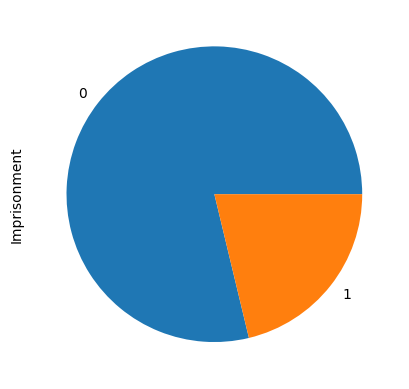

In [ ]:
df1["Imprisonment"].value_counts().plot(kind="pie")

In [ ]:
df["Description"].apply(lambda d: 1 if "suicide" in d.lower()  else 0).value_counts()

0    441
1      3
Name: Description, dtype: int64

In [ ]:
df["Description"].apply(lambda d: 1 if "child" in d.lower()  else 0).value_counts()

0    433
1     11
Name: Description, dtype: int64

In [ ]:
# Your specific input
input_text = "robbery"

# Combine with additional information if needed
# For example, if you have additional context in another variable 'context_text'
# you can concatenate them: input_text = input_text + ' ' + context_text

# Use CountVectorizer to convert the input text to numerical format
input_numerical = vectorizer.transform([input_text])

# Make a prediction using the trained model
prediction = model.predict(input_numerical.toarray())

# If you want the predicted class label (assuming one-hot encoding is used)
predicted_label = np.argmax(prediction)

# If you want to convert the predicted label back to the original label
predicted_label_original = label_encoder.inverse_transform([predicted_label])

# Display or use the prediction as needed
print(predicted_label_original)

1/1 [==============================] - 0s 61ms/step
['Description of IPC Section 392\nAccording to section 392 of Indian penal code, Whoever commits robbery shall be punished with rigorous imprisonment for a term which may extend to ten years, and shall also be liable to fine; and, if the robbery be committed on the highway between sunset and sunrise, the imprisonment may be extended to fourteen years.\n\n\nIPC 392 in Simple Words\nIf someone commits robbery, they may face rigorous imprisonment for up to ten years and a fine; if it happens on a highway between sunset and sunrise, the imprisonment may be extended to fourteen years.']
